## Roadmap penelitian

flowSkripsi.png

# Menghubungkan ke Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Get Data

Sumber data: https://indexes.nikkei.co.jp/en/nkave/archives/data?list=daily


mendownload data harga saham Nikkei225 dengan interval harian dari tahun 1968 sampai 2023

In [ ]:
!wget https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/nikkei225/Nikkei225_daily.csv


--2024-06-25 15:34:33--  https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/nikkei225/Nikkei225_daily.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 886390 (866K) [text/plain]
Saving to: ‘Nikkei225_daily.csv’

Nikkei225_daily.csv 100%[===================>] 865.62K  --.-KB/s    in 0.04s   

2024-06-25 15:34:33 (21.5 MB/s) - ‘Nikkei225_daily.csv’ saved [886390/886390]



## Import data time series dengan pandas

In [ ]:
# import dengan pandas
import pandas as pd

# konversi format nilai
def convert_value(value):
    # jika value bukan '-' merubah format desimal (contoh : 30,056 -> 30056)
    if value != '-':
        return float(value.replace(',', ''))
    else:
        return None

# membaca data saham Nikkei225
nikkei225_df = pd.read_csv("/content/Nikkei225_daily.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"],
                           converters = {'Open': convert_value,
                                         'High': convert_value,
                                         'Low': convert_value,
                                         'Close': convert_value})
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

nikkei225_df.tail()

Open      High       Low     Close
Date                                              
2024-02-22  38508.07  39156.97  38508.07  39098.68
2024-02-26  39320.64  39388.08  39181.03  39233.71
2024-02-27  39260.78  39426.29  39113.03  39239.52
2024-02-28  39189.22  39283.95  39075.47  39208.03
2024-02-29  38935.53  39250.12  38876.81  39166.19

In [ ]:
nikkei225_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20078 entries, 1950-01-04 to 2024-02-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    9685 non-null   float64
 1   High    9685 non-null   float64
 2   Low     9685 non-null   float64
 3   Close   20078 non-null  float64
dtypes: float64(4)
memory usage: 784.3 KB


data saham hanya digunakan saat harga close

In [ ]:
nikkei225_close_df = pd.DataFrame(nikkei225_df["Close"]).rename(columns={"Close": "Closing Price (Yen)"})
nikkei225_close_df.tail()


Closing Price (Yen)
Date                           
2024-02-22             39098.68
2024-02-26             39233.71
2024-02-27             39239.52
2024-02-28             39208.03
2024-02-29             39166.19

Informasi jumlah data

In [ ]:
len(nikkei225_df)

20078

menampilkan missing data

In [ ]:
# List the rows where the 'Close' column is nullC
rows_with_null_close = nikkei225_close_df[nikkei225_close_df['Closing Price (Yen)'].isnull()]
print(rows_with_null_close)

Empty DataFrame
Columns: [Closing Price (Yen)]
Index: []


In [ ]:

nikkei225_close_df.isnull().sum()

Closing Price (Yen)    0
dtype: int64

# Bagian membuat multivariate time series dataset.

selain menggunakan data nikkei225, perdiksi harga saham akan dibantu dengan data discount rate

multivariate time series akan menambahkan fitur lebih banyak dari univariate time series yang hanya satu fitur

import file csv





In [ ]:
!wget https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/discountRate/discountRate.csv

--2024-06-25 15:34:35--  https://raw.githubusercontent.com/ImamSyabana/TugasAkhir_Nikkei225/main/datasets/discountRate/discountRate.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11737 (11K) [text/plain]
Saving to: ‘discountRate.csv’

discountRate.csv    100%[===================>]  11.46K  --.-KB/s    in 0s      

2024-06-25 15:34:35 (75.3 MB/s) - ‘discountRate.csv’ saved [11737/11737]



# Import data time seres tambahan: discount rate

import data discount rate

In [ ]:
# import dengan pandas
import pandas as pd
# membaca data discount rate
discRate_df = pd.read_csv("/content/discountRate.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

discRate_df[-3:]

<ipython-input-10-17f456e02e56>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  discRate_df = pd.read_csv("/content/discountRate.csv",


discountRate
Date                    
2023-12-01           0.3
2024-01-01           0.3
2024-02-01           0.3

In [ ]:
len(discRate_df)

890

menampilkan missing data

In [ ]:
print(discRate_df.isnull().sum())

discountRate    0
dtype: int64


import data discount rate dengan modul csv.reader

In [ ]:
# import dan format historikal data dengan python

import csv
from datetime import datetime

timesteps_discountRate = []
discountRate_value = []

with open("/content/discountRate.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[1] == "null":
      continue
    timesteps_discountRate.append(datetime.strptime(line[0], "%Y/%m")) #membaca tanggal sbg DATE
    discountRate_value.append(float(line[1])) #membaca nilai discount rate


In [ ]:
timesteps_discountRate[:3], discountRate_value[:3]

([datetime.datetime(1950, 1, 1, 0, 0),
  datetime.datetime(1950, 2, 1, 0, 0),
  datetime.datetime(1950, 3, 1, 0, 0)],
 [5.11, 5.11, 5.11])

In [ ]:
len(discountRate_value)

890

In [ ]:
type(timesteps_discountRate), type(discountRate_value)

(list, list)

In [ ]:
len(discountRate_value)

890

# Mengumpulkan data menjadi satu dataframe

In [ ]:
# membuat dataframe untuk mengumpulkan semua data multivariate

# copy dataframe nikkei yang masih hanya berisi harga saham
nikkei225_close_multivariate_df = nikkei225_close_df.copy()

# menambahkan kolom money stock dan dsicount rate

nikkei225_close_multivariate_df["discount_rate"] = None
nikkei225_close_multivariate_df

Closing Price (Yen) discount_rate
Date                                         
1950-01-04               108.56          None
1950-01-05               105.54          None
1950-01-06               102.64          None
1950-01-07               102.95          None
1950-01-09               102.78          None
...                         ...           ...
2024-02-22             39098.68          None
2024-02-26             39233.71          None
2024-02-27             39239.52          None
2024-02-28             39208.03          None
2024-02-29             39166.19          None

[20078 rows x 2 columns]

menggabungkan data discount rate dan money supply ke dataframe Nikkei225 closing price

In [ ]:
for x in range(len(timesteps_discountRate)):
  for y in range(len(nikkei225_close_multivariate_df.index)):
    IntervalBulan_timesteps_atrYEAR = timesteps_discountRate[x].year
    IntervalBulan_timesteps_atrMONTH = timesteps_discountRate[x].month
    IntervalBulan_timesteps_atrDAY = timesteps_discountRate[x].day

    IntervalHarian_timesteps_atrYEAR = nikkei225_close_multivariate_df.index[y].year
    IntervalHarian_timesteps_atrMONTH = nikkei225_close_multivariate_df.index[y].month
    IntervalHarian_timesteps_atrDAY = nikkei225_close_multivariate_df.index[y].day

    if IntervalBulan_timesteps_atrYEAR == IntervalHarian_timesteps_atrYEAR and IntervalBulan_timesteps_atrMONTH == IntervalHarian_timesteps_atrMONTH:
      string_tanggal = "{tahun}-{bulan}-{tanggal}".format(tahun = IntervalHarian_timesteps_atrYEAR, bulan = IntervalHarian_timesteps_atrMONTH, tanggal = IntervalHarian_timesteps_atrDAY)
      date_to_index = pd.to_datetime(string_tanggal)
      nikkei225_close_multivariate_df.loc[date_to_index, "discount_rate"] = discountRate_value[x]

In [ ]:
discRate_df[80:90]

discountRate
Date                    
1956-09-01          7.30
1956-10-01          7.30
1956-11-01          7.30
1956-12-01          7.30
1957-01-01          7.30
1957-02-01          7.30
1957-03-01          7.67
1957-04-01          7.67
1957-05-01          8.40
1957-06-01          8.40

In [ ]:
nikkei225_close_multivariate_df[11520:11600]

Closing Price (Yen) discount_rate
Date                                         
1989-04-26             33434.93           2.5
1989-04-27             33500.83           2.5
1989-04-28             33713.35           2.5
1989-05-01             33793.17          3.25
1989-05-02             33954.99          3.25
...                         ...           ...
1989-08-14             34671.62          3.25
1989-08-15             34810.69          3.25
1989-08-16             35084.15          3.25
1989-08-17             35090.11          3.25
1989-08-18             35063.14          3.25

[80 rows x 2 columns]

In [ ]:
type(nikkei225_close_multivariate_df.index.tolist())

list

# Visualisasi data : Membuat fungsi untuk visualisasi (plotting)


In [ ]:
# membuat fungsi untuk menggambar data time series

import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format= ".", start = 0, end =None, label = None, color = None):
  """
  Memvisualisasikan timesteps (serangkaian keterangan waktu dengan interval tertentu) terhadap nilainya pada timesteps yang bersesuaian
  Parameters
  -------------
  timesteps : kumpulan timestep
  values : kumpulan nilai (saham dan discount Rate)
  format : style grafik, default "."
  start : timesteps rentang awal yang divisualisasi
  end : timesteps rentang akhir yang divisualisasi
  label : untuk memberi keterangan grafik
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label, color = color)
  plt.xlabel("Tanggal")
  plt.ylabel("Saham Nikkei225 Penutupan (harian)")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)


Visualisasi data saham nikkei225

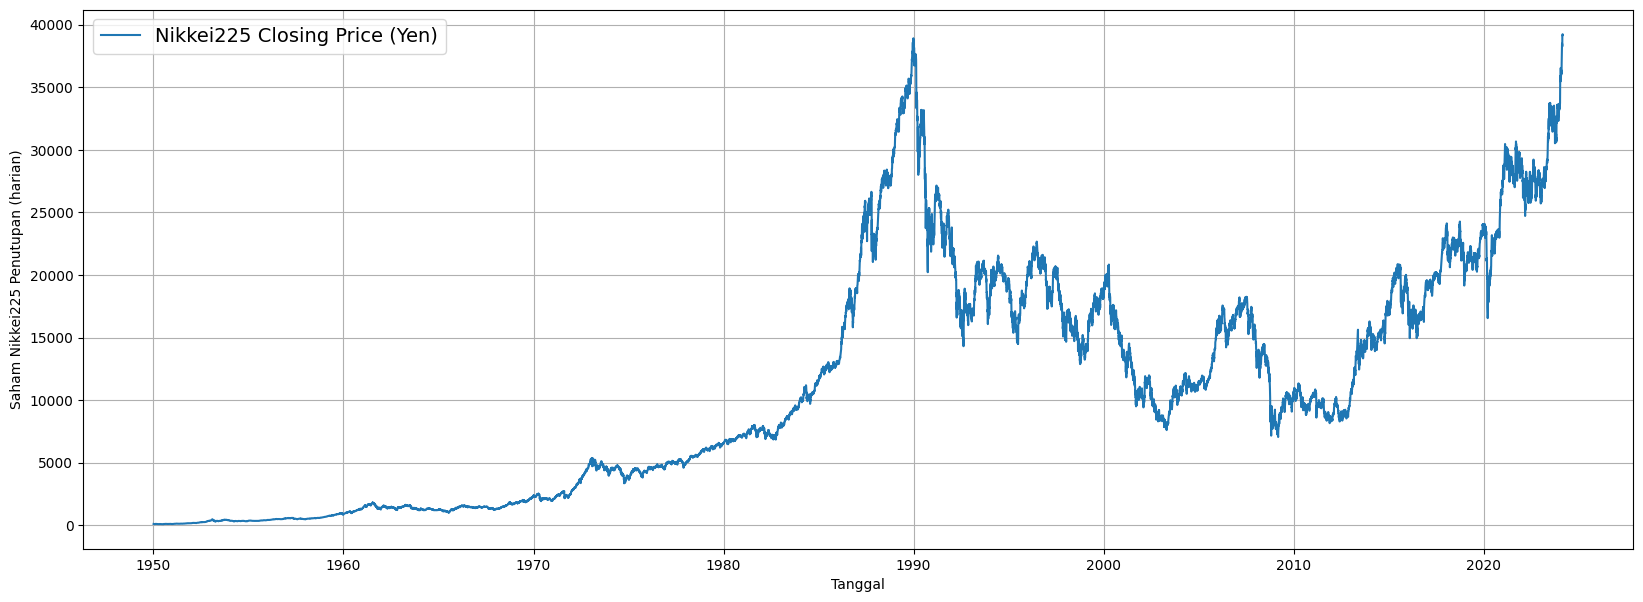

In [ ]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)")


Visualisasi data discount rate

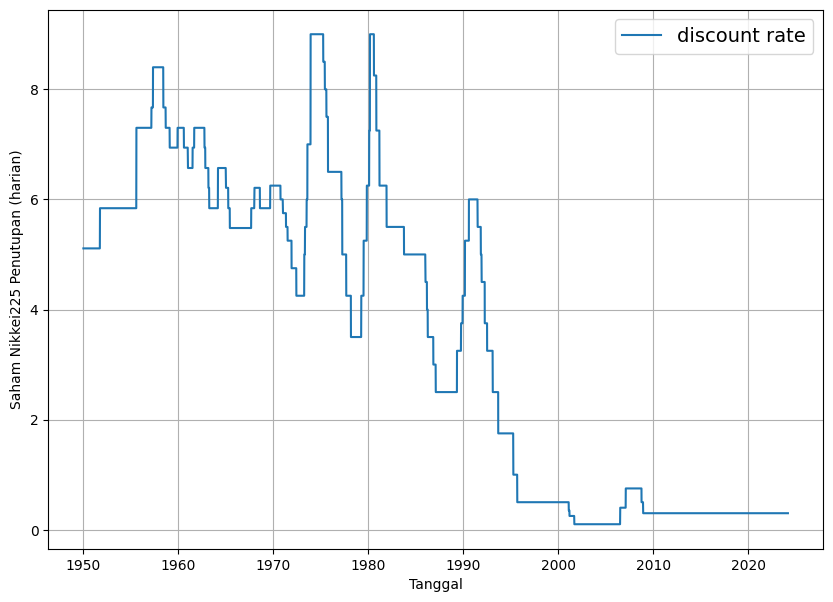

In [ ]:

plt.figure(figsize = (10,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate")


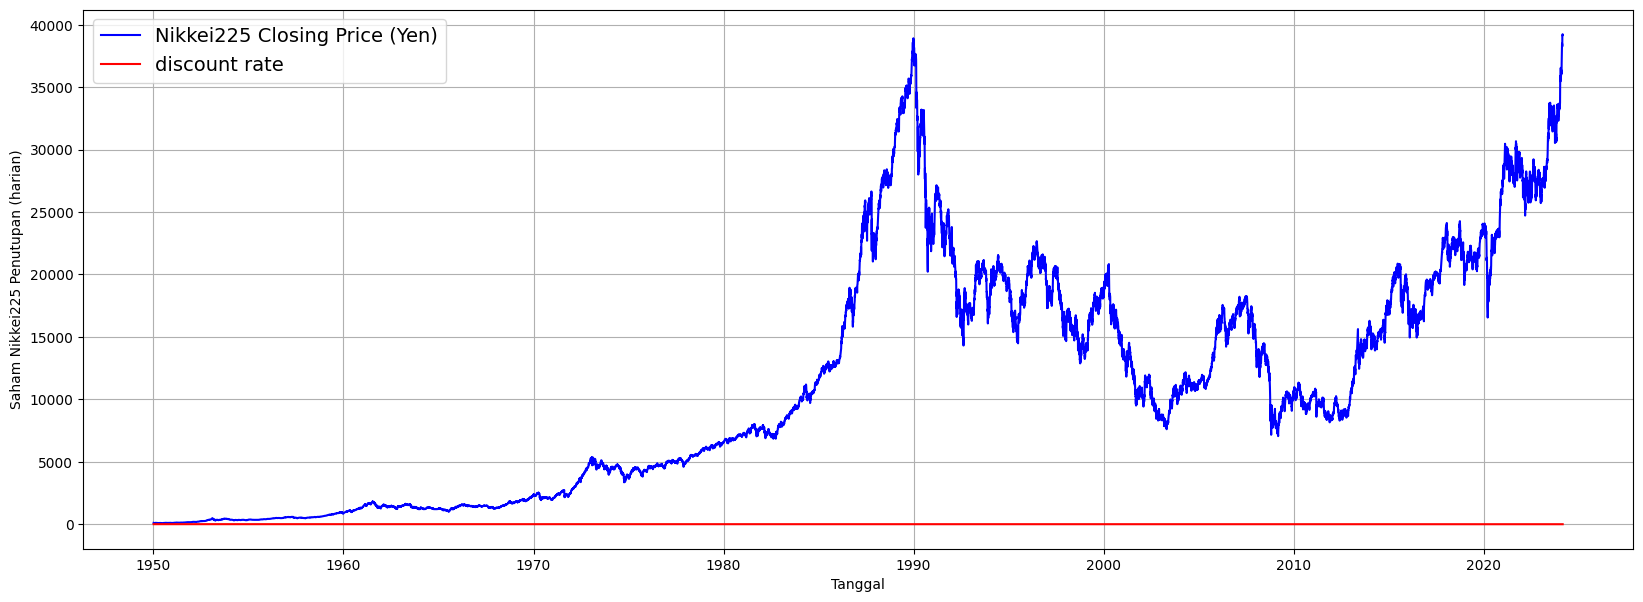

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate", color = 'r')


# Melakukan normalisasi dataset

In [ ]:

from sklearn.preprocessing import MinMaxScaler

# meinputkan data ke MinMaxScaler
scaler_multivariate = MinMaxScaler(feature_range=(0, 1))
scaler_multivariate.fit(nikkei225_close_multivariate_df)

MinMaxScaler()

In [ ]:
scaler_univariate = MinMaxScaler(feature_range = (0,1))

# mengimplementasikan scaler khusus univariate ke data saham nikkei225 saja
scaler_univariate.fit(nikkei225_close_df["Closing Price (Yen)"].values.reshape(-1, 1))

MinMaxScaler()

In [ ]:
# Melakukan normalization
scaler_multivariate.transform(nikkei225_close_multivariate_df)

array([[5.95337367e-04, 5.62921348e-01],
       [5.18206571e-04, 5.62921348e-01],
       [4.44140575e-04, 5.62921348e-01],
       ...,
       [1.00000000e+00, 2.24719101e-02],
       [9.99195745e-01, 2.24719101e-02],
       [9.98127152e-01, 2.24719101e-02]])

membuat dataframe dengan nilai normalized

In [ ]:
normalized_data  = scaler_multivariate.transform(nikkei225_close_multivariate_df)
normalized_data


array([[5.95337367e-04, 5.62921348e-01],
       [5.18206571e-04, 5.62921348e-01],
       [4.44140575e-04, 5.62921348e-01],
       ...,
       [1.00000000e+00, 2.24719101e-02],
       [9.99195745e-01, 2.24719101e-02],
       [9.98127152e-01, 2.24719101e-02]])

In [ ]:
print ("dataset_normalized.shape" , normalized_data.shape)

dataset_normalized.shape (20078, 2)


In [ ]:
normalized_data[:,0].reshape(-1, 1)

array([[5.95337367e-04],
       [5.18206571e-04],
       [4.44140575e-04],
       ...,
       [1.00000000e+00],
       [9.99195745e-01],
       [9.98127152e-01]])

In [ ]:
type(normalized_data[:,0].reshape(-1, 1))

numpy.ndarray

In [ ]:
# konversi array menjadi bentuk dataframe
scaled_nikkei225_close_multivariate_df  = pd.DataFrame(normalized_data, columns=nikkei225_close_multivariate_df.columns)


In [ ]:
scaled_nikkei225_close_multivariate_df

Closing Price (Yen)  discount_rate
0                 0.000595       0.562921
1                 0.000518       0.562921
2                 0.000444       0.562921
3                 0.000452       0.562921
4                 0.000448       0.562921
...                    ...            ...
20073             0.996403       0.022472
20074             0.999852       0.022472
20075             1.000000       0.022472
20076             0.999196       0.022472
20077             0.998127       0.022472

[20078 rows x 2 columns]

LAtihan denormalisasi

In [ ]:

# # Fit the scaler to your data
# scaler = MinMaxScaler()
# scaler.fit(nikkei225_close_multivariate_df[['discount_rate']])

# # Perform inverse normalization
# inverse_normalized_data = scaler.inverse_transform(scaled_nikkei225_close_multivariate_df[:, 2].reshape(-1, 1))

# print(inverse_normalized_data)

In [ ]:
len(scaler_multivariate.transform(nikkei225_close_multivariate_df ))

20078

In [ ]:
scaler_multivariate.transform(nikkei225_close_multivariate_df )[:,0].reshape(-1, 1)

array([[5.95337367e-04],
       [5.18206571e-04],
       [4.44140575e-04],
       ...,
       [1.00000000e+00],
       [9.99195745e-01],
       [9.98127152e-01]])

Visualisasi data yang di normalisasi

In [ ]:
scaled_nikkei225_close_multivariate_df["discount_rate"]

0        0.562921
1        0.562921
2        0.562921
3        0.562921
4        0.562921
           ...   
20073    0.022472
20074    0.022472
20075    0.022472
20076    0.022472
20077    0.022472
Name: discount_rate, Length: 20078, dtype: float64

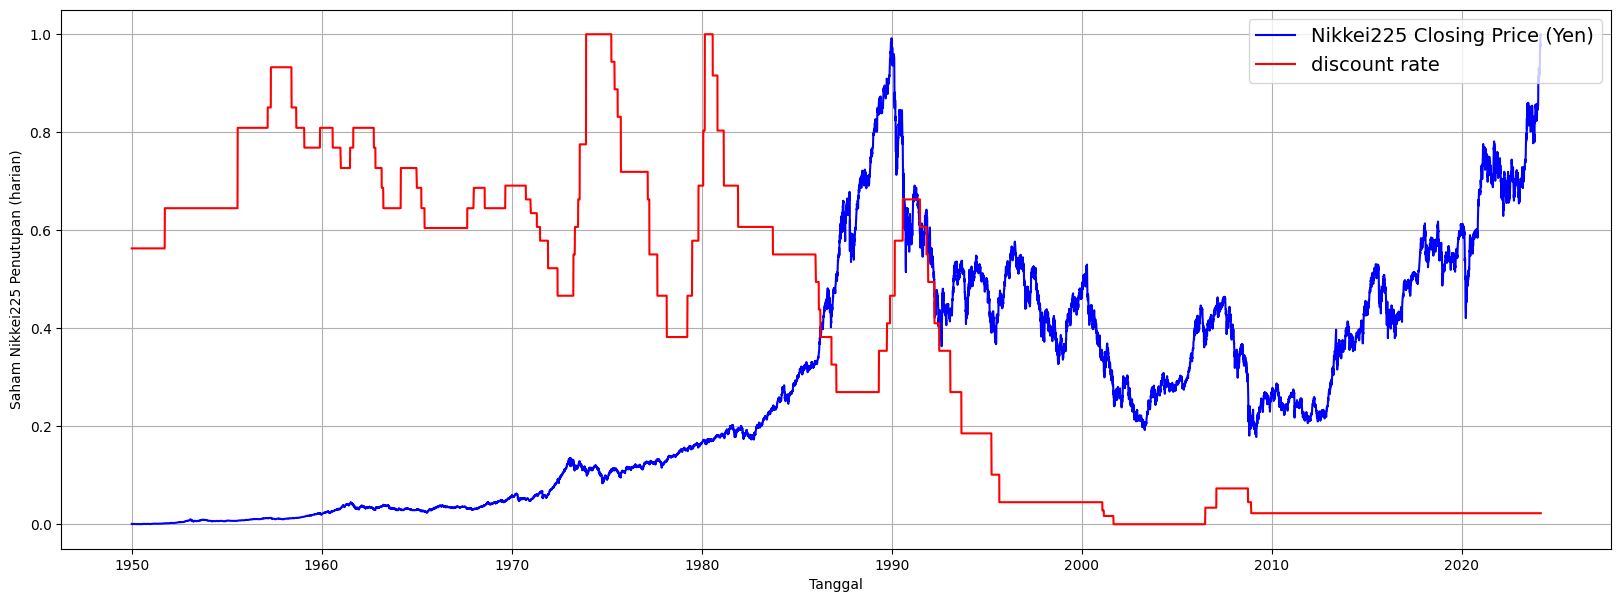

In [ ]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["Closing Price (Yen)"], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["discount_rate"], format = "-", label = "discount rate", color = 'r')


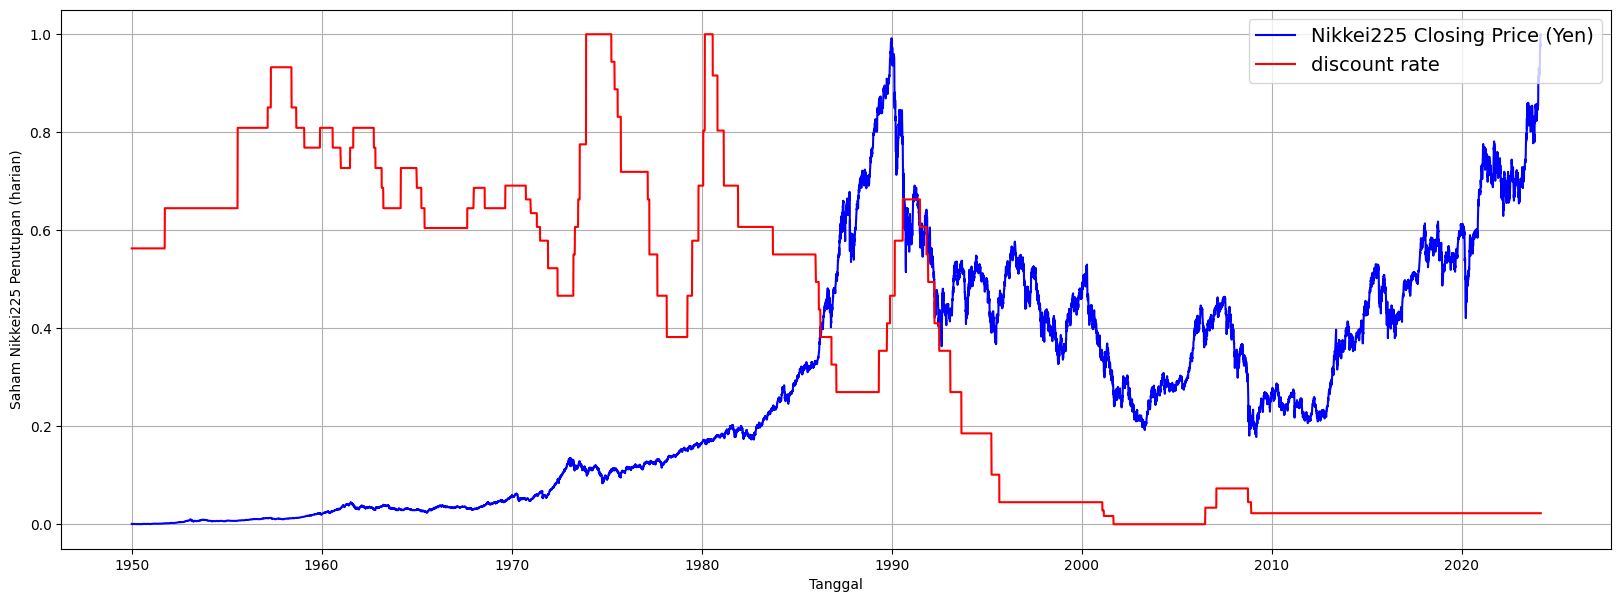

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,1], format = "-", label = "discount rate", color = 'r')



# Membuat dataset multivariate menjadi format sliding window dengan pendekatan multistep multivariate time series forecasting

In [ ]:
# PENGATURAN UNTUK UKURAN INPUT SEQUENCE ATAU LAG ATAU WINDOW

# HORIZON DI ATUR UNTUK MEMILIKI UKUTAN 1 UNTUK MODEL MENGELUARKAN OUTPUT SATU TIMESTEPS SETIAP PREDIKSI
HORIZON = 1
WINDOW_SIZE = 21

# PENGATURAN PRESENTASE DISTRIBUSI DALAM MEMBAGI DATASET KE DALAM TRAIN DAN TEST SET
SPLIT_SIZE = 0.7 # 70% data untuk train test 30% untuk test size

In [ ]:
nikkei225_close_multivariate_df[:2]

Closing Price (Yen) discount_rate
Date                                         
1950-01-04               108.56          5.11
1950-01-05               105.54          5.11

In [ ]:
scaled_nikkei225_close_multivariate_df[:2]

Closing Price (Yen)  discount_rate
0             0.000595       0.562921
1             0.000518       0.562921

membuat window dan horizon multivariate

In [ ]:
# jumlah keseluruhan data sebelum dibentuk menjadi sliding window
len(scaled_nikkei225_close_multivariate_df)

20078

In [ ]:
# fungsi untuk membuat sliding window

import numpy as np

def make_dataset(raw_data, WINDOW_SIZE=21, HORIZON = 1):
    _X = []
    _y = []

    for i in range(len(raw_data) - WINDOW_SIZE - HORIZON + 1):
        _X.append(raw_data[i : i + WINDOW_SIZE])
        _y.append(raw_data[i + WINDOW_SIZE : i + WINDOW_SIZE + HORIZON])
    _X = np.array(_X).reshape(len(_X), WINDOW_SIZE, 1)
    _y = np.array(_y).reshape(len(_y), HORIZON, 1)

    return _X, _y

In [ ]:
from sklearn import preprocessing

columns = list(scaled_nikkei225_close_multivariate_df.columns)

# memanggil fungsi untuk membuat sliding window
Xs = []
for i in range(len(columns)):
    Xs.append((scaled_nikkei225_close_multivariate_df[columns[i]]))
Xs = np.array(Xs)

X_nikkei, y_nikkei = make_dataset(Xs[0], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)
X_discRate, y_discRate = make_dataset(Xs[1], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)


# menggabungkan data multivariate untuk windows dan label
X_concat = np.concatenate([X_nikkei, X_discRate], axis=2)
y_concat = np.concatenate([y_nikkei, y_discRate], axis=2)

In [ ]:

full_windows = X_concat
full_labels = y_concat

In [ ]:
len(full_windows), len(full_labels)

(20057, 20057)

In [ ]:
print(full_windows[0]),
print(full_windows.shape)
print("\n")
print(full_labels[0])
print(full_labels.shape)

[[5.95337367e-04 5.62921348e-01]
 [5.18206571e-04 5.62921348e-01]
 [4.44140575e-04 5.62921348e-01]
 [4.52057975e-04 5.62921348e-01]
 [4.47716175e-04 5.62921348e-01]
 [4.11449377e-04 5.62921348e-01]
 [3.60369380e-04 5.62921348e-01]
 [3.12354183e-04 5.62921348e-01]
 [2.50036586e-04 5.62921348e-01]
 [2.97285583e-04 5.62921348e-01]
 [2.79662984e-04 5.62921348e-01]
 [2.55910786e-04 5.62921348e-01]
 [3.03925983e-04 5.62921348e-01]
 [3.48620981e-04 5.62921348e-01]
 [3.26911982e-04 5.62921348e-01]
 [3.32019981e-04 5.62921348e-01]
 [3.02648983e-04 5.62921348e-01]
 [3.03159783e-04 5.62921348e-01]
 [2.87580384e-04 5.62921348e-01]
 [2.60507985e-04 5.62921348e-01]
 [2.45183986e-04 5.62921348e-01]]
(20057, 21, 2)


[[2.44417786e-04 5.62921348e-01]]
(20057, 1, 2)


In [ ]:
print(full_windows[1]),
print(full_windows.shape)
print("\n")
print(full_labels[1])
print(full_labels.shape)

[[5.18206571e-04 5.62921348e-01]
 [4.44140575e-04 5.62921348e-01]
 [4.52057975e-04 5.62921348e-01]
 [4.47716175e-04 5.62921348e-01]
 [4.11449377e-04 5.62921348e-01]
 [3.60369380e-04 5.62921348e-01]
 [3.12354183e-04 5.62921348e-01]
 [2.50036586e-04 5.62921348e-01]
 [2.97285583e-04 5.62921348e-01]
 [2.79662984e-04 5.62921348e-01]
 [2.55910786e-04 5.62921348e-01]
 [3.03925983e-04 5.62921348e-01]
 [3.48620981e-04 5.62921348e-01]
 [3.26911982e-04 5.62921348e-01]
 [3.32019981e-04 5.62921348e-01]
 [3.02648983e-04 5.62921348e-01]
 [3.03159783e-04 5.62921348e-01]
 [2.87580384e-04 5.62921348e-01]
 [2.60507985e-04 5.62921348e-01]
 [2.45183986e-04 5.62921348e-01]
 [2.44417786e-04 5.62921348e-01]]
(20057, 21, 2)


[[2.01510589e-04 5.62921348e-01]]
(20057, 1, 2)


In [ ]:
print(full_labels[:3])
(full_labels.shape)

[[[2.44417786e-04 5.62921348e-01]]

 [[2.01510589e-04 5.62921348e-01]]

 [[1.86186590e-04 5.62921348e-01]]]


(20057, 1, 2)

format training atau test data pada **window/fitur** adalah **(jumlah sample, ukuran window, jumlah variable)**

In [ ]:
full_windows.shape

(20057, 21, 2)

format training atau test data pada **label** adalah **(jumlah sample, jumlah variabel)** [Hanya memiliki dua dimensi shape jika ingin dengan benar menghasilkan output yang sesuai]

In [ ]:
full_labels.shape

(20057, 1, 2)

In [ ]:
full_labels = np.squeeze(full_labels)
full_labels.shape

(20057, 2)

In [ ]:
full_labels[:3]

array([[2.44417786e-04, 5.62921348e-01],
       [2.01510589e-04, 5.62921348e-01],
       [1.86186590e-04, 5.62921348e-01]])

Membagi data menjadi training dataset dan test data set. Pembagian data menjadi train dan test dengan train series split dimana Test dataset akan menggunakan data yang pseusdo future (data yang seakan2 berperan dari masa depan).

In [ ]:
len(full_windows[: int(SPLIT_SIZE * len(full_windows))])

14039

In [ ]:
# Membagi full sliding windows menjadi windows untuk train dan test begitu pula untuk label
train_windows = full_windows[:len(full_windows[: int(SPLIT_SIZE * len(full_windows))])]
test_windows = full_windows[len(full_windows[: int(SPLIT_SIZE * len(full_windows))]):]

train_labels = full_labels[:len(full_windows[: int(SPLIT_SIZE * len(full_labels))])]
test_labels = full_labels[len(full_windows[: int(SPLIT_SIZE * len(full_labels))]):]

In [ ]:
print("jumlah sliding windows keseluruhan adalah :{n_full_windows}".format(n_full_windows = len(full_windows)))

print("Sliding windows untuk train berjumlah : {n_train_windows}".format(n_train_windows = len(train_windows)))
print("Sliding windows untuk test berjumlah : {n_test_windows}".format(n_test_windows = len(test_windows)))


jumlah sliding windows keseluruhan adalah :20057
Sliding windows untuk train berjumlah : 14039
Sliding windows untuk test berjumlah : 6018


In [ ]:
print("jumlah label keseluruhan adalah :{n_full_labels}".format(n_full_labels = len(full_labels)))

print("label untuk train berjumlah : {n_train_labels}".format(n_train_labels = len(train_labels)))
print("label untuk test berjumlah : {n_test_labels}".format(n_test_labels = len(test_labels)))


jumlah label keseluruhan adalah :20057
label untuk train berjumlah : 14039
label untuk test berjumlah : 6018


In [ ]:
"windows", test_windows[:2], "Labels",test_labels[:2]

('windows',
 array([[[0.46454525, 0.04494382],
         [0.46216773, 0.04494382],
         [0.46668243, 0.04494382],
         [0.46857239, 0.04494382],
         [0.46388427, 0.04494382],
         [0.47114478, 0.04494382],
         [0.46411975, 0.04494382],
         [0.45065557, 0.04494382],
         [0.44565229, 0.04494382],
         [0.44455151, 0.04494382],
         [0.44382056, 0.04494382],
         [0.44681359, 0.04494382],
         [0.45422045, 0.04494382],
         [0.45401459, 0.04494382],
         [0.45309107, 0.04494382],
         [0.4567747 , 0.04494382],
         [0.4495073 , 0.04494382],
         [0.44115086, 0.04494382],
         [0.43415418, 0.04494382],
         [0.43686678, 0.04494382],
         [0.43716407, 0.04494382]],
 
        [[0.46216773, 0.04494382],
         [0.46668243, 0.04494382],
         [0.46857239, 0.04494382],
         [0.46388427, 0.04494382],
         [0.47114478, 0.04494382],
         [0.46411975, 0.04494382],
         [0.45065557, 0.04494382],
     

# LANJUT MEMBUAT FUNGSI EVALUASI DAN BIKIN MODEL

# Membuat fungsi untuk melakukan evaluasi regression problem

fungsi digunakan untuk menguji prediksi model dengan nilai sebenarnya dan menghasilkan nilai evaluasi masing-masing metrik

In [ ]:
import tensorflow as tf


sehingga yang dilakukan dengan tf.reduce_mean adalah melakukan agregasi ke banyak nilai mae akibat dari horizon yang ukurannya lebih dari satu menjadi satu single value seperti yang dilakukan tensorflow

tf.reduce_mean mampu menghasilkan satu nilai mae yang sudah direratakan dan hasilnya sama dengan yang dihitung dari model saat evaluasi metrik MAE-nya dengan .evaluate, menghasilkan nilai MAE yang sama-sama 892.1709

In [ ]:
def evaluate_preds(y_true, y_pred):
  #Pastikan data yang diproses dengan library tensorflow bertipe float32
  y_true = tf.cast(y_true, dtype = tf.float32) #karena metrik evaluasi dari library tensorflow bisa
  y_pred = tf.cast(y_pred, dtype = tf.float32) #memunculkan error jika tipe bukan float32

  y_true = tf.squeeze(y_true)
  y_pred = tf.squeeze(y_pred)

  # menghitung metrik evaluasi regression problem
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  rmse = tf.sqrt(mse)

  # kalkulasi nilai R-square
  from sklearn.metrics import r2_score
  Rsquare = r2_score(y_true, y_pred)


  return {"mae" : mae.numpy(), #ditampilkan dalam bentuk numpy bukan tensor
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          "R-square" : Rsquare}

# membuat modelling checkpoint

karena model akan belajar terus menerus pada masing-masing epoch, diantara epoch-epoch tersebut dapat menghasilkan pembelajaran terbaik tidak hanya di eopch terakhir saja. Maka dari itu, epoch yang memiliki hasil terbaik akan di simpan selama training.  

Dengan menyimpan epoch yang terbaik, model yang akan dibuat adalah model yang terbaik dan dapat dibandingkan dengan model terbaik lainnya secara adil.

Untuk membuat modelling checkpoint callback digunakan: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [ ]:
# membuat modelling checkpoint

import os # membuat folder untuk menyimpan best model

# mmebuat function untuk implementasi ModelCheckpoint callback
def create_model_checkpoint(model_name, save_path = "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                                                    monitor = "val_loss",
                                                                    verbose = 1,
                                                                    save_best_only = True)

In [ ]:
train_windows.shape

(14039, 21, 2)

In [ ]:
train_windows[0:2]

array([[[5.95337367e-04, 5.62921348e-01],
        [5.18206571e-04, 5.62921348e-01],
        [4.44140575e-04, 5.62921348e-01],
        [4.52057975e-04, 5.62921348e-01],
        [4.47716175e-04, 5.62921348e-01],
        [4.11449377e-04, 5.62921348e-01],
        [3.60369380e-04, 5.62921348e-01],
        [3.12354183e-04, 5.62921348e-01],
        [2.50036586e-04, 5.62921348e-01],
        [2.97285583e-04, 5.62921348e-01],
        [2.79662984e-04, 5.62921348e-01],
        [2.55910786e-04, 5.62921348e-01],
        [3.03925983e-04, 5.62921348e-01],
        [3.48620981e-04, 5.62921348e-01],
        [3.26911982e-04, 5.62921348e-01],
        [3.32019981e-04, 5.62921348e-01],
        [3.02648983e-04, 5.62921348e-01],
        [3.03159783e-04, 5.62921348e-01],
        [2.87580384e-04, 5.62921348e-01],
        [2.60507985e-04, 5.62921348e-01],
        [2.45183986e-04, 5.62921348e-01]],

       [[5.18206571e-04, 5.62921348e-01],
        [4.44140575e-04, 5.62921348e-01],
        [4.52057975e-04, 5.62921

In [ ]:
train_labels[0:2]

array([[2.44417786e-04, 5.62921348e-01],
       [2.01510589e-04, 5.62921348e-01]])

In [ ]:
train_labels.shape

(14039, 2)

In [ ]:
test_windows.shape

(6018, 21, 2)

In [ ]:
test_labels.shape

(6018, 2)

In [ ]:
# keterangan jumlah feature
test_labels.shape[1]

2

Mulai membuat model Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
from keras import Model
from keras.layers import Input, Dense, Bidirectional, LSTM, RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from numpy import array, hstack
import numpy as np

# Model 1: Conv1D

In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch


<ipython-input-75-b420bea64af7>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
# import library untuk mmebuat model

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
train_windows.shape

(14039, 21, 2)

In [ ]:
train_labels.shape

(14039, 2)

In [ ]:
test_windows.shape

(6018, 21, 2)

In [ ]:
test_labels.shape

(6018, 2)

In [ ]:
test_labels.shape[1]

2

## Tuner Builder

In [ ]:
#membuat model Conv1D
def model_Conv1D_multi_builder(hp):
  tf.random.set_seed(42)

  model_1 = tf.keras.models.Sequential([


      #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      tf.keras.layers.Conv1D(filters = hp.Int('conv1D_n_filters', min_value=32, max_value=256, step=32),
                             kernel_size = hp.Int('conv1D_kernel_size', min_value=5, max_value=10, step=1),
                             strides = 1,
                             padding ="causal",
                             activation = "relu",
                             input_shape=[train_windows.shape[1], train_windows.shape[2]]),

      tf.keras.layers.GlobalMaxPooling1D(),  # Add GlobalMaxPooling1D layer
      tf.keras.layers.Dense(test_labels.shape[1])
      #filters adalah jumlah hidden unit dalam layers tersebut
      # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
      # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
  ], name = "model_1_conv1D_multivariate")

  #compile model 1
  model_1.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_1


In [ ]:
import keras_tuner as kt

tuner_Conv1D_multi = kt.Hyperband(model_Conv1D_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs',
                     project_name='Conv1D_multivariate')

## Proses tuning


In [ ]:
tuner_Conv1D_multi.search(train_windows,
                          train_labels,
                          epochs=10,
                          validation_data=(test_windows, test_labels),
                          batch_size = 128)

Trial 30 Complete [00h 00m 08s]
val_loss: 0.0077762603759765625

Best val_loss So Far: 0.0077762603759765625
Total elapsed time: 00h 02m 23s


## Hasil parameter tuning terbaik

In [ ]:
tuner_Conv1D_multi.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_Conv1D_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
print('Best tune model Conv1D multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model Conv1D multivariate:
conv1D_n_filters: 64
conv1D_kernel_size: 8
learning_rate: 0.001


## Hasil semua parameter tuning

In [ ]:
tuning =['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all =tuner_Conv1D_multi.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam = pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_best_hyperparameter_models/hp_Conv1D_multi.csv')
df_hyparam


conv1D_n_filters  conv1D_kernel_size  learning_rate
0                 64                   8         0.0010
1                160                   7         0.0100
2                128                   5         0.0010
3                192                   8         0.0100
4                128                   5         0.0010
5                160                   5         0.0010
6                192                   8         0.0100
7                224                   9         0.0001
8                256                   6         0.0010
9                256                  10         0.0001
10                32                   8         0.0100
11                32                   6         0.0100
12               160                   5         0.0010
13               160                   5         0.0010
14               160                   7         0.0100
15               128                   7         0.0010
16               192                   8         0.0100
17               128                   7         0.0010
18               192                   6         0.0001
19               128                  10         0.0100
20               160                   8         0.0100
21               224                   7         0.0100
22               128                   8         0.0001
23               128                  10         0.0100
24               160                   8         0.0001
25                64                  10         0.0001
26               160                   5         0.0001
27                64                   9         0.0001
28                32                  10         0.0001
29                64                   5         0.0001

In [ ]:
tuner_Conv1D_multi.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs/Conv1D_multivariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0029 summary
Hyperparameters:
conv1D_n_filters: 64
conv1D_kernel_size: 8
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.0077762603759765625

Trial 0018 summary
Hyperparameters:
conv1D_n_filters: 160
conv1D_kernel_size: 7
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.008161637932062149

Trial 0025 summary
Hyperparameters:
conv1D_n_filters: 128
conv1D_kernel_size: 5
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0022
Score: 0.008432220667600632

Trial 0013 summary
Hyperparameters:
conv1D_n_filters: 192
conv1D_kernel_size: 8
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tun

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_1 = tuner_Conv1D_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_1 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_1_Conv1D_multivariate.h5")

In [ ]:
# fit
history = model_1.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/50
 99/110 [==========================>...] - ETA: 0s - loss: 0.0820
Epoch 1: val_loss improved from inf to 0.01658, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_1_conv1D_multivariate
110/110 [==============================] - 2s 13ms/step - loss: 0.0750 - val_loss: 0.0166
Epoch 2/50
100/110 [==========================>...] - ETA: 0s - loss: 0.0075
Epoch 2: val_loss improved from 0.01658 to 0.01145, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_1_conv1D_multivariate
110/110 [==============================] - 1s 11ms/step - loss: 0.0074 - val_loss: 0.0114
Epoch 3/50
 99/110 [==========================>...] - ETA: 0s - loss: 0.0071
Epoch 3: val_loss improved from 0.01145 to 0.01061, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_1_conv1D_multivariate
110/110 [=======================

visualisasi model shape

In [ ]:
model_1.summary()

Model: "model_1_conv1D_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 21, 64)            1088      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 1218 (4.76 KB)
Trainable params: 1218 (4.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


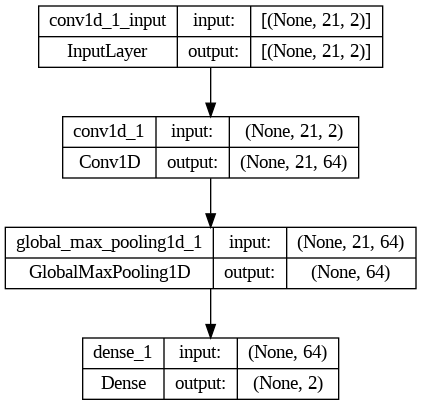

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_plot/model_Conv1D_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

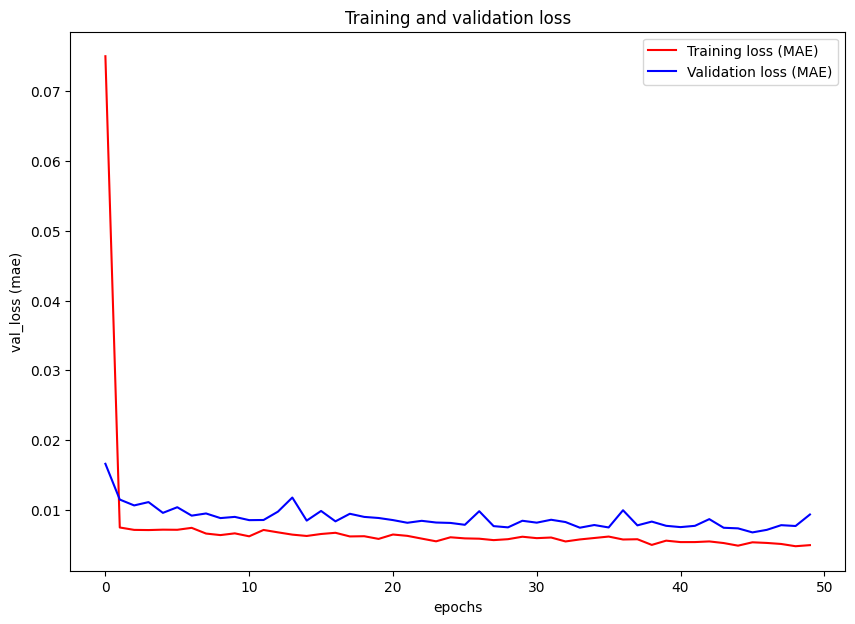

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.title ('Training and validation loss')
plt.legend(loc=0)



# simpan visualisasi loss per epoch menjadi image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_visualization/loss_Conv1D_multi.png')


# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_value_per_epoch/loss_Conv1D_multi.csv', index=False)


In [ ]:
# mengevaluasi model 1 dari epochs terakhir
model_1.evaluate(test_windows, test_labels)

189/189 [==============================] - 0s 2ms/step - loss: 0.0093


0.009306451305747032

In [ ]:
# mengevaluasi dan load model 1 pada best epoch yang loss mae paling kecil sepanjang training

model_1 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_1_conv1D_multivariate")
model_1.evaluate(test_windows, test_labels)


189/189 [==============================] - 0s 2ms/step - loss: 0.0067


0.006737838499248028

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_1_preds = tf.squeeze(model_1.predict(test_windows))
model_1_preds


189/189 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(6018, 2), dtype=float32, numpy=
array([[0.45719483, 0.04564316],
       [0.4550673 , 0.04591633],
       [0.45139614, 0.04542506],
       ...,
       [0.95589745, 0.02756239],
       [0.9592167 , 0.02644119],
       [0.9637386 , 0.02692536]], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_1_preds = scaler_multivariate.inverse_transform(model_1_preds)
denormalized_test_labels = scaler_multivariate.inverse_transform(test_labels)

In [ ]:
# mengukur predicted value time series nikkei225 saja dengan metrik evaluasi regresion problem

model_1_results = evaluate_preds(y_true = denormalized_test_labels[:,0],
                                 y_pred = denormalized_model_1_preds[:,0])

model_1_results

{'mae': 457.7568,
 'mse': 427468.5,
 'rmse': 653.8107,
 'mape': 2.983391,
 'R-square': 0.9902561168944904}

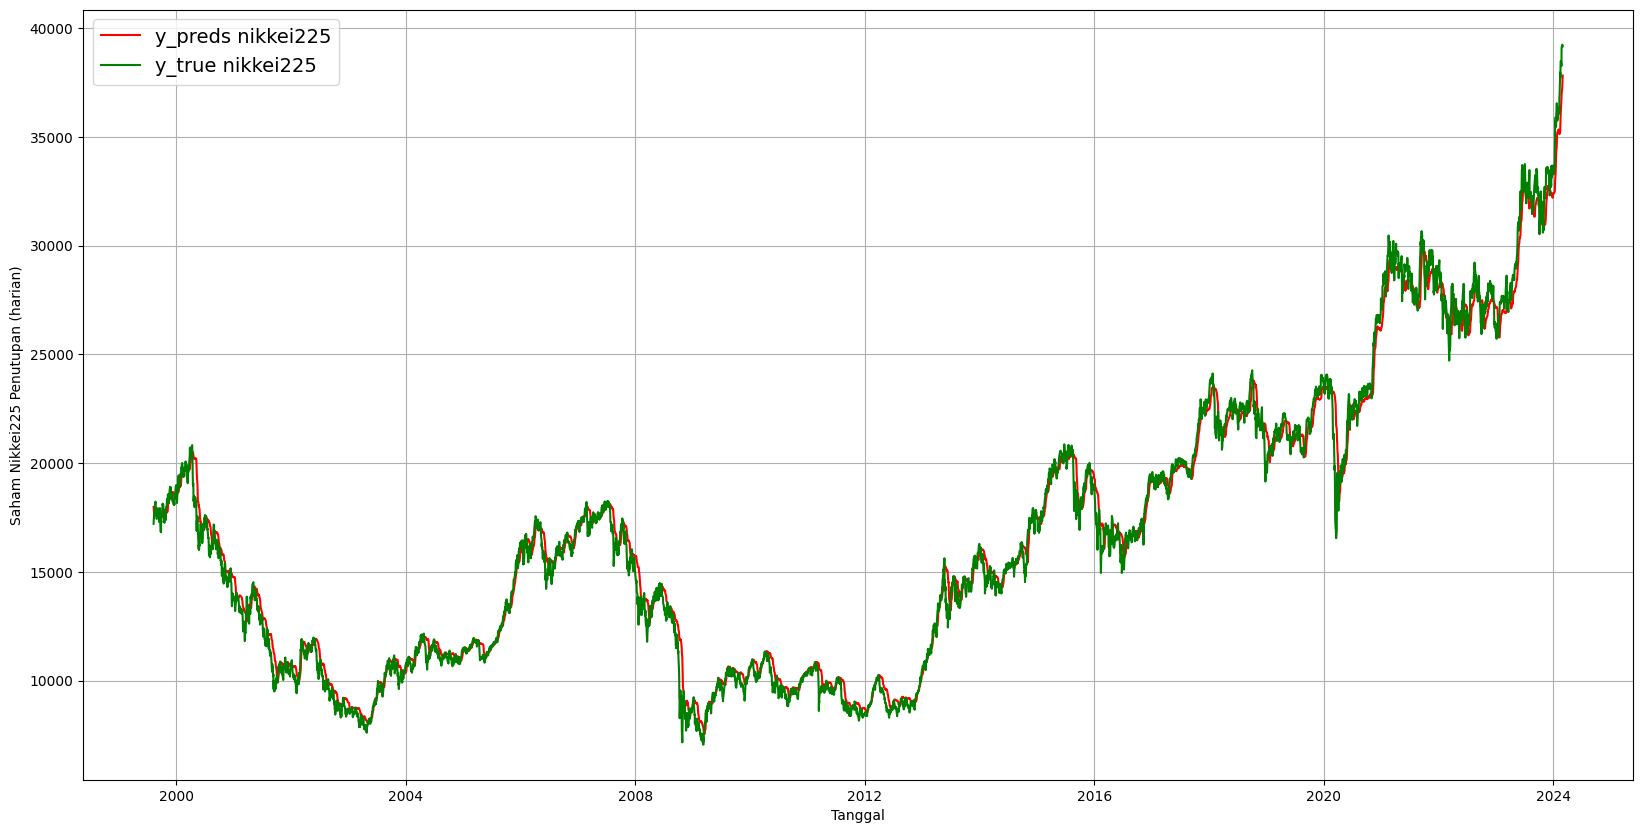

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_1_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_1_plot_prediksi_Conv1D_multi.png')

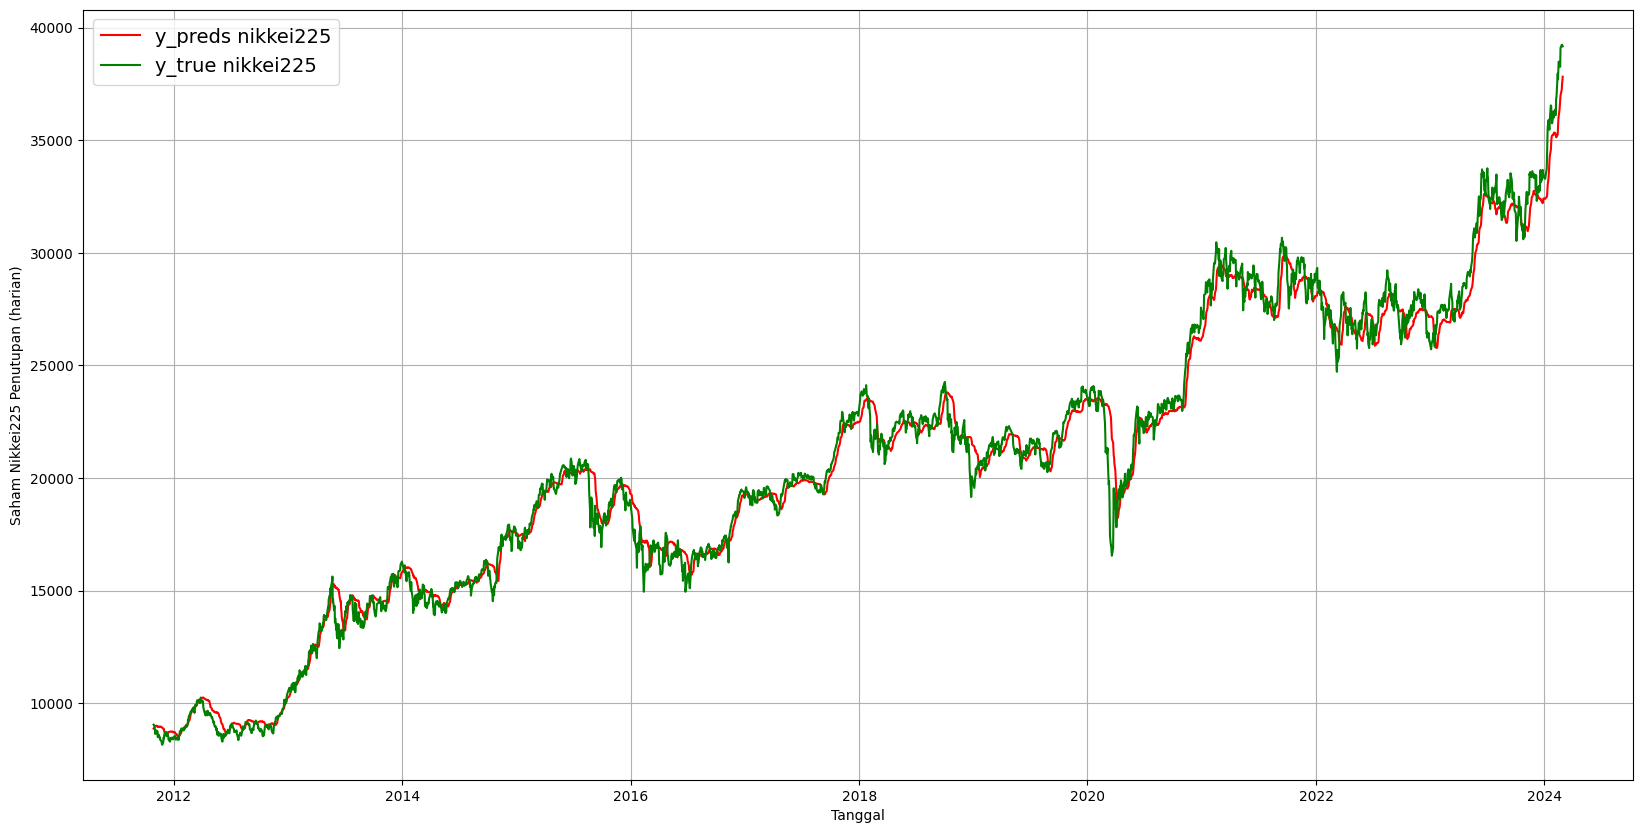

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_1_preds[:,0], format = "-",start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", start = 3000, label = "y_true nikkei225", color = 'g')


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_1_plot_prediksi_Conv1D_multi_zoomin.png')

simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_1, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_1_Conv1D_multivariate.h5")

<ipython-input-101-c6d9999896cd>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_1, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_1_Conv1D_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_1 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_1_Conv1D_multivariate.h5")

# Model 2 : LSTM

In [ ]:
train_windows.shape[2]

2

## Tuner Builder

In [ ]:
# membuat model LSTM dengan hyperparameter tuning

def model_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_2 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units', min_value=32, max_value=256, step=32),
                               input_shape=(train_windows.shape[1], train_windows.shape[2]),
                               return_sequences = False,
                               activation = "relu"),

          #tf.keras.layers.Dropout(0.2),
          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(test_labels.shape[1])
          ], name = "model_2_LSTM_multivariate")



  #compile model 2
  model_2.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_2

In [ ]:
import keras_tuner as kt

tuner_LSTM_multi = kt.Hyperband(model_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs',
                     project_name='LSTM_multivariate')

## Proses tuning


In [ ]:
tuner_LSTM_multi.search(train_windows,
                        train_labels,
                        epochs=10,
                        validation_data=(test_windows, test_labels),
                        batch_size = 128)

Trial 30 Complete [00h 02m 11s]
val_loss: 0.014377630315721035

Best val_loss So Far: 0.006138100288808346
Total elapsed time: 00h 19m 13s


## Hasil parameter tuning terbaik

In [ ]:
tuner_Conv1D_multi.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units', 'learning_rate']
print('Best tune model LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model LSTM multivariate:
lstm_n_units: 96
learning_rate: 0.001


## Hasil semua parameter tuning

In [ ]:
tuning =['lstm_n_units', 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all =tuner_LSTM_multi.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam = pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_best_hyperparameter_models/hp_LSTM_multi.csv')
df_hyparam


lstm_n_units  learning_rate
0             96         0.0010
1            192         0.0100
2            160         0.0010
3             96         0.0010
4            224         0.0010
5            256         0.0100
6            224         0.0010
7            160         0.0010
8            192         0.0010
9             64         0.0100
10            64         0.0100
11           192         0.0010
12           160         0.0010
13            96         0.0100
14            96         0.0010
15           224         0.0100
16           192         0.0100
17           256         0.0001
18           160         0.0100
19            64         0.0010
20            32         0.0100
21           160         0.0001
22            32         0.0010
23           192         0.0001
24            96         0.0001
25           128         0.0100
26           224         0.0001
27            32         0.0001
28           128         0.0001
29            64         0.0001

In [ ]:
tuner_LSTM_multi.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs/LSTM_multivariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0016 summary
Hyperparameters:
lstm_n_units: 96
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0015
Score: 0.006138100288808346

Trial 0025 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0023
Score: 0.00771982641890645

Trial 0017 summary
Hyperparameters:
lstm_n_units: 160
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.009622648358345032

Trial 0015 summary
Hyperparameters:
lstm_n_units: 96
learning_rate: 0.001
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0011
Score: 0.010819717310369015

Trial 0019 summary

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_2 = tuner_LSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_2 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_2_LSTM_multivariate.h5")

In [ ]:

# fit
history = model_2.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/50
109/110 [============================>.] - ETA: 0s - loss: 0.0695
Epoch 1: val_loss improved from inf to 0.02334, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_2_LSTM_multivariate
110/110 [==============================] - 7s 54ms/step - loss: 0.0691 - val_loss: 0.0233
Epoch 2/50
110/110 [==============================] - ETA: 0s - loss: 0.0074
Epoch 2: val_loss improved from 0.02334 to 0.01945, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_2_LSTM_multivariate
110/110 [==============================] - 7s 66ms/step - loss: 0.0074 - val_loss: 0.0194
Epoch 3/50
110/110 [==============================] - ETA: 0s - loss: 0.0073
Epoch 3: val_loss improved from 0.01945 to 0.01092, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_2_LSTM_multivariate
110/110 [=============================

visualisasi model shape

In [ ]:
model_2.summary()

Model: "model_2_LSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 96)                38016     
                                                                 
 dense_1 (Dense)             (None, 2)                 194       
                                                                 
Total params: 38210 (149.26 KB)
Trainable params: 38210 (149.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


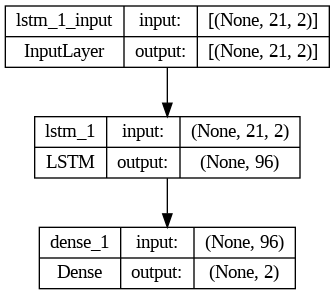

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model_2, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_plot/model_LSTM_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

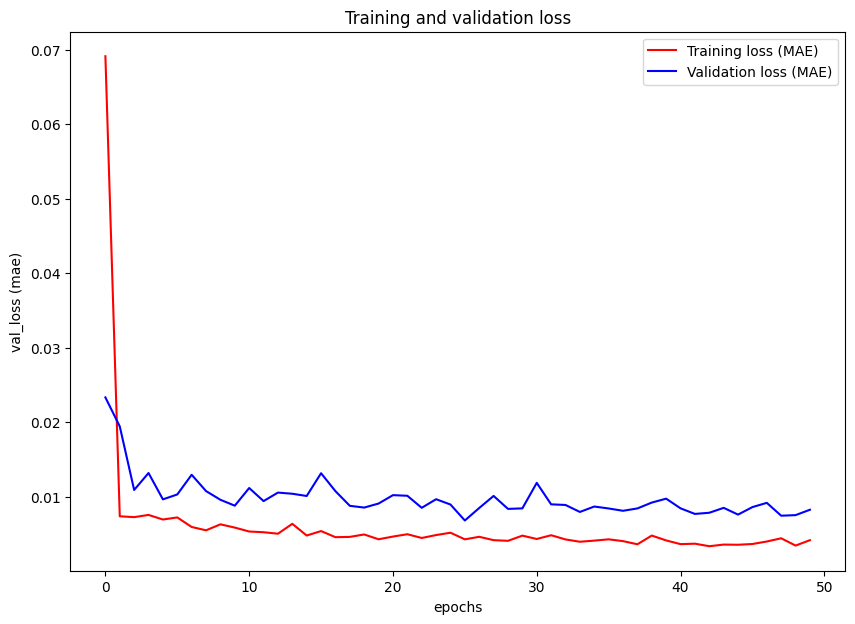

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.title ('Training and validation loss')
plt.legend(loc=0)


# simpan visualisasi loss per epoch menjadi image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_visualization/loss_LSTM_multi.png')


# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_value_per_epoch/loss_LSTM_multi.csv', index=False)


In [ ]:
# mengevaluasi model 2 dari epochs terakhir
model_2.evaluate(test_windows, test_labels)

189/189 [==============================] - 1s 6ms/step - loss: 0.0083


0.008266051299870014

In [ ]:
# mengevaluasi dan load model 2 pada best epoch yang loss mae paling kecil sepanjang training

model_2 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_2_LSTM_multivariate")
model_2.evaluate(test_windows, test_labels)


189/189 [==============================] - 1s 6ms/step - loss: 0.0068


0.006822169758379459

In [ ]:
# membuat predicted value berdasarkan model multivariate model_2 yang sudah di train

model_2_preds = tf.squeeze(model_2.predict(test_windows))
model_2_preds



189/189 [==============================] - 2s 9ms/step


<tf.Tensor: shape=(6018, 2), dtype=float32, numpy=
array([[0.44348633, 0.03775478],
       [0.4421956 , 0.0377287 ],
       [0.44223195, 0.03761911],
       ...,
       [0.9918742 , 0.04818242],
       [0.9966781 , 0.04851747],
       [1.0003351 , 0.04881538]], dtype=float32)>

In [ ]:
model_2_preds[:,1]

<tf.Tensor: shape=(6018,), dtype=float32, numpy=
array([0.03775478, 0.0377287 , 0.03761911, ..., 0.04818242, 0.04851747,
       0.04881538], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_2_preds = scaler_multivariate.inverse_transform(model_2_preds)
denormalized_test_labels = scaler_multivariate.inverse_transform(test_labels)

In [ ]:
# mengukur predicted value time series nikkei225 saja dengan metrik evaluasi regresion problem

model_2_results = evaluate_preds(y_true = denormalized_test_labels[:,0],
                                 y_pred = denormalized_model_2_preds[:,0])

model_2_results

{'mae': 283.6768,
 'mse': 145235.42,
 'rmse': 381.09766,
 'mape': 1.8107595,
 'R-square': 0.9966894476318664}

In [ ]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(6018,), dtype=float64, numpy=
array([0.43739572, 0.44280534, 0.44311693, ..., 1.        , 0.99919575,
       0.99812715])>

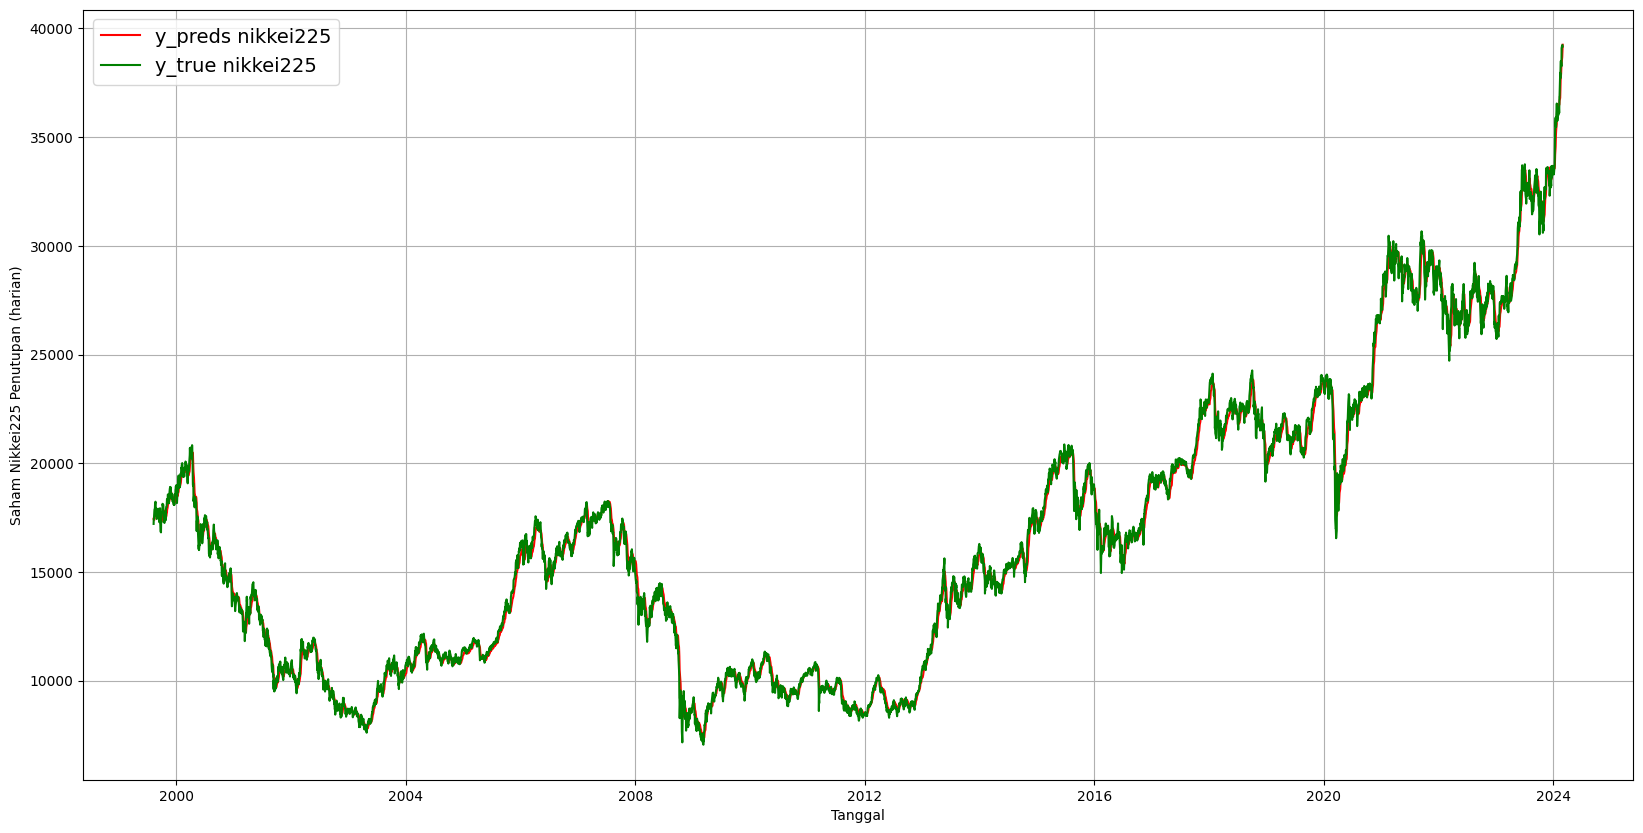

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_2_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_2_plot_prediksi_LSTM_multi.png')

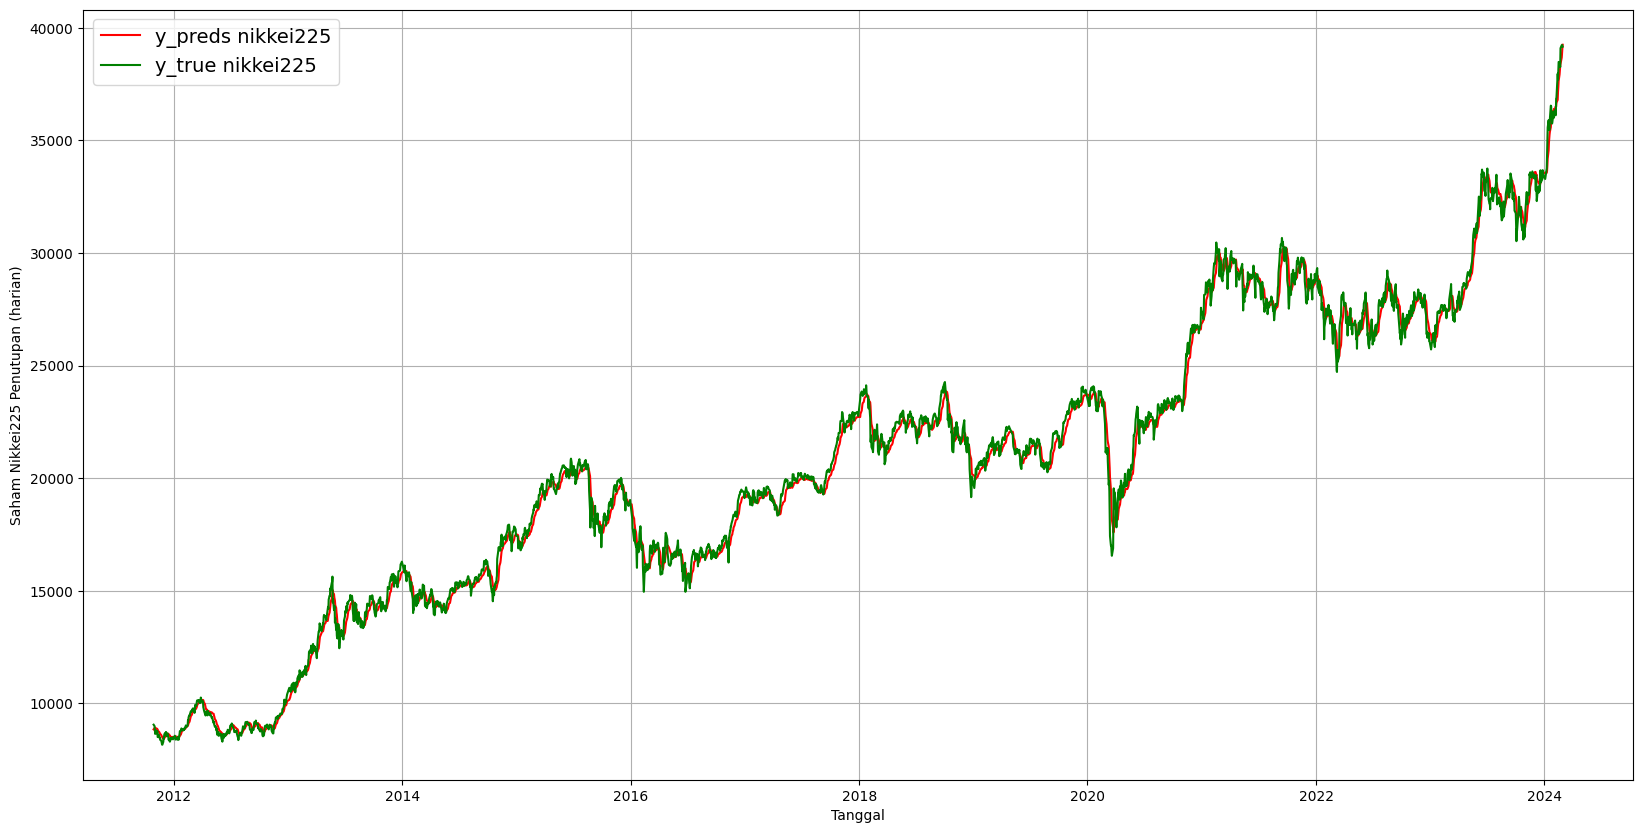

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_2_preds[:,0], format = "-", start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", start = 3000, label = "y_true nikkei225", color = 'g')


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_2_plot_prediksi_LSTM_multi_zoomin.png')

simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_2, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_2_LSTM_multivariate.h5")

<ipython-input-124-c00d4224c35d>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_2, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_2_LSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_2 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_2_LSTM_multivariate.h5")

# Model 3 : Stacked LSTM

In [ ]:
train_windows.shape[2]

2

## Tuner Builder

In [ ]:
# model stacked LSTM dengan hyperparameter tuning

def model_stacked_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_3 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units =  hp.Int('lstm_n_units_1', min_value=32, max_value=256, step=32),
                               input_shape=(train_windows.shape[1], train_windows.shape[2]),
                               return_sequences = True,
                               activation = "relu"),

          #tf.keras.layers.Dropout(0.2, seed=42),
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units_2', min_value=32, max_value=256, step=32),
                               return_sequences = False,
                               activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(test_labels.shape[1])
          ], name = "model_3_stackedLSTM_multivariate")



  #compile model 3
  model_3.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_3

In [ ]:
import keras_tuner as kt

tuner_stackedLSTM_multi = kt.Hyperband(model_stacked_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs',
                     project_name='stackedLSTM_multivariate')

## Proses tuning


In [ ]:
tuner_stackedLSTM_multi.search(train_windows,
                               train_labels,
                               epochs=10,
                               validation_data=(test_windows, test_labels),
                               batch_size = 128)

Trial 30 Complete [00h 02m 33s]
val_loss: 0.012508746236562729

Best val_loss So Far: 0.009922189638018608
Total elapsed time: 00h 38m 03s


## Hasil parameter tuning terbaik

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_stackedLSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units_1', "lstm_n_units_2", 'learning_rate']
print('Best tune model stacked LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model stacked LSTM multivariate:
lstm_n_units_1: 224
lstm_n_units_2: 96
learning_rate: 0.001


## Hasil semua parameter tuning

In [ ]:
tuning = ['lstm_n_units_1', "lstm_n_units_2", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all=tuner_stackedLSTM_multi.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam = pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_best_hyperparameter_models/hp_Stacked_LSTM_multi.csv')
df_hyparam




lstm_n_units_1  lstm_n_units_2  learning_rate
0              224              96         0.0010
1               64             160         0.0010
2               64             256         0.0001
3              192              64         0.0001
4              128             224         0.0010
5               64              32         0.0001
6              256              32         0.0010
7              128              96         0.0010
8              128             224         0.0010
9              256              32         0.0010
10             128              96         0.0010
11             256             192         0.0001
12              64             256         0.0001
13             224             224         0.0001
14              32             224         0.0010
15              96             256         0.0001
16             128              96         0.0010
17              96             256         0.0001
18             224             224         0.0001
19              64             256         0.0001
20             224              32         0.0001
21              32              96         0.0100
22             160              96         0.0100
23             192              32         0.0100
24             256              64         0.0100
25             192              96         0.0100
26             128             128         0.0001
27              32              32         0.0001
28              64              96         0.0100
29              32             128         0.0001

In [ ]:
tuner_stackedLSTM_multi.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs/stackedLSTM_multivariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0027 summary
Hyperparameters:
lstm_n_units_1: 224
lstm_n_units_2: 96
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.009922189638018608

Trial 0026 summary
Hyperparameters:
lstm_n_units_1: 64
lstm_n_units_2: 160
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.010136116296052933

Trial 0017 summary
Hyperparameters:
lstm_n_units_1: 64
lstm_n_units_2: 256
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0015
Score: 0.012401415966451168

Trial 0029 summary
Hyperparameters:
lstm_n_units_1: 192
lstm_n_units_2: 64
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.012

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_3 = tuner_stackedLSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_3 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_3_stackedLSTM_multivariate.h5")



In [ ]:

# fit
history = model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/50
110/110 [==============================] - ETA: 0s - loss: 0.0627
Epoch 1: val_loss improved from inf to 0.02146, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_3_stackedLSTM_multivariate
110/110 [==============================] - 25s 207ms/step - loss: 0.0627 - val_loss: 0.0215
Epoch 2/50
110/110 [==============================] - ETA: 0s - loss: 0.0128
Epoch 2: val_loss improved from 0.02146 to 0.02000, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_3_stackedLSTM_multivariate
110/110 [==============================] - 23s 210ms/step - loss: 0.0128 - val_loss: 0.0200
Epoch 3/50
110/110 [==============================] - ETA: 0s - loss: 0.0108
Epoch 3: val_loss improved from 0.02000 to 0.01357, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_3_stackedLSTM_multivariate
110/110 [====

visualisasi model shape

In [ ]:
model_3.summary()

Model: "model_3_stackedLSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 21, 224)           203392    
                                                                 
 lstm_3 (LSTM)               (None, 96)                123264    
                                                                 
 dense_1 (Dense)             (None, 2)                 194       
                                                                 
Total params: 326850 (1.25 MB)
Trainable params: 326850 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


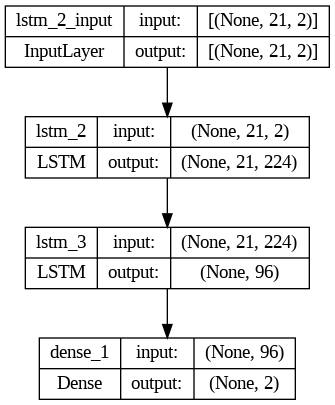

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model_3, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_plot/model_stackedLSTM_multi_shape.png', show_shapes=True, show_layer_names=True)



visualisasi loss setiap epoch

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.title ('Training and validation loss')
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_visualization/loss_stackedLSTM_multi.png')



# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_value_per_epoch/loss_stackedLSTM_multi.csv', index=False)


In [ ]:
# mengevaluasi model 3 dari epochs terakhir
model_3.evaluate(test_windows, test_labels)

189/189 [==============================] - 10s 52ms/step - loss: 0.0187


0.018698889762163162

In [ ]:
# mengevaluasi dan load model 3 pada best epoch yang loss mae paling kecil sepanjang training

model_3 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_3_stackedLSTM_multivariate")
model_3.evaluate(test_windows, test_labels)


189/189 [==============================] - 11s 52ms/step - loss: 0.0134


0.013352514244616032

In [ ]:
# membuat predicted value berdasarkan model multivariate model_3 yang sudah di train

model_3_preds = tf.squeeze(model_3.predict(test_windows))
model_3_preds



189/189 [==============================] - 5s 27ms/step


<tf.Tensor: shape=(6018, 2), dtype=float32, numpy=
array([[0.44397563, 0.039605  ],
       [0.44237515, 0.03962091],
       [0.441221  , 0.03961911],
       ...,
       [0.9727541 , 0.03691164],
       [0.9781277 , 0.03703311],
       [0.9831589 , 0.03717739]], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_3_preds = scaler_multivariate.inverse_transform(model_3_preds)
denormalized_test_labels = scaler_multivariate.inverse_transform(test_labels)

In [ ]:
# mengukur predicted value time series nikkei225 saja dengan metrik evaluasi regresion problem

model_3_results = evaluate_preds(y_true = denormalized_test_labels[:,0],
                                 y_pred = denormalized_model_3_preds[:,0])

model_3_results

{'mae': 468.8925,
 'mse': 341755.25,
 'rmse': 584.5984,
 'mape': 3.4032476,
 'R-square': 0.9922098988041324}

In [ ]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(6018,), dtype=float64, numpy=
array([0.43739572, 0.44280534, 0.44311693, ..., 1.        , 0.99919575,
       0.99812715])>

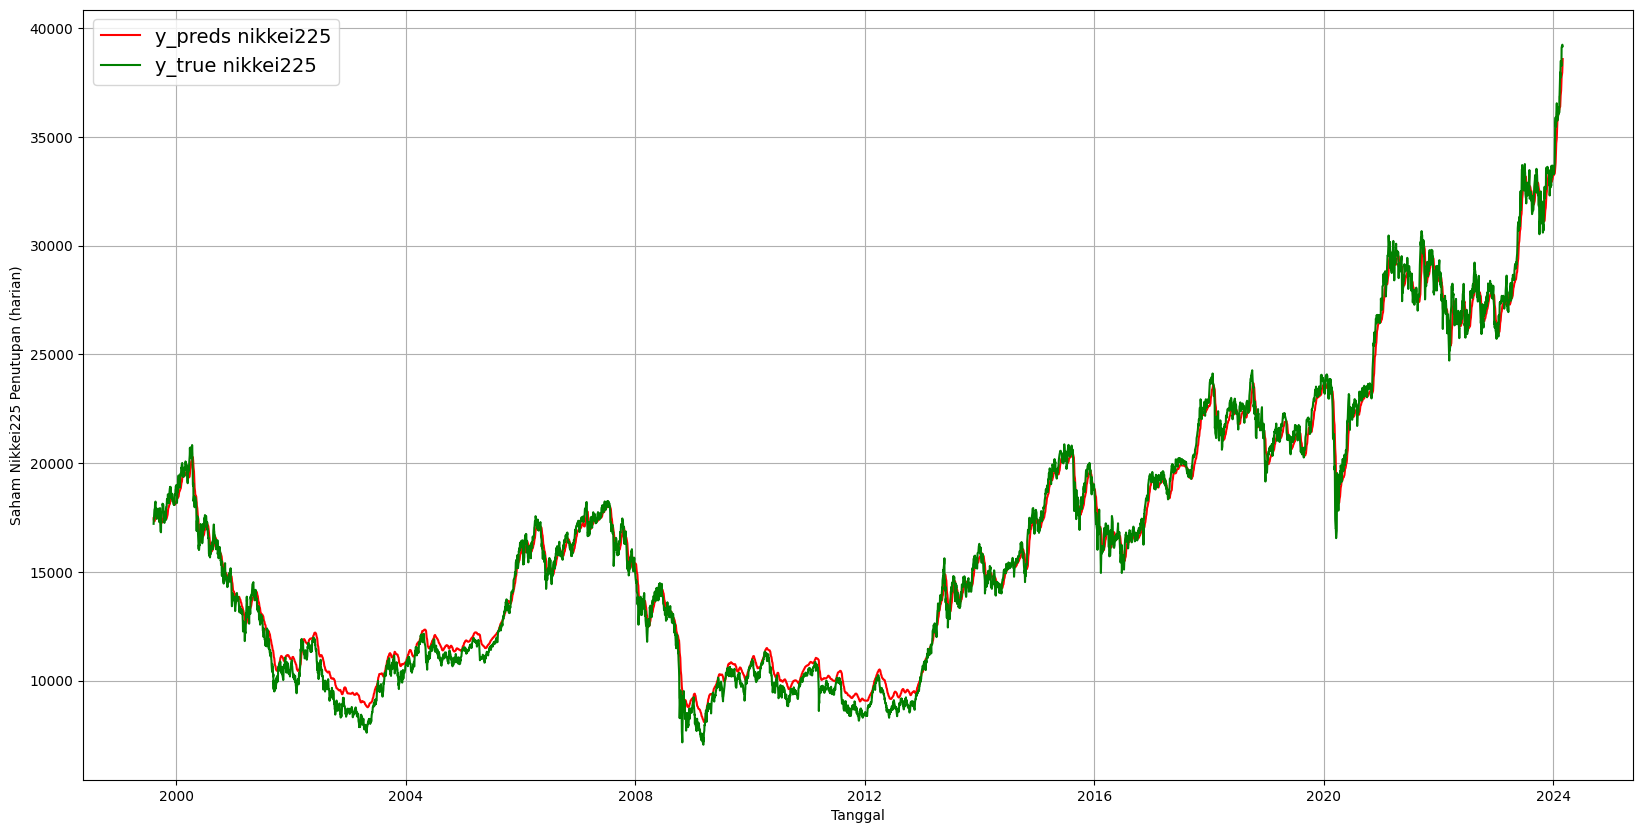

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_3_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_3_plot_prediksi_stackedLSTM_multi.png')



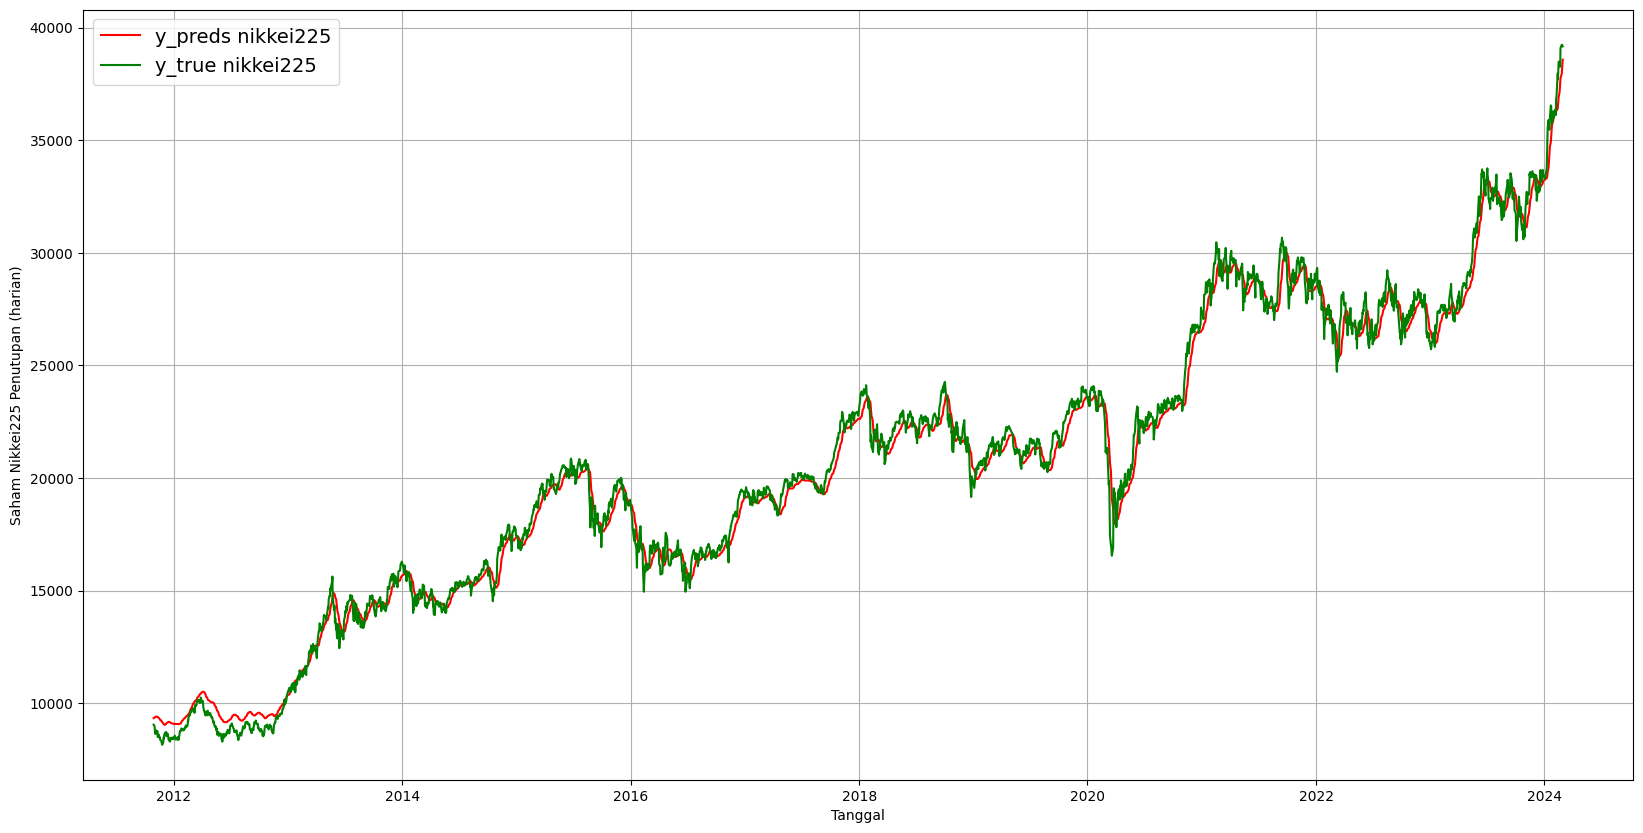

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_3_preds[:,0], format = "-", start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", start = 3000, label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_3_plot_prediksi_stackedLSTM_multi_zoomin.png')



simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model


# Save the model to disk as a .h5 file
save_model(model_3, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_3_stackedLSTM_multivariate.h5")

<ipython-input-146-622d182e6fda>:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_3, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_3_stackedLSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_3 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_3_stackedLSTM_multivariate.h5")



# Model 4 : Bidirectional LSTM

In [ ]:
train_windows.shape[2]

2

## Tuner Builder

In [ ]:
def model_bidirectional_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_4 = tf.keras.models.Sequential([
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = hp.Int('bi_lstm_n_units', min_value=32, max_value=256, step=32),
                                                            input_shape=(train_windows.shape[1], train_windows.shape[2]),
                                                            return_sequences = False,
                                                            activation = "relu")),
          #tf.keras.layers.Dropout(0.2, seed=42),
          #tf.keras.layers.LSTM(128, return_sequences = False, activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(test_labels.shape[1])
          ], name = "model_4_bidirectionalLSTM_multivariate")



  #compile model 4
  model_4.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_4

In [ ]:
import keras_tuner as kt

tuner_bi_LSTM_multi = kt.Hyperband(model_bidirectional_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs',
                     project_name='bi_LSTM_multivariate')

## Proses tuning


In [ ]:
tuner_bi_LSTM_multi.search(train_windows,
                           train_labels,
                           epochs=10,
                           validation_data=(test_windows, test_labels),
                           batch_size = 128)

Trial 30 Complete [00h 01m 59s]
val_loss: 0.013223228044807911

Best val_loss So Far: 0.007592007052153349
Total elapsed time: 00h 32m 00s


## Hasil parameter tuning terbaik

In [ ]:
tuner_bi_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_bi_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ["bi_lstm_n_units", 'learning_rate']
print('Best tune model bidirectional LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model bidirectional LSTM multivariate:
bi_lstm_n_units: 64
learning_rate: 0.001


## Hasil semua parameter tuning

In [ ]:
tuning = ["bi_lstm_n_units", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all=tuner_bi_LSTM_multi.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam = pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_best_hyperparameter_models/hp_bi_LSTM_multi.csv')

df_hyparam


bi_lstm_n_units  learning_rate
0                64         0.0010
1               256         0.0010
2               224         0.0010
3                64         0.0010
4               224         0.0010
5               160         0.0010
6               192         0.0100
7               160         0.0010
8               192         0.0010
9               192         0.0100
10              128         0.0010
11              192         0.0010
12               32         0.0100
13               64         0.0010
14              128         0.0100
15               64         0.0100
16              224         0.0010
17              256         0.0001
18               32         0.0100
19              224         0.0001
20               96         0.0001
21              256         0.0100
22              160         0.0100
23              224         0.0100
24              192         0.0001
25               32         0.0001
26               32         0.0010
27              160         0.0001
28              128         0.0001
29               64         0.0001

In [ ]:
tuner_bi_LSTM_multi.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs/bi_LSTM_multivariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0016 summary
Hyperparameters:
bi_lstm_n_units: 64
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.007592007052153349

Trial 0027 summary
Hyperparameters:
bi_lstm_n_units: 256
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.00774166127666831

Trial 0017 summary
Hyperparameters:
bi_lstm_n_units: 224
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0015
Score: 0.008099091239273548

Trial 0014 summary
Hyperparameters:
bi_lstm_n_units: 64
learning_rate: 0.001
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0002
Score: 0.00892633106559515

Trial 0015 summary
Hyper

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_4 = tuner_bi_LSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_4 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_4_bidirectionalLSTM_multivariate.h5")

In [ ]:

# fit
history = model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

Epoch 1/50
110/110 [==============================] - ETA: 0s - loss: 0.0406
Epoch 1: val_loss improved from inf to 0.01034, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_4_bidirectionalLSTM_multivariate
110/110 [==============================] - 14s 106ms/step - loss: 0.0406 - val_loss: 0.0103
Epoch 2/50
109/110 [============================>.] - ETA: 0s - loss: 0.0066
Epoch 2: val_loss did not improve from 0.01034
110/110 [==============================] - 8s 70ms/step - loss: 0.0066 - val_loss: 0.0133
Epoch 3/50
110/110 [==============================] - ETA: 0s - loss: 0.0061
Epoch 3: val_loss improved from 0.01034 to 0.00972, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_4_bidirectionalLSTM_multivariate
110/110 [==============================] - 9s 84ms/step - loss: 0.0061 - val_loss: 0.0097
Epoch 4/50
110/110 [==============================] - ETA:

visualisasi model shape

In [ ]:
model_4.summary()

Model: "model_4_bidirectionalLSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 128)               34304     
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 34562 (135.01 KB)
Trainable params: 34562 (135.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


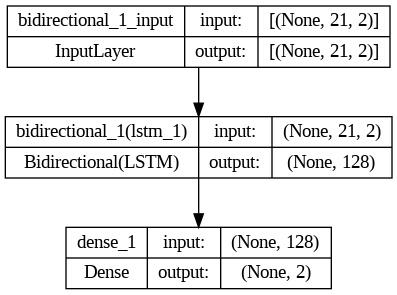

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model_4, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_plot/model_biLSTM_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

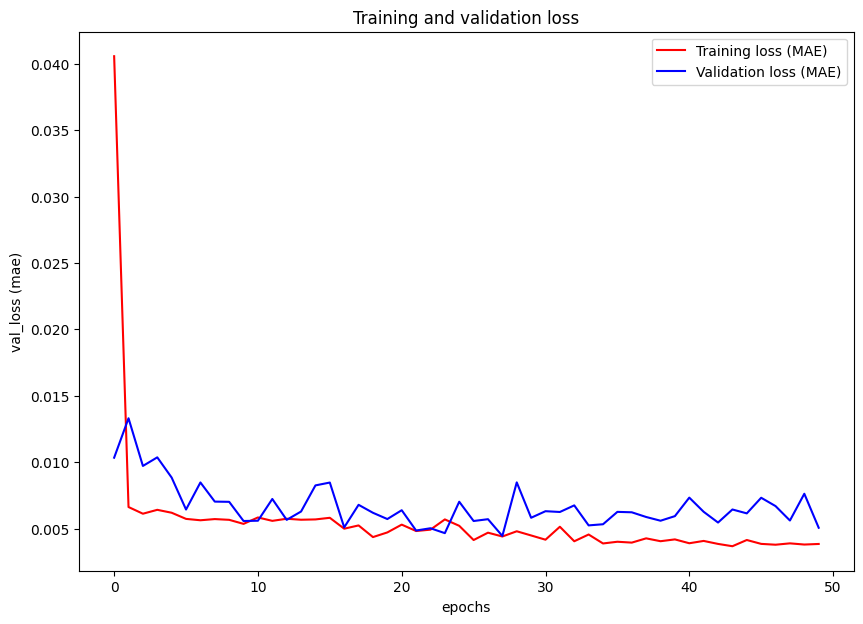

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.title ('Training and validation loss')
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_visualization/loss_bidirectional_LSTM_multi.png')


# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_value_per_epoch/loss_bidirectional_LSTM_multi.csv', index=False)


In [ ]:
# mengevaluasi model 4 dari epochs terakhir
model_4.evaluate(test_windows, test_labels)

189/189 [==============================] - 3s 16ms/step - loss: 0.0051


0.005061385687440634

In [ ]:
# mengevaluasi dan load model 4 pada best epoch yang loss mae paling kecil sepanjang training

model_4 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_4_bidirectionalLSTM_multivariate")
model_4.evaluate(test_windows, test_labels)


189/189 [==============================] - 1s 6ms/step - loss: 0.0044


0.00444404361769557

In [ ]:
# membuat predicted value berdasarkan model multivariate model_4 yang sudah di train

model_4_preds = tf.squeeze(model_4.predict(test_windows))
model_4_preds



189/189 [==============================] - 1s 6ms/step


<tf.Tensor: shape=(6018, 2), dtype=float32, numpy=
array([[0.44223893, 0.04281694],
       [0.4410696 , 0.0429433 ],
       [0.44137284, 0.04312298],
       ...,
       [0.99652386, 0.01934734],
       [1.0010794 , 0.01910239],
       [1.0043688 , 0.0187672 ]], dtype=float32)>

In [ ]:
model_4_preds[:,0]

<tf.Tensor: shape=(6018,), dtype=float32, numpy=
array([0.44223893, 0.4410696 , 0.44137284, ..., 0.99652386, 1.0010794 ,
       1.0043688 ], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_4_preds = scaler_multivariate.inverse_transform(model_4_preds)
denormalized_test_labels = scaler_multivariate.inverse_transform(test_labels)

In [ ]:
# mengukur predicted value time series nikkei225 saja dengan metrik evaluasi regresion problem

model_4_results = evaluate_preds(y_true = denormalized_test_labels[: , 0],
                                 y_pred = denormalized_model_4_preds[: , 0])

model_4_results

{'mae': 272.3249,
 'mse': 136948.98,
 'rmse': 370.0662,
 'mape': 1.7735317,
 'R-square': 0.9968783315760285}

In [ ]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(6018,), dtype=float64, numpy=
array([0.43739572, 0.44280534, 0.44311693, ..., 1.        , 0.99919575,
       0.99812715])>

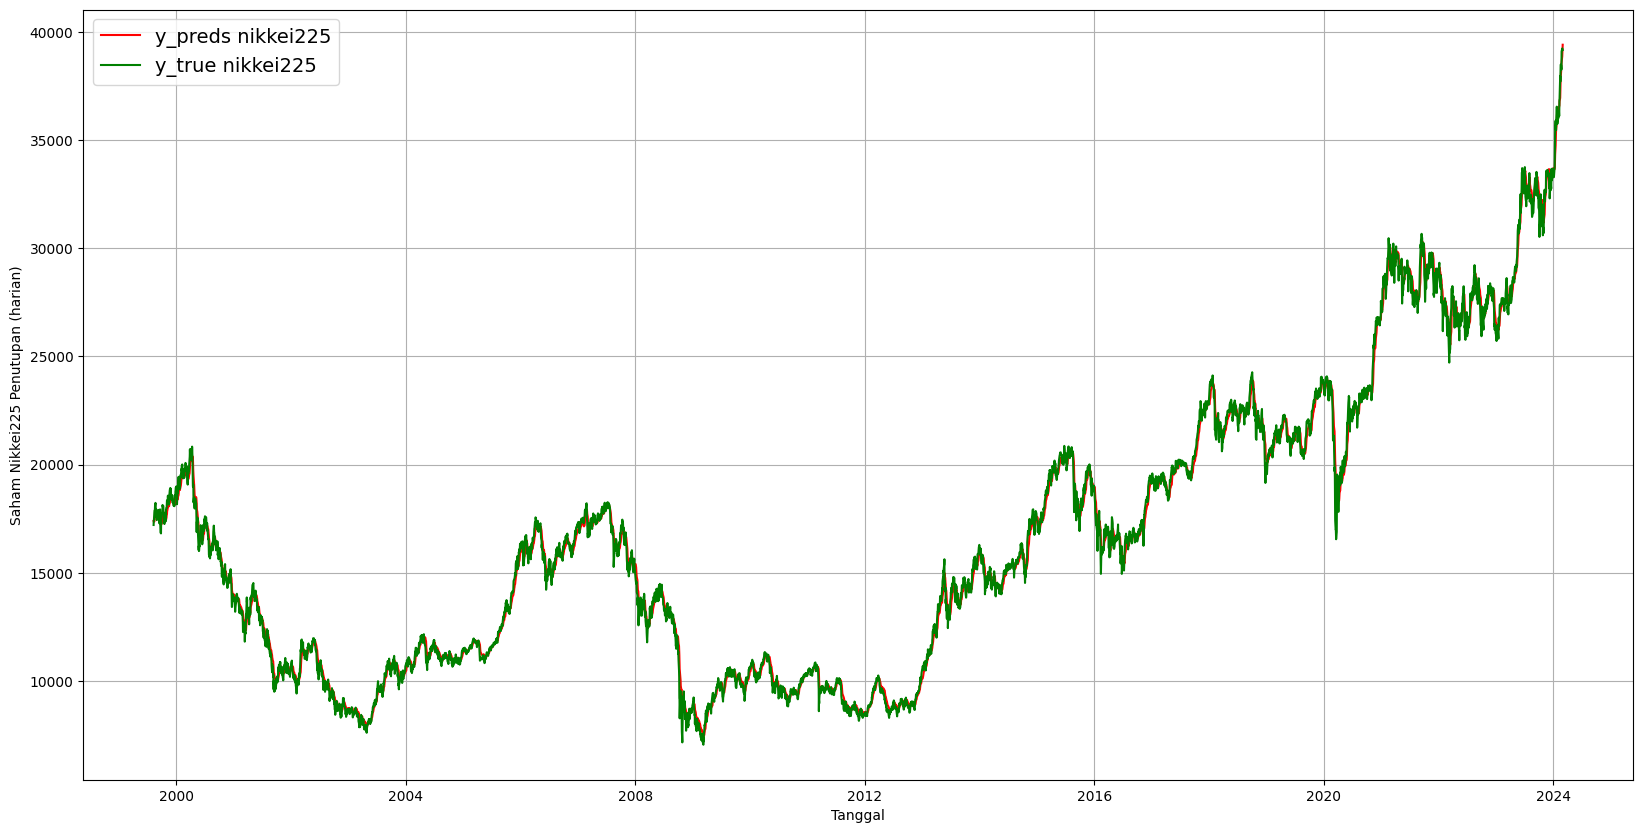

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_4_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_4_plot_prediksi_biLSTM_multi.png')


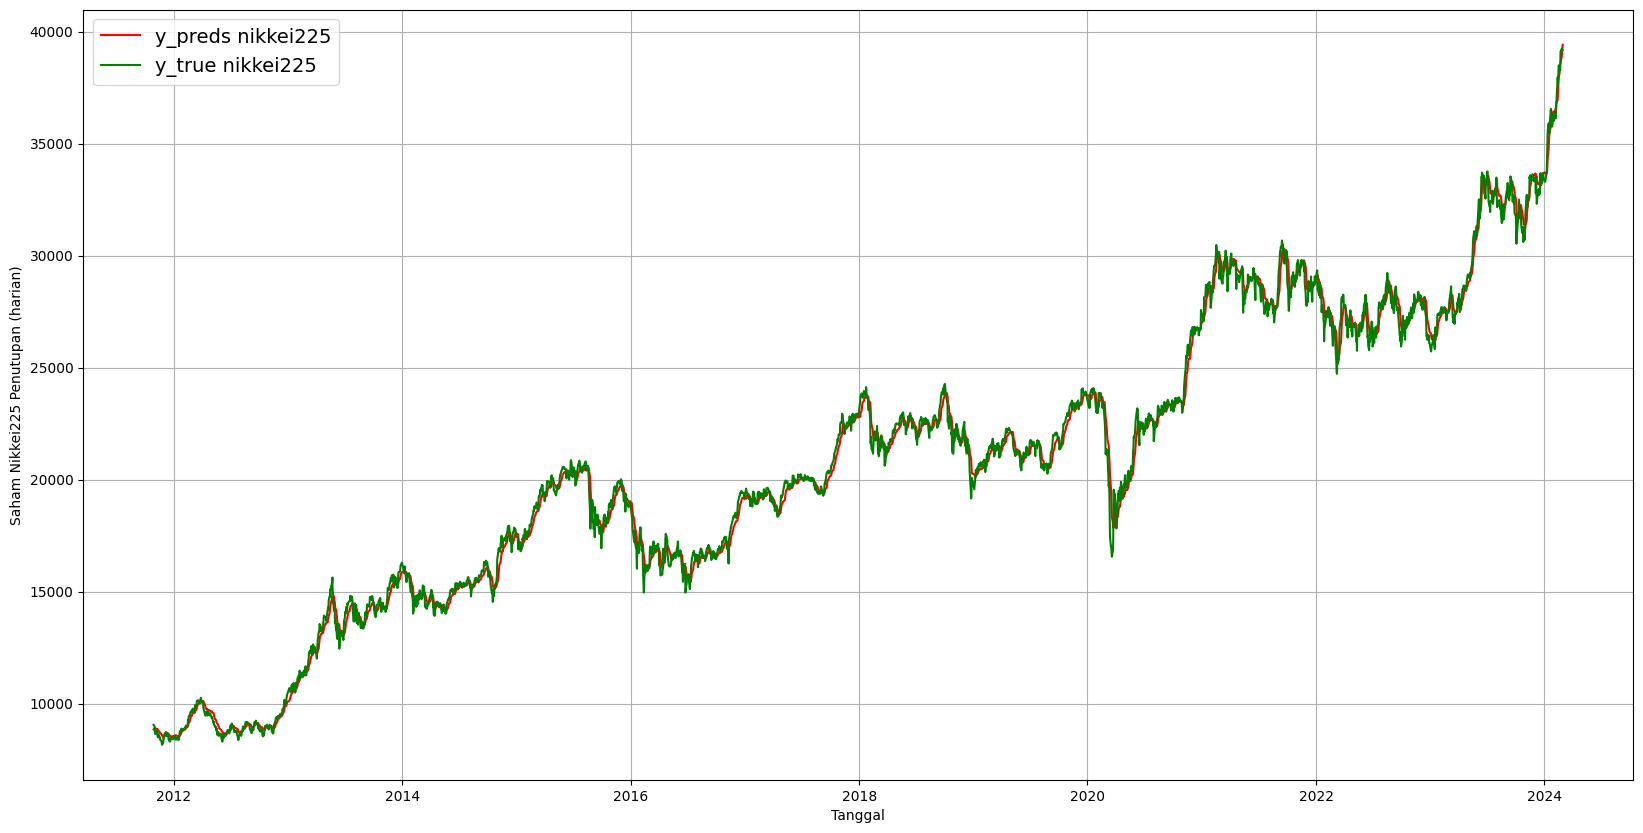

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_4_preds[:,0], format = "-", start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", start = 3000, label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_4_plot_prediksi_biLSTM_multi_zoomin.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model


# Save the model to disk as a .h5 file
save_model(model_4, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_4_bidirectionalLSTM_multivariate.h5")

<ipython-input-174-31a8fde8e042>:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_4, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_4_bidirectionalLSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_4 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_4_bidirectionalLSTM_multivariate.h5")

# Model 5 : CNN-LSTM

## Tuner Builder

In [ ]:
def model_CNN_LSTM_multi_builder(hp):
  tf.random.set_seed(42)

  model_5 = tf.keras.models.Sequential([
    # YOUR CODE HERE.
    tf.keras.layers.Conv1D(filters=hp.Int('Conv1D_n_filters', min_value=32, max_value=256, step=32),
                          kernel_size=hp.Int('Conv1D_kernel_size', min_value=5, max_value=10, step=1),
                          strides=1,
                          padding="causal",
                          activation="relu",
                          input_shape=[train_windows.shape[1], train_windows.shape[2]]),

    tf.keras.layers.LSTM(units = hp.Int('LSTM_n_units', min_value=32, max_value=256, step=32),
                        return_sequences=False,
                        activation = "relu"),

    tf.keras.layers.Dense(test_labels.shape[1]),
    ], name = "model_5_CNN-LSTM_multivariate")


  #compile model 5
  model_5.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_5

In [ ]:
import keras_tuner as kt

tuner_CNN_LSTM_multi = kt.Hyperband(model_CNN_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs',
                     project_name='CNN_LSTM_multivariate')

## Proses tuning


In [ ]:
tuner_CNN_LSTM_multi.search(train_windows,
                            train_labels,
                            epochs=10,
                            validation_data=(test_windows, test_labels),
                            batch_size = 128)

Trial 30 Complete [00h 03m 27s]
val_loss: 0.012607886455953121

Best val_loss So Far: 0.005025911144912243
Total elapsed time: 00h 27m 56s


## Hasil parameter tuning terbaik

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_CNN_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['Conv1D_n_filters', 'Conv1D_kernel_size', "LSTM_n_units", 'learning_rate']
print('Best tune model CNN LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model CNN LSTM multivariate:
Conv1D_n_filters: 256
Conv1D_kernel_size: 7
LSTM_n_units: 64
learning_rate: 0.001


## Hasil semua parameter tuning

In [ ]:
tuning = ['Conv1D_n_filters', 'Conv1D_kernel_size', "LSTM_n_units", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all=tuner_CNN_LSTM_multi.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam= pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_best_hyperparameter_models/hp_CNN_LSTM_multi.csv')
df_hyparam


Conv1D_n_filters  Conv1D_kernel_size  LSTM_n_units  learning_rate
0                256                   7            64         0.0010
1                128                   7           160         0.0010
2                128                   7           160         0.0010
3                 32                   7            64         0.0010
4                192                   5           160         0.0001
5                 64                   8           128         0.0001
6                 32                   8           128         0.0010
7                192                  10            32         0.0010
8                128                   7           160         0.0010
9                256                  10           224         0.0010
10                32                   7            64         0.0010
11               192                   5           160         0.0001
12               160                   5           128         0.0010
13                32                   8           128         0.0010
14               160                   8           224         0.0001
15               192                   8           160         0.0001
16                64                   7            32         0.0010
17                32                   8           128         0.0010
18               160                   6           128         0.0001
19               160                   5           128         0.0010
20               192                  10            32         0.0010
21               192                   9            32         0.0010
22               224                  10            32         0.0001
23               160                   7            64         0.0001
24               256                   6            32         0.0010
25                64                   6           256         0.0001
26               160                   5           192         0.0100
27                32                   6            96         0.0001
28               128                   5           224         0.0100
29                32                   8            32         0.0001

In [ ]:
tuner_CNN_LSTM_multi.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs/CNN_LSTM_multivariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0027 summary
Hyperparameters:
Conv1D_n_filters: 256
Conv1D_kernel_size: 7
LSTM_n_units: 64
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005025911144912243

Trial 0016 summary
Hyperparameters:
Conv1D_n_filters: 128
Conv1D_kernel_size: 7
LSTM_n_units: 160
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.005841798149049282

Trial 0010 summary
Hyperparameters:
Conv1D_n_filters: 128
Conv1D_kernel_size: 7
LSTM_n_units: 160
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.005875871982425451

Trial 0022 summary
Hyperparameters:
Conv1D_n_filters: 32
Conv1D_kernel_size: 7
LSTM_n_units: 64
learning_rate: 0.001
t

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_5 = tuner_CNN_LSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_5 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_5_CNN-LSTM_multivariate.h5")


In [ ]:

# fit
history = model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/50
109/110 [============================>.] - ETA: 0s - loss: 0.0331
Epoch 1: val_loss improved from inf to 0.00746, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_5_CNN-LSTM_multivariate
110/110 [==============================] - 15s 113ms/step - loss: 0.0329 - val_loss: 0.0075
Epoch 2/50
109/110 [============================>.] - ETA: 0s - loss: 0.0094
Epoch 2: val_loss did not improve from 0.00746
110/110 [==============================] - 8s 73ms/step - loss: 0.0094 - val_loss: 0.0075
Epoch 3/50
109/110 [============================>.] - ETA: 0s - loss: 0.0085
Epoch 3: val_loss did not improve from 0.00746
110/110 [==============================] - 7s 60ms/step - loss: 0.0085 - val_loss: 0.0104
Epoch 4/50
110/110 [==============================] - ETA: 0s - loss: 0.0081
Epoch 4: val_loss improved from 0.00746 to 0.00665, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030

visualisasi model shape

In [ ]:
model_5.summary()

Model: "model_5_CNN-LSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 21, 256)           3840      
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 86146 (336.51 KB)
Trainable params: 86146 (336.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


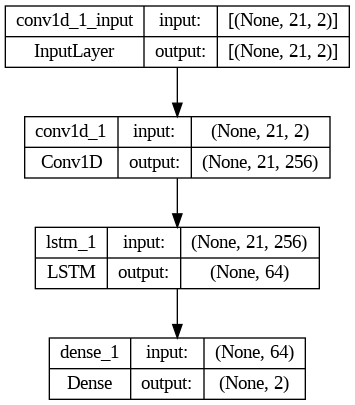

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_5, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_plot/model_CNN-LSTM_multi_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

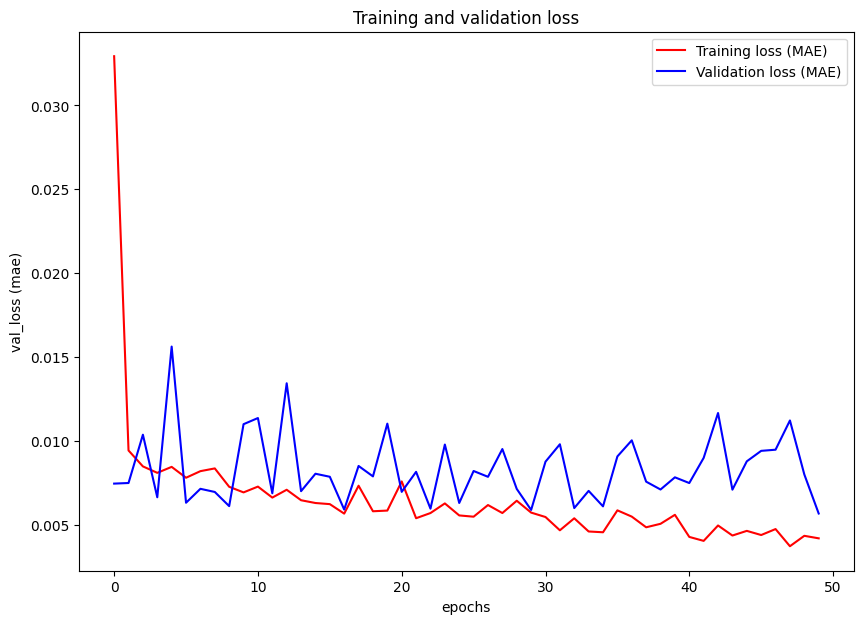

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)



# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_visualization/loss_CNN-LSTM_multi.png')



# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_value_per_epoch/loss_CNN-LSTM_multi.csv', index=False)


In [ ]:
# mengevaluasi model 5 dari epochs terakhir
model_5.evaluate(test_windows, test_labels)

189/189 [==============================] - 2s 9ms/step - loss: 0.0057


0.005679928231984377

In [ ]:
# mengevaluasi dan load model 5 pada best epoch yang loss mae paling kecil sepanjang training

model_5 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_5_CNN-LSTM_multivariate")
model_5.evaluate(test_windows, test_labels)


189/189 [==============================] - 2s 9ms/step - loss: 0.0057


0.005679928231984377

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_5_preds = tf.squeeze(model_5.predict(test_windows))
model_5_preds



189/189 [==============================] - 2s 10ms/step


<tf.Tensor: shape=(6018, 2), dtype=float32, numpy=
array([[0.4340119 , 0.0371872 ],
       [0.43497935, 0.03725423],
       [0.43909267, 0.03724291],
       ...,
       [1.0138975 , 0.03978481],
       [1.0156893 , 0.04054173],
       [1.0154719 , 0.04094528]], dtype=float32)>

In [ ]:
model_5_preds[:,0]

<tf.Tensor: shape=(6018,), dtype=float32, numpy=
array([0.4340119 , 0.43497935, 0.43909267, ..., 1.0138975 , 1.0156893 ,
       1.0154719 ], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_5_preds = scaler_multivariate.inverse_transform(model_5_preds)
denormalized_test_labels = scaler_multivariate.inverse_transform(test_labels)

In [ ]:
# mengukur predicted value time series nikkei225 saja dengan metrik evaluasi regresion problem

model_5_results = evaluate_preds(y_true = denormalized_test_labels[:,0],
                                 y_pred = denormalized_model_5_preds[:,0])

model_5_results

{'mae': 207.76439,
 'mse': 74714.52,
 'rmse': 273.33957,
 'mape': 1.3826485,
 'R-square': 0.9982969281747612}

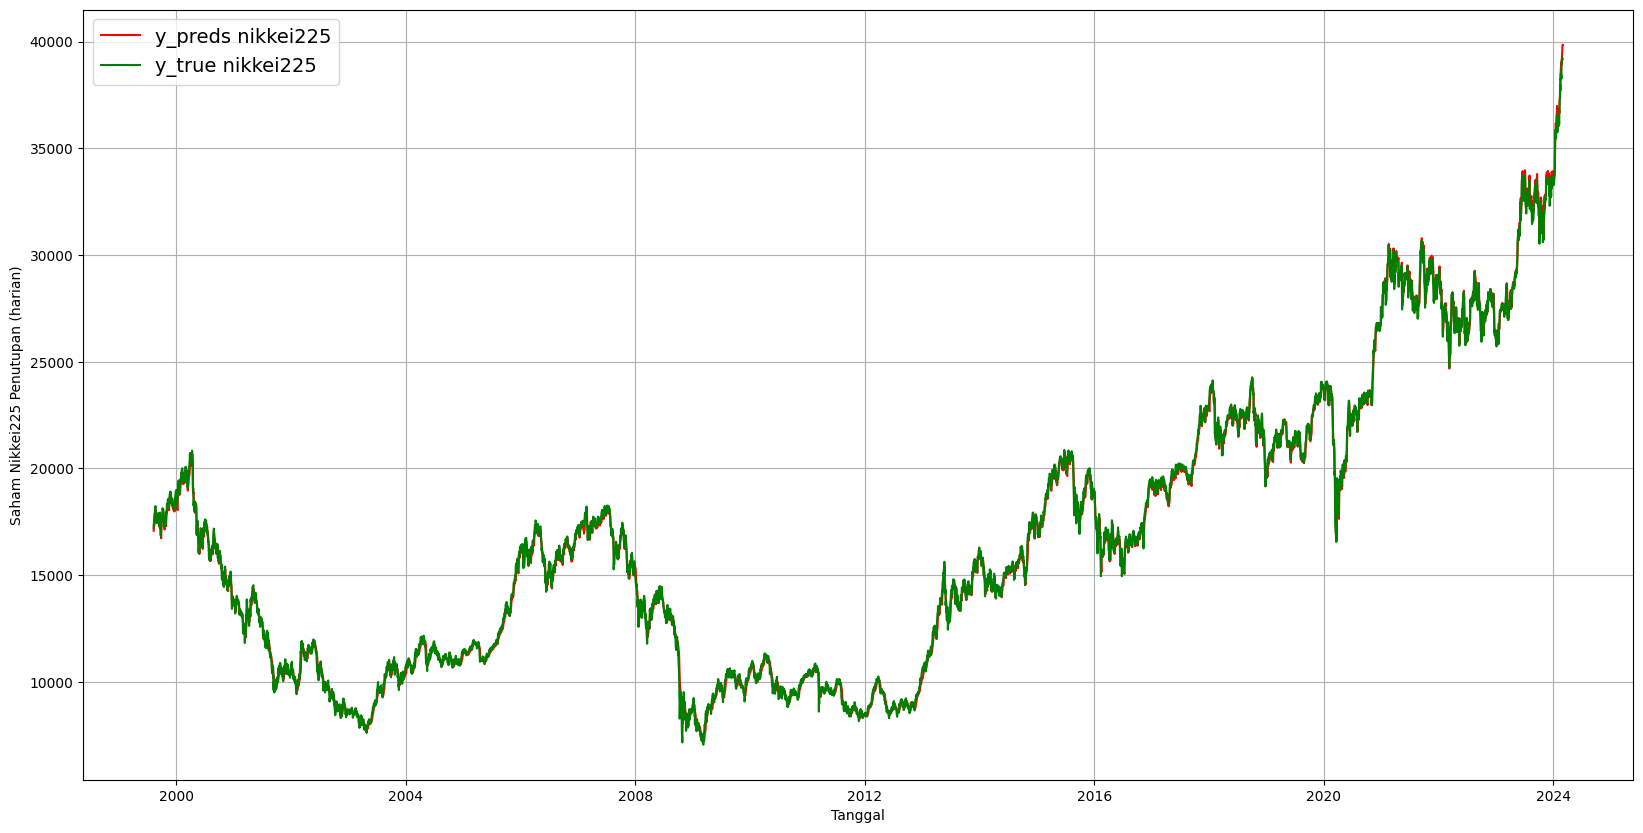

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_5_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_5_plot_prediksi_CNN-LSTM_multi.png')


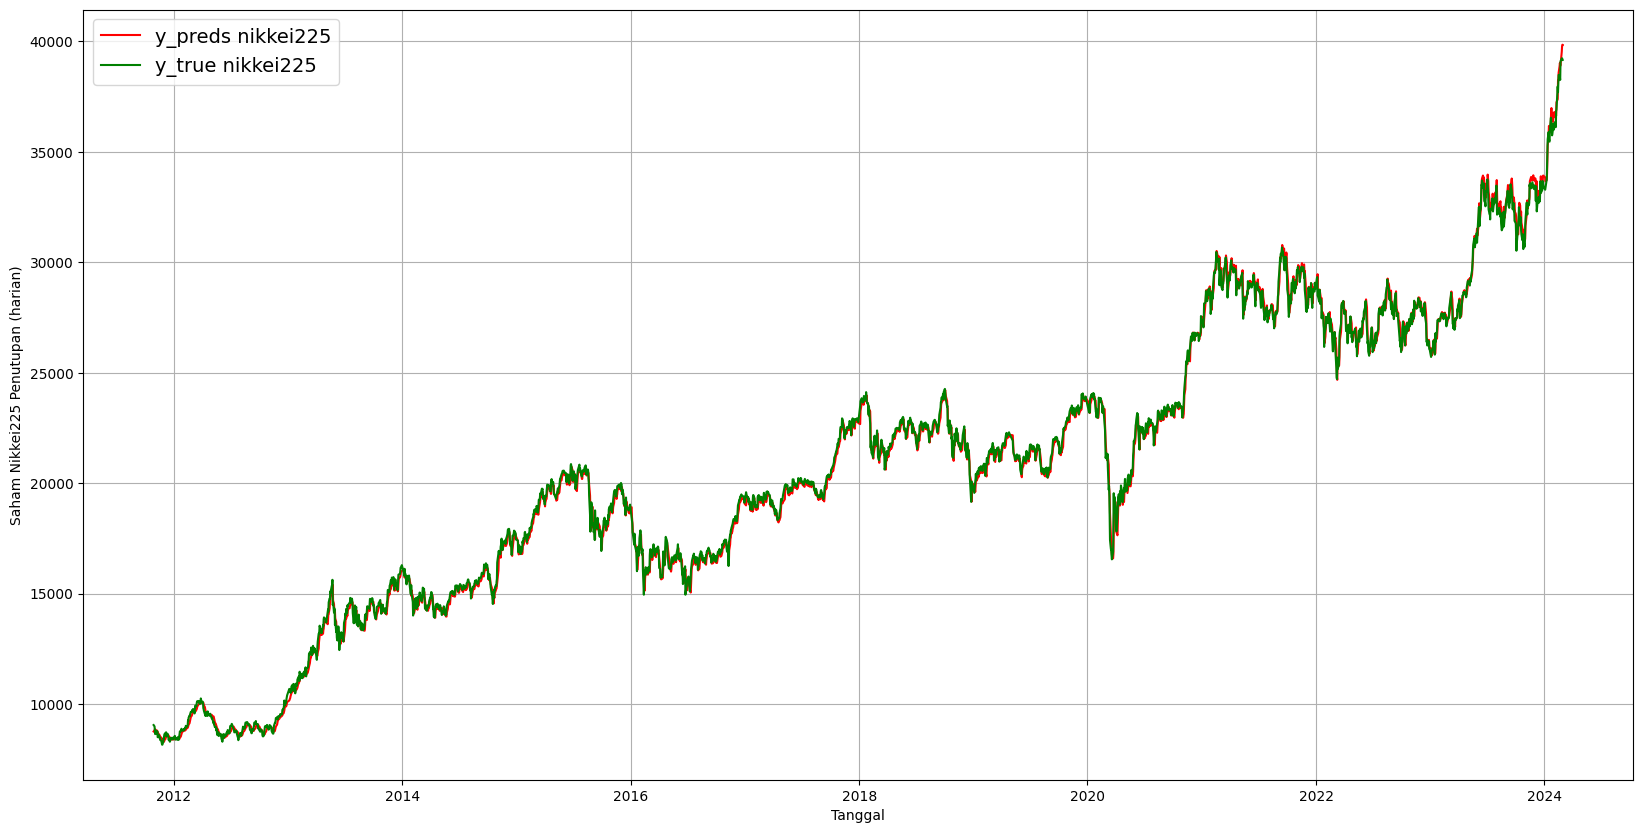

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_5_preds[:,0], format = "-", start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_labels[:,0], format = "-", start = 3000, label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_5_plot_prediksi_CNN-LSTM_multi_zoomin.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_5, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_5_CNN-LSTM_multivariate.h5")


<ipython-input-194-a4b9fc004ef5>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_5, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_5_CNN-LSTM_multivariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_5 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_5_CNN-LSTM_multivariate.h5")


# Membuat univariate time series forecasting stock price

In [ ]:
print(full_windows[:, 0]),
print(full_windows[:, 0].shape)
print("\n")
print(full_labels[:, 0])
print(full_labels[:, 0].shape)

[[5.95337367e-04 5.62921348e-01]
 [5.18206571e-04 5.62921348e-01]
 [4.44140575e-04 5.62921348e-01]
 ...
 [9.23302107e-01 2.24719101e-02]
 [9.10904992e-01 2.24719101e-02]
 [9.17950711e-01 2.24719101e-02]]
(20057, 2)


[2.44417786e-04 2.01510589e-04 1.86186590e-04 ... 1.00000000e+00
 9.99195745e-01 9.98127152e-01]
(20057,)


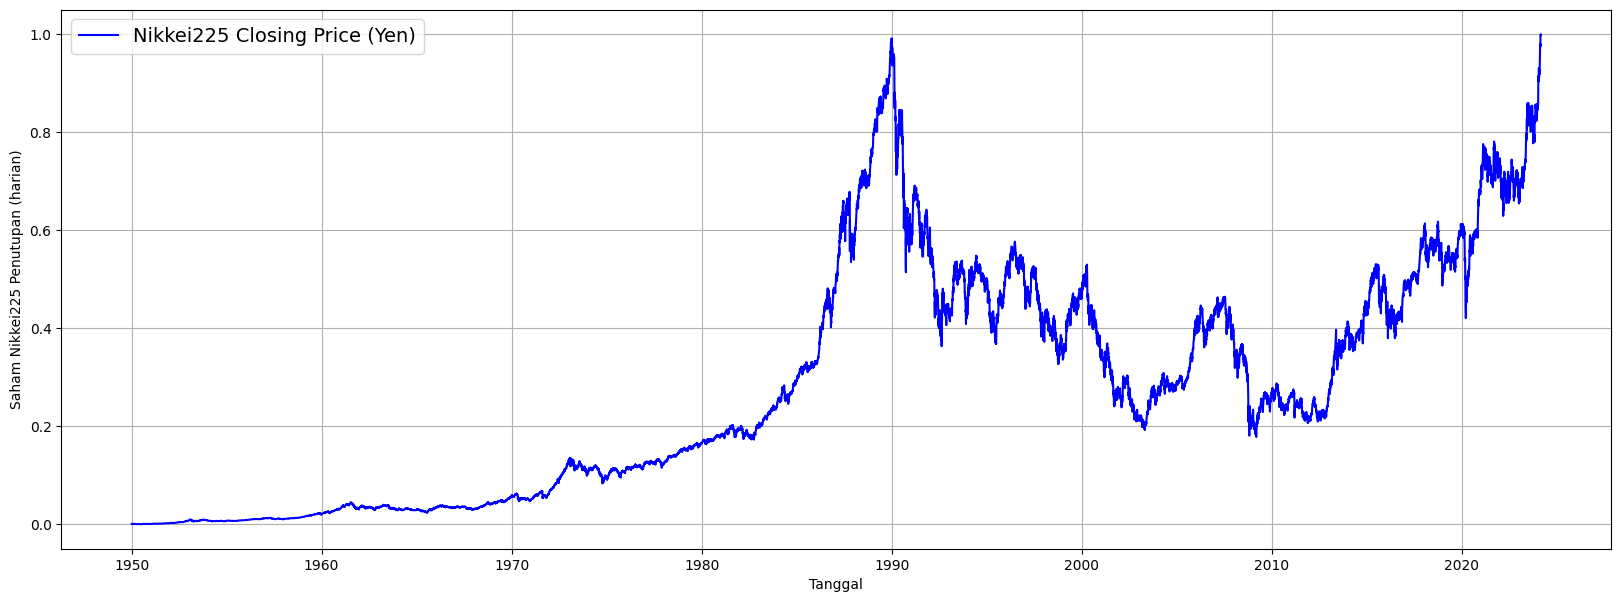

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')

memanggil variabel window dan label untuk univariate nikkei stock price

In [ ]:
X_nikkei.shape, y_nikkei.shape

((20057, 21, 1), (20057, 1, 1))

reshape dimensi X_nikkei dan y_nikkei dan masukkan ke variabel baru

In [ ]:
train_nikkeiWindows = np.squeeze(X_nikkei[:len(X_nikkei[: int(SPLIT_SIZE * len(X_nikkei))])])
test_nikkeiWindows = np.squeeze(X_nikkei[len(X_nikkei[: int(SPLIT_SIZE * len(X_nikkei))]):])

train_nikkeiLabels = np.squeeze(y_nikkei[:len(y_nikkei[: int(SPLIT_SIZE * len(y_nikkei))])])
test_nikkeiLabels = np.squeeze(y_nikkei[len(y_nikkei[: int(SPLIT_SIZE * len(y_nikkei))]):])

In [ ]:
train_nikkeiWindows.shape, test_nikkeiWindows.shape

((14039, 21), (6018, 21))

In [ ]:
train_nikkeiWindows.shape[1]

21

In [ ]:
train_nikkeiLabels.shape, test_nikkeiLabels.shape

((14039,), (6018,))

# Model 6: Conv1D Univariate

In [ ]:
train_nikkeiWindows.shape

(14039, 21)

## Tuner Builder

In [ ]:
#create Conv1D model
def model_Conv1D_uni_builder(hp):
  tf.random.set_seed(42)

  model_6 = tf.keras.models.Sequential([
      #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      tf.keras.layers.Conv1D(filters = hp.Int('conv1D_n_filters', min_value=32, max_value=256, step=32),
                             kernel_size = hp.Int('conv1D_kernel_size', min_value=5, max_value=10, step=1),
                             strides = 1,
                             padding ="causal",
                             activation = "relu",
                             input_shape = (WINDOW_SIZE, 1)),
      tf.keras.layers.GlobalMaxPooling1D(),  # Add GlobalMaxPooling1D layer
      tf.keras.layers.Dense(1)

      #filters adalah jumlah hidden unit dalam layers tersebut
      # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
      # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
  ], name = "model_6_conv1D_univariate")

  #compile model 1
  model_6.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_6

In [ ]:
import keras_tuner as kt

tuner_Conv1D_uni = kt.Hyperband(model_Conv1D_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs',
                     project_name='Conv1D_univariate')



## Proses tuning


In [ ]:
tuner_Conv1D_uni.search(train_nikkeiWindows,
                        train_nikkeiLabels,
                        epochs=10,
                        validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                        batch_size=128)

Trial 30 Complete [00h 00m 13s]
val_loss: 0.01171927060931921

Best val_loss So Far: 0.010533865541219711
Total elapsed time: 00h 03m 23s


## Hasil parameter tuning terbaik

In [ ]:
tuner_Conv1D_uni.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_Conv1D_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
print('Best tune model Conv1D univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model Conv1D univariate:
conv1D_n_filters: 160
conv1D_kernel_size: 10
learning_rate: 0.01


## Hasil semua parameter tuning

In [ ]:
tuning =['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all = tuner_Conv1D_uni.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam= pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_best_hyperparameter_models/hp_Conv1D_uni.csv')
df_hyparam



conv1D_n_filters  conv1D_kernel_size  learning_rate
0                160                  10         0.0100
1                224                   6         0.0010
2                 96                   9         0.0100
3                256                   6         0.0100
4                160                   5         0.0100
5                256                   6         0.0100
6                 32                   7         0.0010
7                 96                   9         0.0100
8                 96                   6         0.0001
9                192                   6         0.0100
10               224                   6         0.0010
11               128                   8         0.0001
12               224                   5         0.0100
13                96                   6         0.0001
14                96                   6         0.0001
15                32                   9         0.0010
16               224                   8         0.0001
17                32                   9         0.0010
18                32                   8         0.0001
19               224                   6         0.0010
20               256                   6         0.0001
21               224                   8         0.0001
22               192                   7         0.0010
23               224                   7         0.0010
24               128                   6         0.0010
25               160                   8         0.0010
26               160                   7         0.0010
27               256                   7         0.0100
28                64                   9         0.0010
29               128                   9         0.0100

In [ ]:
tuner_Conv1D_uni.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs/Conv1D_univariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0026 summary
Hyperparameters:
conv1D_n_filters: 160
conv1D_kernel_size: 10
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.010533865541219711

Trial 0016 summary
Hyperparameters:
conv1D_n_filters: 224
conv1D_kernel_size: 6
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.010580344125628471

Trial 0025 summary
Hyperparameters:
conv1D_n_filters: 96
conv1D_kernel_size: 9
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0021
Score: 0.010754111222922802

Trial 0024 summary
Hyperparameters:
conv1D_n_filters: 256
conv1D_kernel_size: 6
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_6 = tuner_Conv1D_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_6 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_6_Conv1D_univariate.h5")


In [ ]:

# fit
history = model_6.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/50
108/110 [============================>.] - ETA: 0s - loss: 0.0201
Epoch 1: val_loss improved from inf to 0.01414, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_6_conv1D_univariate
110/110 [==============================] - 2s 12ms/step - loss: 0.0199 - val_loss: 0.0141
Epoch 2/50
107/110 [============================>.] - ETA: 0s - loss: 0.0079
Epoch 2: val_loss did not improve from 0.01414
110/110 [==============================] - 1s 6ms/step - loss: 0.0079 - val_loss: 0.0174
Epoch 3/50
105/110 [===========================>..] - ETA: 0s - loss: 0.0073
Epoch 3: val_loss did not improve from 0.01414
110/110 [==============================] - 1s 6ms/step - loss: 0.0073 - val_loss: 0.0159
Epoch 4/50
103/110 [===========================>..] - ETA: 0s - loss: 0.0065
Epoch 4: val_loss did not improve from 0.01414
110/110 [==============================] - 1s 6ms/step - loss: 0.0065 - val_loss: 0.0153
Epoch 5/50
10

visualisasi model shape

In [ ]:
model_6.summary()

Model: "model_6_conv1D_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 21, 160)           1760      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 160)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 1)                 161       
                                                                 
Total params: 1921 (7.50 KB)
Trainable params: 1921 (7.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


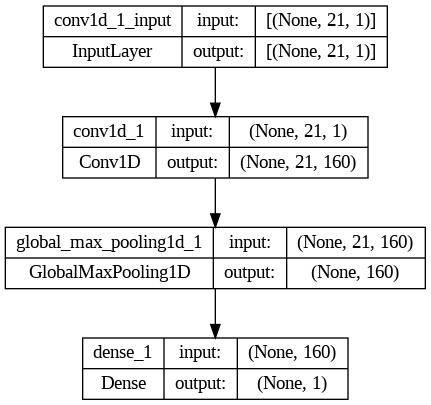

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_6, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_plot/model_Conv1D_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

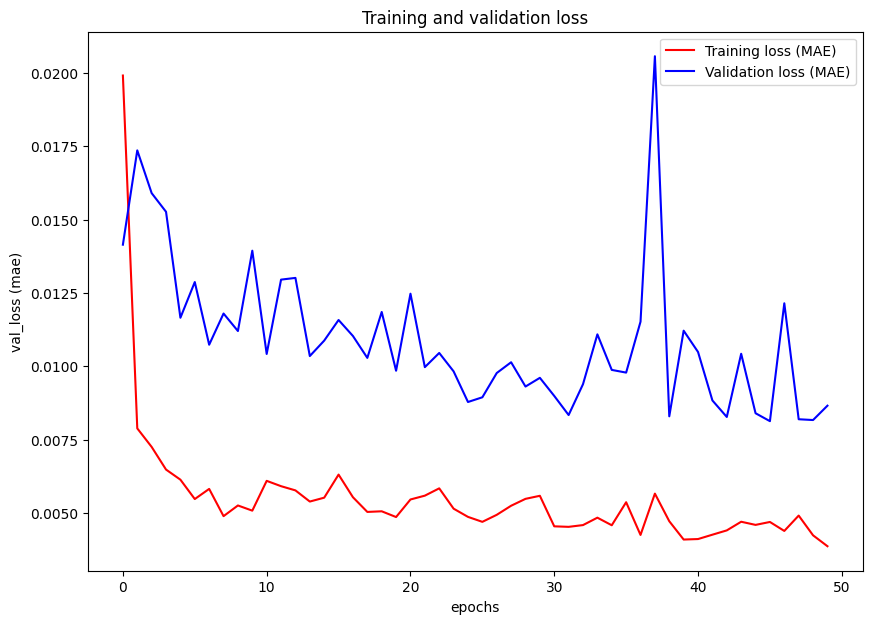

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)



# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_visualization/loss_Conv1D_uni.png')


# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_value_per_epoch/loss_Conv1D_uni.csv', index=False)


In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_6.evaluate(test_nikkeiWindows, test_nikkeiLabels)

189/189 [==============================] - 0s 2ms/step - loss: 0.0087


0.0086563341319561

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_6 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_6_conv1D_univariate")
model_6.evaluate(test_nikkeiWindows, test_nikkeiLabels)


189/189 [==============================] - 0s 2ms/step - loss: 0.0081


0.008129080757498741

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_6_preds = tf.squeeze(model_6.predict(test_nikkeiWindows))
model_6_preds



189/189 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(6018,), dtype=float32, numpy=
array([0.4423905 , 0.44239148, 0.44240588, ..., 0.9863871 , 0.9959642 ,
       1.0001656 ], dtype=float32)>

In [ ]:
model_6_preds.shape

TensorShape([6018])

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_6_preds = scaler_univariate.inverse_transform([model_6_preds])
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([test_nikkeiLabels])

In [ ]:
denormalized_model_6_preds = tf.squeeze(denormalized_model_6_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_6_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_6_preds)

model_6_results

{'mae': 318.2882,
 'mse': 199983.03,
 'rmse': 447.1946,
 'mape': 2.0521188,
 'R-square': 0.9954415098530316}

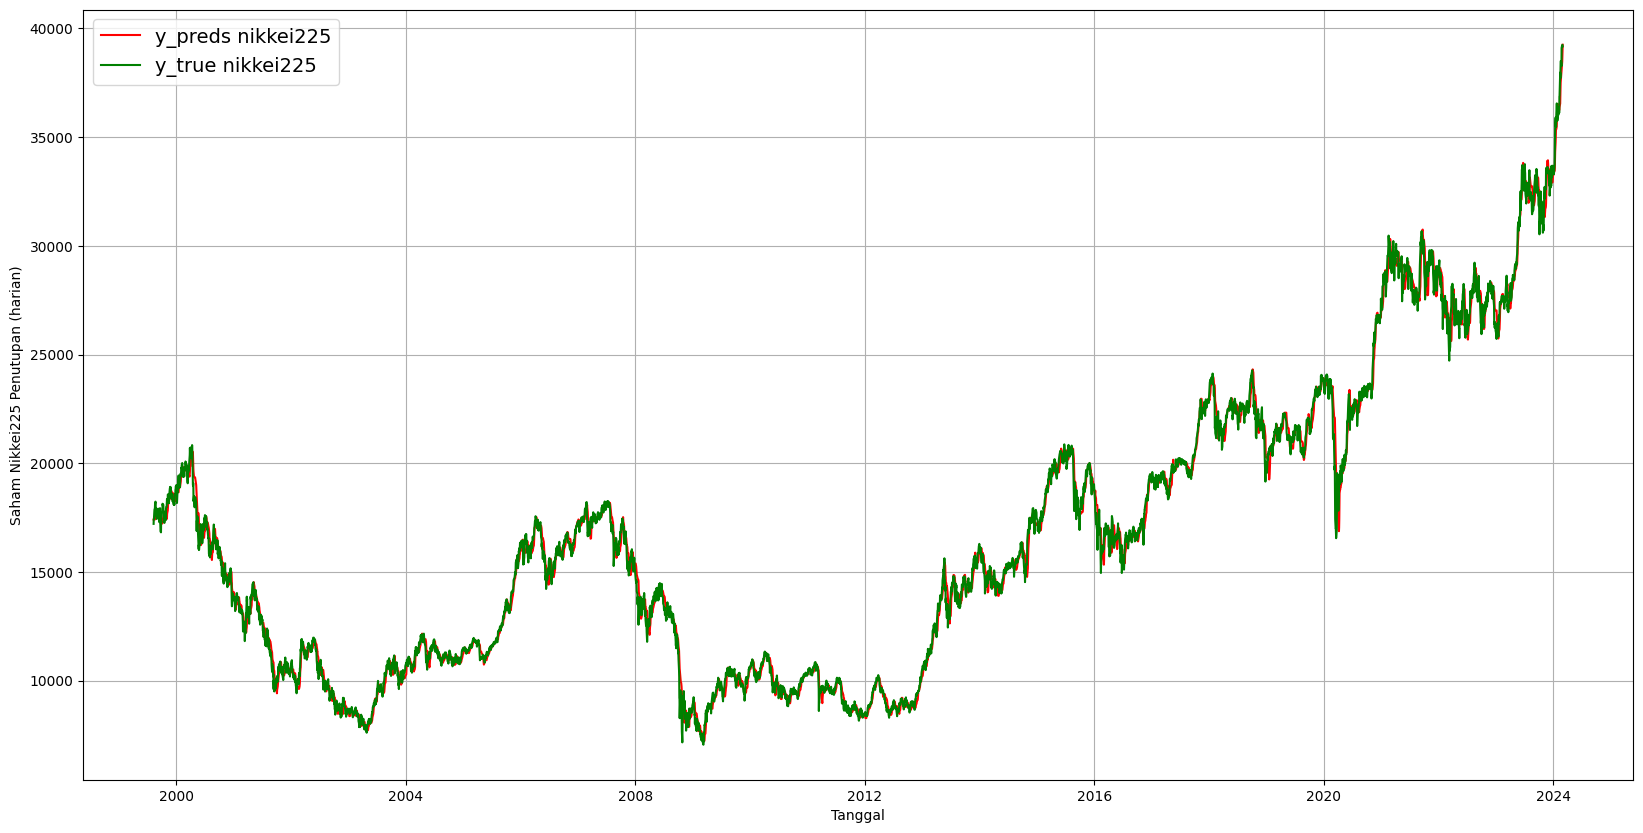

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_6_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_6_plot_prediksi_Conv1D_uni.png')


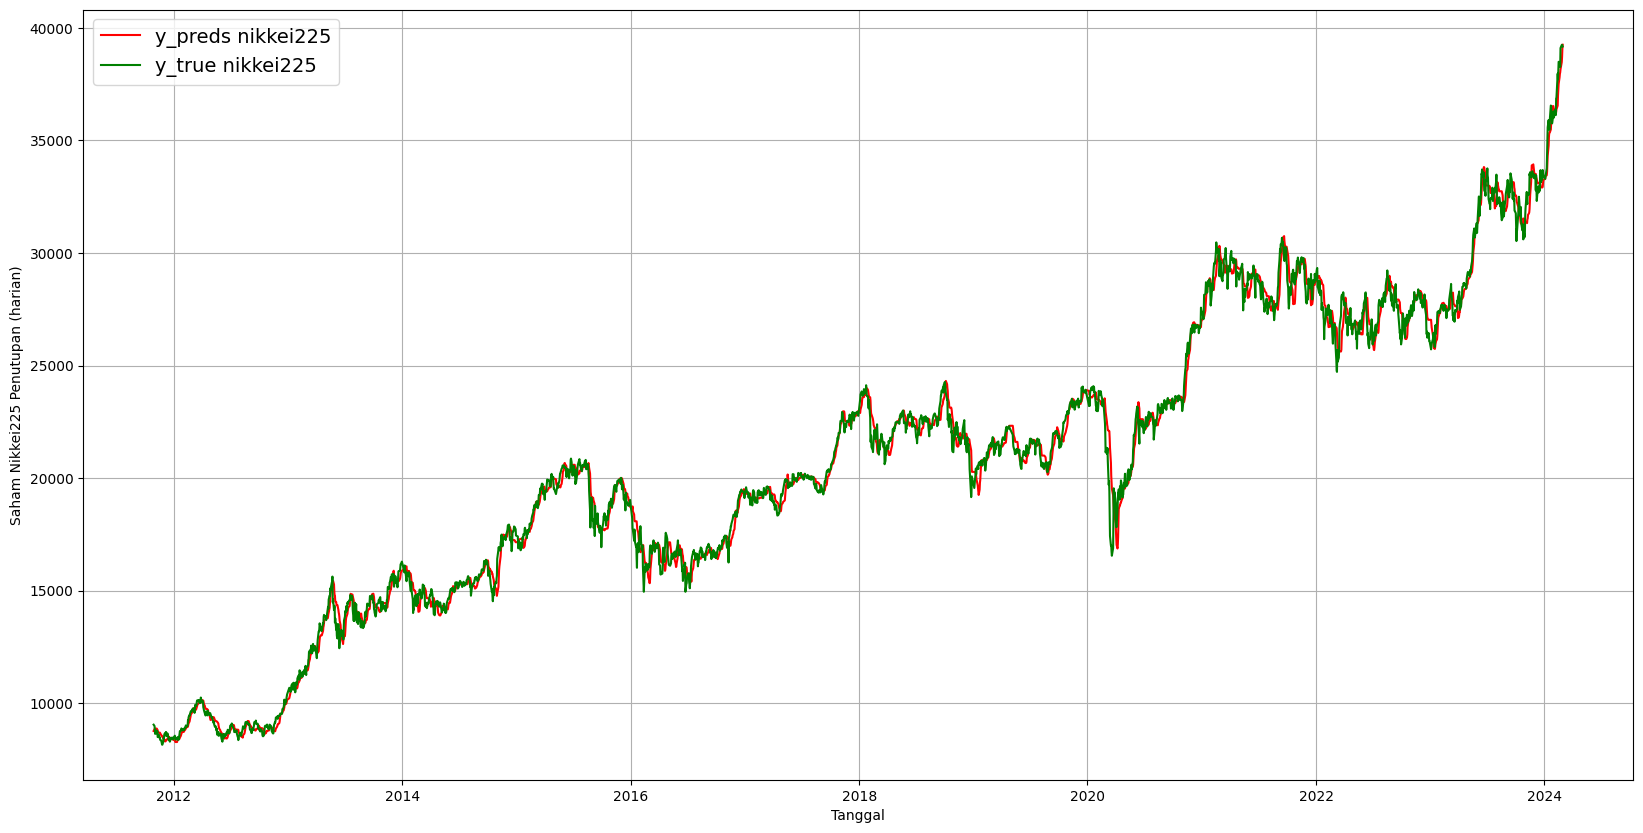

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_6_preds, format = "-", start = 3000,label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", start = 3000,label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_6_plot_prediksi_Conv1D_uni_zoomin.png')


In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_6, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_6_Conv1D_univariate.h5")


<ipython-input-228-e5f472136518>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_6, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_6_Conv1D_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_6 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_6_Conv1D_univariate.h5")


# Model 7: LSTM Univariate

## Tuner Builder

In [ ]:
# membuat model LSTM dengan hyperparameter tuning

def model_LSTM_uni_builder(hp):
  tf.random.set_seed(42)

  model_7 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units', min_value=32, max_value=256, step=32),
                               input_shape=(WINDOW_SIZE, 1),
                               return_sequences = False,
                               activation = "relu"),
          #tf.keras.layers.Dropout(0.2),
          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1, activation = "relu")
          ], name = "model_7_LSTM_univariate")



  #compile model 2
  model_7.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_7

In [ ]:
import keras_tuner as kt

tuner_LSTM_uni = kt.Hyperband(model_LSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs',
                     project_name='LSTM_univariate')

## Proses tuning


In [ ]:
tuner_LSTM_uni.search(train_nikkeiWindows,
                      train_nikkeiLabels,
                      epochs=10,
                      validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                      batch_size = 128)

Trial 30 Complete [00h 01m 33s]
val_loss: 0.008124449290335178

Best val_loss So Far: 0.004541334696114063
Total elapsed time: 00h 38m 36s


## Hasil parameter tuning terbaik

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units', 'learning_rate']
print('Best tune model LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model LSTM univariate:
lstm_n_units: 160
learning_rate: 0.01


## Hasil parameter semua tuning

In [ ]:
tuning =['lstm_n_units', 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all =tuner_LSTM_uni.get_best_hyperparameters(num_trials=30)
for hps in hps_all :
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam= pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_best_hyperparameter_models/hp_LSTM_uni.csv')
df_hyparam


lstm_n_units  learning_rate
0            160         0.0100
1            160         0.0100
2             96         0.0010
3            192         0.0010
4            160         0.0100
5             64         0.0010
6             32         0.0010
7             96         0.0010
8             64         0.0001
9             64         0.0010
10           192         0.0010
11           128         0.0010
12            64         0.0010
13           160         0.0001
14           192         0.0001
15            96         0.0001
16           192         0.0001
17            96         0.0001
18            32         0.0001
19            96         0.0100
20           224         0.0100
21            64         0.0100
22            32         0.0100
23           256         0.0010
24           160         0.0010
25           192         0.0100
26           128         0.0100
27           224         0.0010
28           128         0.0001
29           256         0.0001

In [ ]:
tuner_LSTM_uni.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs/LSTM_univariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0016 summary
Hyperparameters:
lstm_n_units: 160
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.004541334696114063

Trial 0012 summary
Hyperparameters:
lstm_n_units: 160
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0005
Score: 0.005609197076410055

Trial 0024 summary
Hyperparameters:
lstm_n_units: 96
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0023
Score: 0.006493976805359125

Trial 0025 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0018
Score: 0.006522360257804394

Trial 0005 summary


## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_7 = tuner_LSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_7 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_7_LSTM_univariate.h5")


In [ ]:

# fit
history = model_7.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_7.name)])

Epoch 1/50
109/110 [============================>.] - ETA: 0s - loss: 0.0345
Epoch 1: val_loss improved from inf to 0.01502, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_7_LSTM_univariate
110/110 [==============================] - 12s 99ms/step - loss: 0.0343 - val_loss: 0.0150
Epoch 2/50
109/110 [============================>.] - ETA: 0s - loss: 0.0086
Epoch 2: val_loss improved from 0.01502 to 0.00953, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_7_LSTM_univariate
110/110 [==============================] - 9s 86ms/step - loss: 0.0087 - val_loss: 0.0095
Epoch 3/50
110/110 [==============================] - ETA: 0s - loss: 0.0063
Epoch 3: val_loss improved from 0.00953 to 0.00656, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_7_LSTM_univariate
110/110 [==============================] - 

visualisasi model shape

In [ ]:
model_7.summary()

Model: "model_7_LSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 160)               103680    
                                                                 
 dense_1 (Dense)             (None, 1)                 161       
                                                                 
Total params: 103841 (405.63 KB)
Trainable params: 103841 (405.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


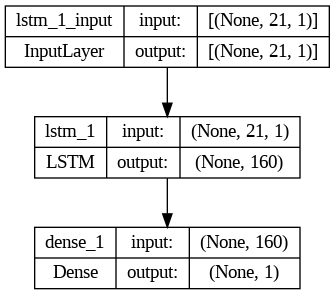

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_7, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_plot/model_LSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

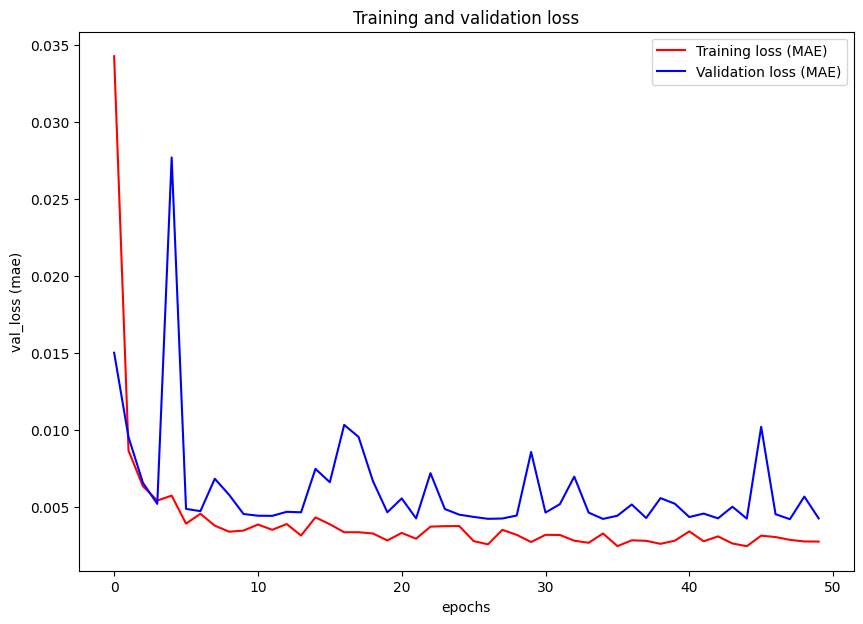

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)



# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_visualization/loss_LSTM_uni.png')



# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_value_per_epoch/loss_LSTM_uni.csv', index=False)


In [ ]:
# mengevaluasi model 7 dari epochs terakhir
model_7.evaluate(test_nikkeiWindows, test_nikkeiLabels)

189/189 [==============================] - 2s 12ms/step - loss: 0.0042


0.004247000906616449

In [ ]:
# mengevaluasi dan load model 7 pada best epoch yang loss mae paling kecil sepanjang training

model_7 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_7_LSTM_univariate")
model_7.evaluate(test_nikkeiWindows, test_nikkeiLabels)


189/189 [==============================] - 3s 15ms/step - loss: 0.0042


0.004196451045572758

In [ ]:
# membuat predicted value berdasarkan model multivariate model_7 yang sudah di train

model_7_preds = tf.squeeze(model_7.predict(test_nikkeiWindows))
model_7_preds



189/189 [==============================] - 5s 23ms/step


<tf.Tensor: shape=(6018,), dtype=float32, numpy=
array([0.43636325, 0.43712845, 0.4431811 , ..., 0.9957619 , 1.0007092 ,
       0.99848604], dtype=float32)>

In [ ]:
model_7_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.43636325, 0.43712845], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_7_preds = scaler_univariate.inverse_transform([model_7_preds])
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([test_nikkeiLabels])

In [ ]:
denormalized_model_7_preds = tf.squeeze(denormalized_model_7_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_7_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_7_preds)

model_7_results

{'mae': 164.30898,
 'mse': 53434.387,
 'rmse': 231.1588,
 'mape': 1.0509645,
 'R-square': 0.9987819959409565}

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

<tf.Tensor: shape=(6018,), dtype=float64, numpy=
array([0.43739572, 0.44280534, 0.44311693, ..., 1.        , 0.99919575,
       0.99812715])>

In [ ]:
test_nikkeiLabels[:]

array([0.43739572, 0.44280534, 0.44311693, ..., 1.        , 0.99919575,
       0.99812715])

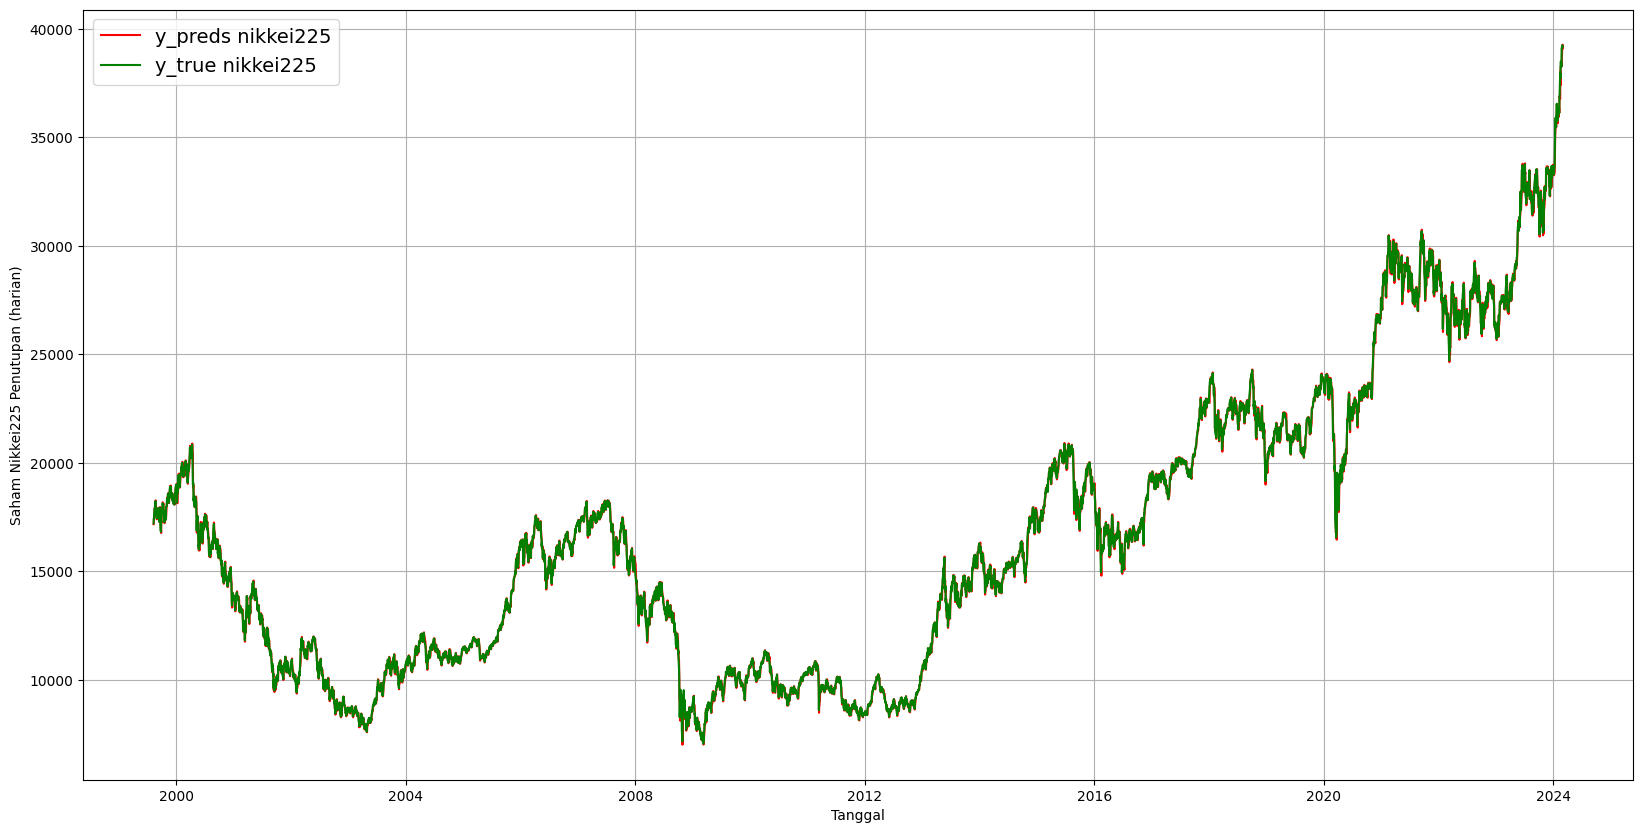

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_7_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_7_plot_prediksi_LSTM_uni.png')


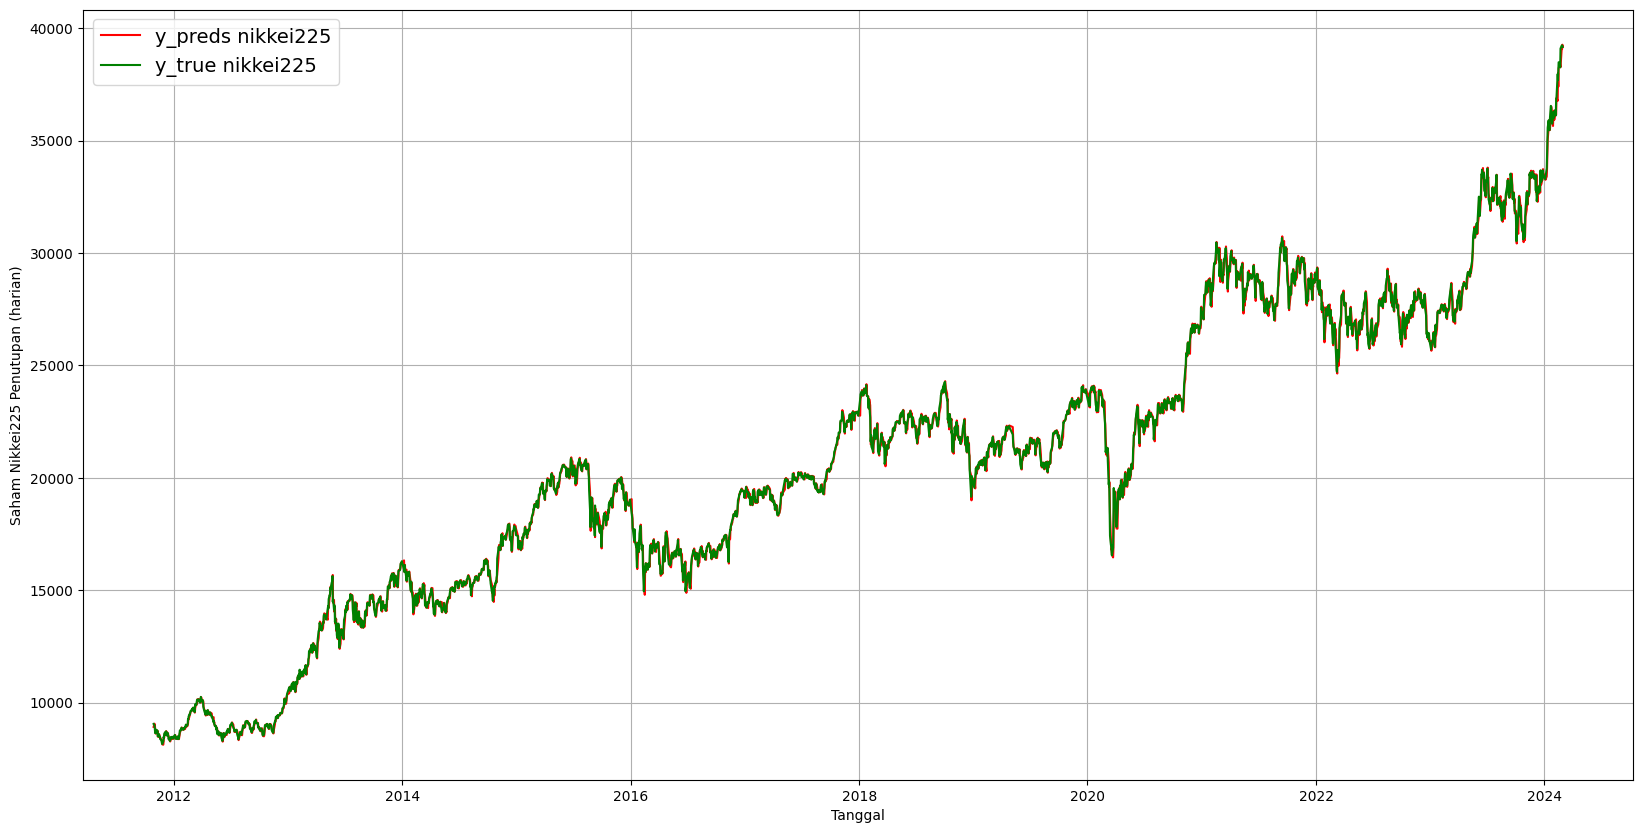

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_7_preds, format = "-", start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", start = 3000, label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_7_plot_prediksi_LSTM_uni_zoomin.png')


simpan model trained ke bentuk h5.

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_7, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_7_LSTM_univariate.h5")


<ipython-input-253-843d508da236>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_7, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_7_LSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_7 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_7_LSTM_univariate.h5")


 # Model 8 : Stacked LSTM univariate

## Tuner builder

In [ ]:
# membuat model LSTM dengan hyperparameter tuning
def model_stackedLSTM_uni_builder(hp):

  tf.random.set_seed(42)
  model_8 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units =  hp.Int('lstm_n_units', min_value=32, max_value=256, step=32),
                              input_shape=(WINDOW_SIZE, 1),
                              return_sequences = True,
                              activation = "relu"),

          #tf.keras.layers.Dropout(0.2, seed=42),
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units_2', min_value=32, max_value=256, step=32),
                              return_sequences = False,
                              activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1)
          ], name = "model_8_stackedLSTM_univariate")


  #compile model 8
  model_8.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_8

In [ ]:
import keras_tuner as kt

tuner_stackedLSTM_uni = kt.Hyperband(model_stackedLSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs',
                     project_name='stackedLSTM_univariate')

## Proses tuning


In [ ]:
tuner_stackedLSTM_uni.search(train_nikkeiWindows,
                             train_nikkeiLabels,
                             epochs=10,
                             validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                             batch_size = 128)

Trial 30 Complete [00h 01m 18s]
val_loss: 0.009473648853600025

Best val_loss So Far: 0.006205792538821697
Total elapsed time: 00h 43m 52s


## Hasil parameter tuning terbaik

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps = tuner_stackedLSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units', "lstm_n_units_2", 'learning_rate']
print('Best tune model stacked LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model stacked LSTM univariate:
lstm_n_units: 224
lstm_n_units_2: 160
learning_rate: 0.01


## Hasil semua parameter tuning

In [ ]:
tuning = ['lstm_n_units', "lstm_n_units_2", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all = tuner_stackedLSTM_uni.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam = pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_best_hyperparameter_models/hp_Stacked_LSTM_uni.csv')
df_hyparam


lstm_n_units  lstm_n_units_2  learning_rate
0            224             160         0.0100
1            128             160         0.0100
2            160             224         0.0010
3            224             160         0.0010
4             64             256         0.0010
5             96              64         0.0010
6            128             192         0.0010
7            224             160         0.0100
8             96              64         0.0010
9             64             256         0.0010
10            32              96         0.0001
11            64              64         0.0010
12           128             192         0.0010
13            64              64         0.0010
14           224             160         0.0100
15           128             160         0.0001
16           160              64         0.0001
17            64             256         0.0010
18           224             256         0.0010
19           192             192         0.0001
20            32             160         0.0010
21           128             224         0.0001
22            32             128         0.0100
23           224             256         0.0010
24            32              32         0.0100
25           192             192         0.0010
26           160             192         0.0010
27           192             192         0.0100
28           224             128         0.0100
29           256             224         0.0010

In [ ]:
tuner_stackedLSTM_uni.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs/stackedLSTM_univariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0016 summary
Hyperparameters:
lstm_n_units: 224
lstm_n_units_2: 160
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.006205792538821697

Trial 0028 summary
Hyperparameters:
lstm_n_units: 128
lstm_n_units_2: 160
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.006804014556109905

Trial 0026 summary
Hyperparameters:
lstm_n_units: 160
lstm_n_units_2: 224
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.00759158143773675

Trial 0027 summary
Hyperparameters:
lstm_n_units: 224
lstm_n_units_2: 160
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.00790964253246

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_8 = tuner_stackedLSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_8 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_8_stackedLSTM_univariate.h5")


In [ ]:

# fit
history = model_8.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_8.name)])

Epoch 1/50
110/110 [==============================] - ETA: 0s - loss: 0.0354
Epoch 1: val_loss improved from inf to 0.00888, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_8_stackedLSTM_univariate
110/110 [==============================] - 32s 270ms/step - loss: 0.0354 - val_loss: 0.0089
Epoch 2/50
110/110 [==============================] - ETA: 0s - loss: 0.0125
Epoch 2: val_loss did not improve from 0.00888
110/110 [==============================] - 26s 237ms/step - loss: 0.0125 - val_loss: 0.0115
Epoch 3/50
110/110 [==============================] - ETA: 0s - loss: 0.0076
Epoch 3: val_loss did not improve from 0.00888
110/110 [==============================] - 26s 235ms/step - loss: 0.0076 - val_loss: 0.0189
Epoch 4/50
110/110 [==============================] - ETA: 0s - loss: 0.0081
Epoch 4: val_loss improved from 0.00888 to 0.00746, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21

visualisasi model shape

In [ ]:
model_8.summary()

Model: "model_8_stackedLSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 21, 224)           202496    
                                                                 
 lstm_3 (LSTM)               (None, 160)               246400    
                                                                 
 dense_1 (Dense)             (None, 1)                 161       
                                                                 
Total params: 449057 (1.71 MB)
Trainable params: 449057 (1.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


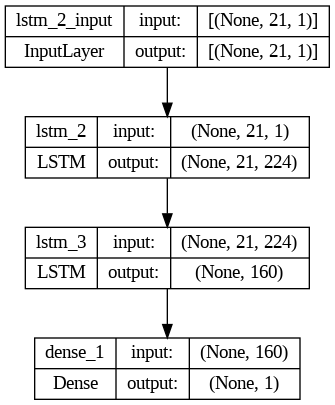

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_8, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_plot/model_stackedLSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

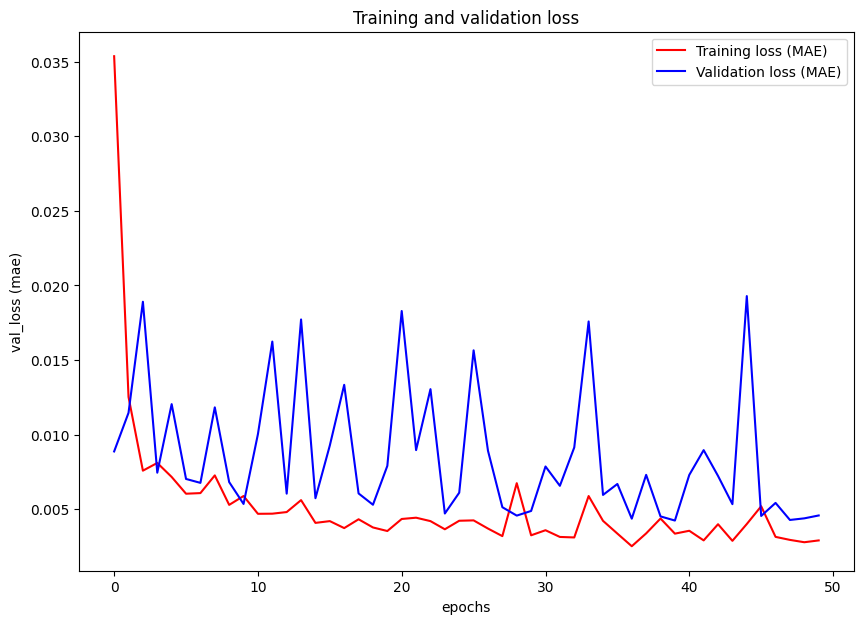

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_visualization/loss_stackedLSTM_uni.png')

# Create a DataFrame from loss and val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan visualisasi loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_value_per_epoch/loss_stackedLSTM_uni.csv', index=False)


In [ ]:
# mengevaluasi model 8 dari epochs terakhir
model_8.evaluate(test_nikkeiWindows, test_nikkeiLabels)

189/189 [==============================] - 5s 29ms/step - loss: 0.0046


0.004591768607497215

In [ ]:
# mengevaluasi dan load model 8 pada best epoch yang loss mae paling kecil sepanjang training

model_8 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_8_stackedLSTM_univariate")
model_8.evaluate(test_nikkeiWindows, test_nikkeiLabels)



189/189 [==============================] - 6s 30ms/step - loss: 0.0043


0.004251603968441486

In [ ]:
# membuat predicted value berdasarkan model multivariate model_8 yang sudah di train

model_8_preds = tf.squeeze(model_8.predict(test_nikkeiWindows))
model_8_preds



189/189 [==============================] - 8s 39ms/step


<tf.Tensor: shape=(6018,), dtype=float32, numpy=
array([0.43698168, 0.43786126, 0.44357753, ..., 0.9990728 , 1.0076549 ,
       1.0012134 ], dtype=float32)>

In [ ]:
model_8_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.43698168, 0.43786126], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_8_preds = scaler_univariate.inverse_transform([model_8_preds])
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([test_nikkeiLabels])

In [ ]:
denormalized_model_8_preds = tf.squeeze(denormalized_model_8_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_8_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_8_preds)

model_8_results

{'mae': 166.46846,
 'mse': 55269.164,
 'rmse': 235.09395,
 'mape': 1.0637858,
 'R-square': 0.9987401733458938}

In [ ]:
tf.squeeze(test_nikkeiLabels)

<tf.Tensor: shape=(6018,), dtype=float64, numpy=
array([0.43739572, 0.44280534, 0.44311693, ..., 1.        , 0.99919575,
       0.99812715])>

In [ ]:
test_nikkeiLabels[:]

array([0.43739572, 0.44280534, 0.44311693, ..., 1.        , 0.99919575,
       0.99812715])

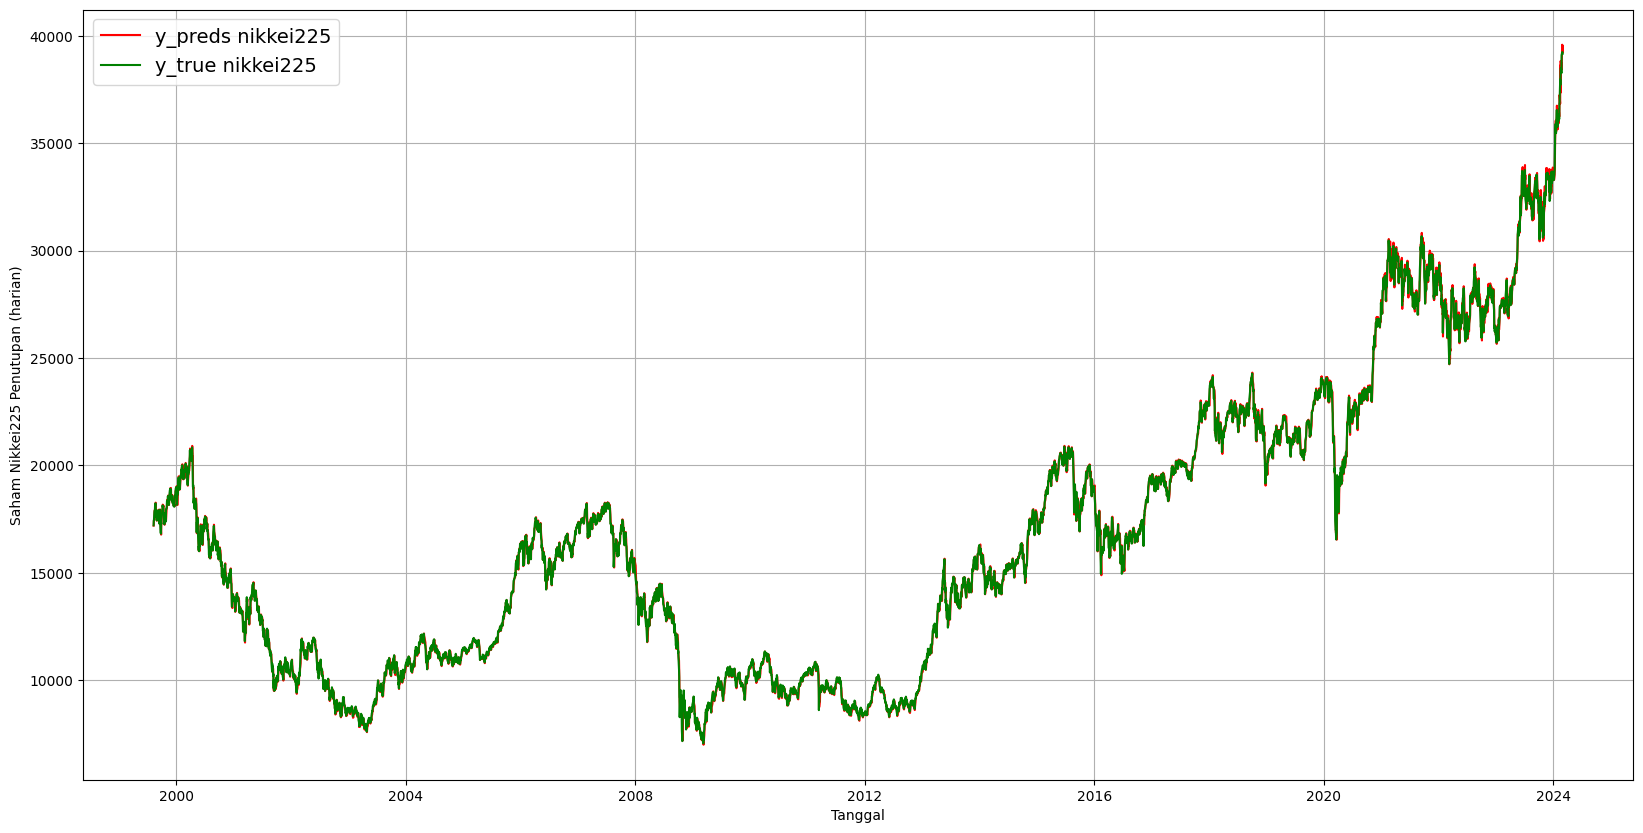

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_8_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_8_plot_prediksi_stackedLSTM_uni.png')


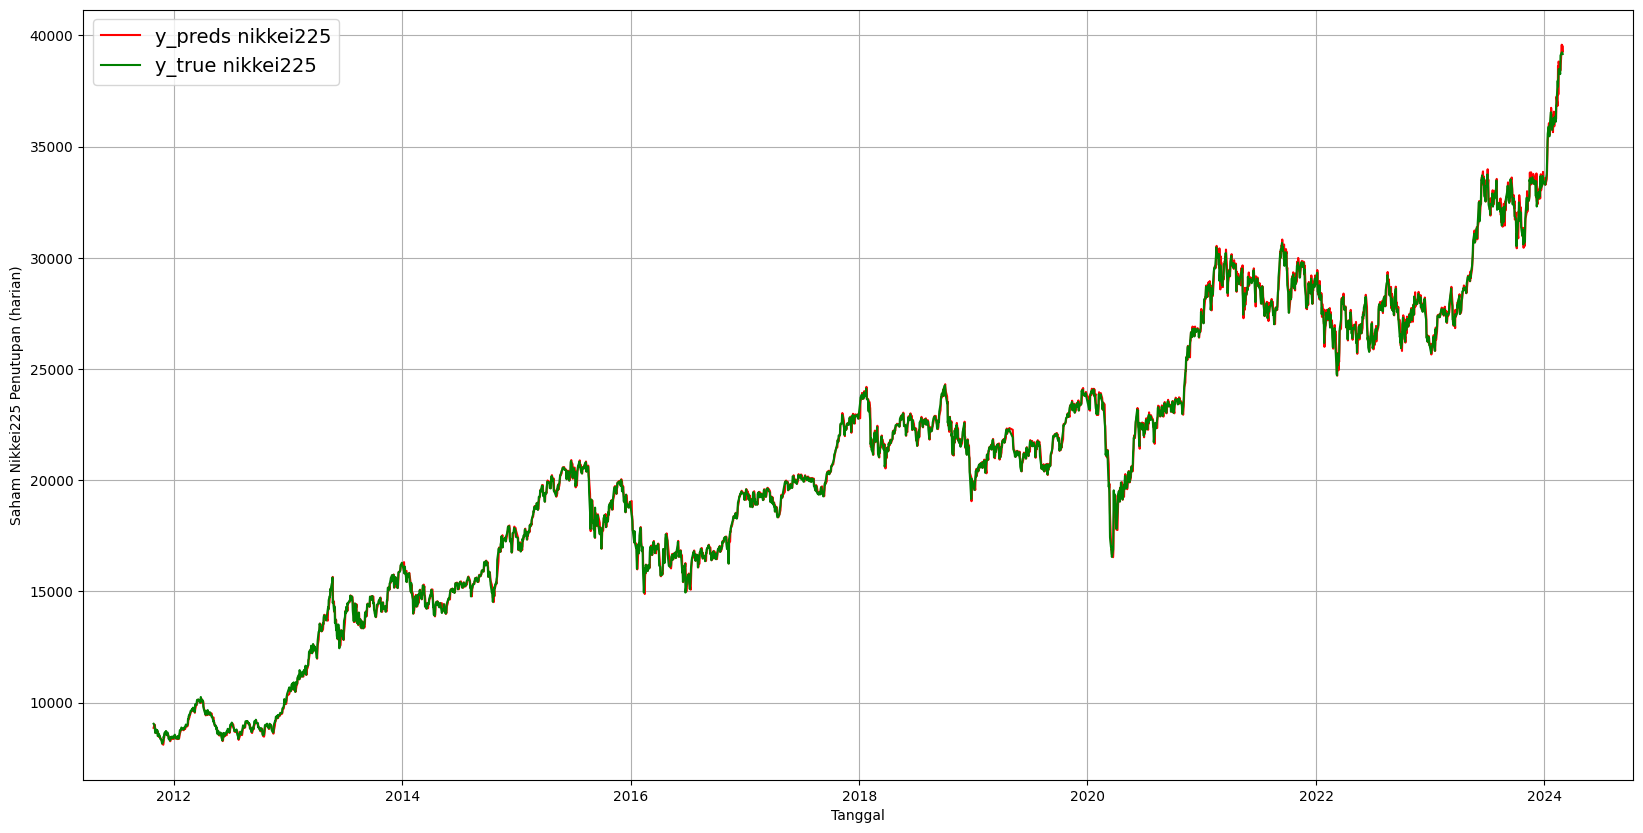

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_8_preds, format = "-",start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-",start = 3000, label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_8_plot_prediksi_stackedLSTM_uni_zoomin.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_8, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_8_stackedLSTM_univariate.h5")


<ipython-input-277-e8027d28b924>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_8, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_8_stackedLSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_8 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_8_stackedLSTM_univariate.h5")


# Model 9: Bidirectional LSTM Univariate

In [ ]:
train_nikkeiWindows.shape

(14039, 21)

In [ ]:
test_nikkeiLabels.shape

(6018,)

## Tuner Builder

In [ ]:
def model_bidirectional_LSTM_uni_builder(hp):

  tf.random.set_seed(42)
  model_9 = tf.keras.models.Sequential([
          #tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
          tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), # ini lambda layer sumberny dari bangkit C4W3 lab1
                        input_shape=[WINDOW_SIZE]),

          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = hp.Int('bi_lstm_n_units', min_value=32, max_value=256, step=32),
                                                             input_shape=(WINDOW_SIZE, 1),
                                                             return_sequences = False,
                                                             activation = "relu")),
          #tf.keras.layers.Dropout(0.2, seed=42),
          #tf.keras.layers.LSTM(128, return_sequences = False, activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1)
          ], name = "model_9_bidirectionalLSTM_univariate")


  #compile model 2
  model_9.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_9

In [ ]:
import keras_tuner as kt

tuner_bi_LSTM_uni = kt.Hyperband(model_bidirectional_LSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs',
                     project_name='bi_LSTM_univariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs/bi_LSTM_univariate/tuner0.json


## Proses tuning


In [ ]:
tuner_bi_LSTM_uni.search(train_nikkeiWindows,
                         train_nikkeiLabels,
                         epochs=10,
                         validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                         batch_size = 128)

## Hasil parameter tuning terbaik

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_bi_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ["bi_lstm_n_units", 'learning_rate']
print('Best tune model bidirectional LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model bidirectional LSTM univariate:
bi_lstm_n_units: 160
learning_rate: 0.01


## Hasil semua parameter tuning

In [ ]:
tuning = ["bi_lstm_n_units", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hp_all=tuner_bi_LSTM_uni.get_best_hyperparameters(num_trials=30)
for hps in hp_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam= pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_best_hyperparameter_models/hp_bi_LSTM_uni.csv')
df_hyparam


bi_lstm_n_units  learning_rate
0               160         0.0100
1               224         0.0100
2                32         0.0100
3               224         0.0100
4               160         0.0100
5               224         0.0010
6               160         0.0010
7               224         0.0010
8                64         0.0001
9               256         0.0100
10              160         0.0010
11               96         0.0010
12              256         0.0010
13              128         0.0010
14              160         0.0001
15              128         0.0100
16              224         0.0100
17              128         0.0001
18              224         0.0001
19              256         0.0100
20              128         0.0010
21              160         0.0100
22              192         0.0010
23               32         0.0010
24              192         0.0001
25              192         0.0100
26               64         0.0010
27               96         0.0001
28              256         0.0001
29               64         0.0100

In [ ]:
tuner_bi_LSTM_uni.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs/bi_LSTM_univariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0017 summary
Hyperparameters:
bi_lstm_n_units: 160
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0015
Score: 0.004828184377402067

Trial 0016 summary
Hyperparameters:
bi_lstm_n_units: 224
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.00483050849288702

Trial 0026 summary
Hyperparameters:
bi_lstm_n_units: 32
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005692958831787109

Trial 0012 summary
Hyperparameters:
bi_lstm_n_units: 224
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0007
Score: 0.005898167844861746

Trial 0015 summary
Hyperpara

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_9 = tuner_bi_LSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_9 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_9_bidirectionalLSTM_univariate.h5")


In [ ]:

# fit
history = model_9.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_9.name)])

Epoch 1/50
110/110 [==============================] - ETA: 0s - loss: 0.0237
Epoch 1: val_loss improved from inf to 0.01167, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_9_bidirectionalLSTM_univariate
110/110 [==============================] - 23s 189ms/step - loss: 0.0237 - val_loss: 0.0117
Epoch 2/50
110/110 [==============================] - ETA: 0s - loss: 0.0063
Epoch 2: val_loss did not improve from 0.01167
110/110 [==============================] - 16s 141ms/step - loss: 0.0063 - val_loss: 0.0152
Epoch 3/50
110/110 [==============================] - ETA: 0s - loss: 0.0070
Epoch 3: val_loss improved from 0.01167 to 0.00727, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_9_bidirectionalLSTM_univariate
110/110 [==============================] - 20s 185ms/step - loss: 0.0070 - val_loss: 0.0073
Epoch 4/50
110/110 [==============================] - ETA:

visualisasi model shape

In [ ]:
model_9.summary()

Model: "model_9_bidirectionalLSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 21, 1)             0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 320)               207360    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 321       
                                                                 
Total params: 207681 (811.25 KB)
Trainable params: 207681 (811.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


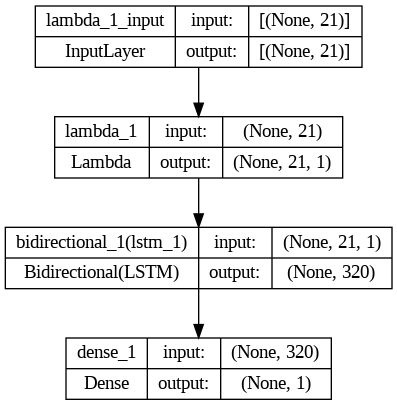

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_9, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_plot/model_biLSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

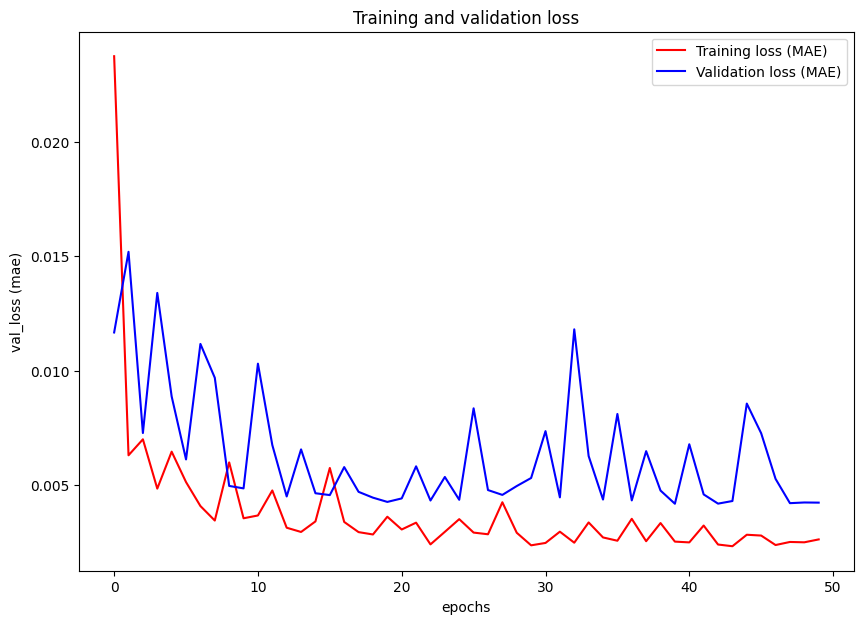

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_visualization/loss_bidirectional_LSTM_uni.png')



# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_value_per_epoch/loss_bidirectional_LSTM_uni.csv', index=False)


In [ ]:
# mengevaluasi model 9 dari epochs terakhir
model_9.evaluate(test_nikkeiWindows, test_nikkeiLabels)

189/189 [==============================] - 5s 24ms/step - loss: 0.0042


0.004224299918860197

In [ ]:
# mengevaluasi dan load model 9 pada best epoch yang loss mae paling kecil sepanjang training

model_9 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_9_bidirectionalLSTM_univariate")
model_9.evaluate(test_nikkeiWindows, test_nikkeiLabels)


189/189 [==============================] - 4s 18ms/step - loss: 0.0042


0.004176132846623659

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_9_preds = tf.squeeze(model_9.predict(test_nikkeiWindows))
model_9_preds



189/189 [==============================] - 6s 29ms/step


<tf.Tensor: shape=(6018,), dtype=float32, numpy=
array([0.4373552 , 0.4378973 , 0.44356868, ..., 0.9949577 , 1.00068   ,
       0.99724615], dtype=float32)>

In [ ]:
model_9_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.4373552, 0.4378973], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_9_preds = scaler_univariate.inverse_transform([model_9_preds])
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([test_nikkeiLabels])

In [ ]:
denormalized_model_9_preds = tf.squeeze(denormalized_model_9_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_9_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_9_preds)

model_9_results

{'mae': 163.51347,
 'mse': 53207.797,
 'rmse': 230.66815,
 'mape': 1.0427575,
 'R-square': 0.9987871608942376}

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

<tf.Tensor: shape=(6018,), dtype=float64, numpy=
array([0.43739572, 0.44280534, 0.44311693, ..., 1.        , 0.99919575,
       0.99812715])>

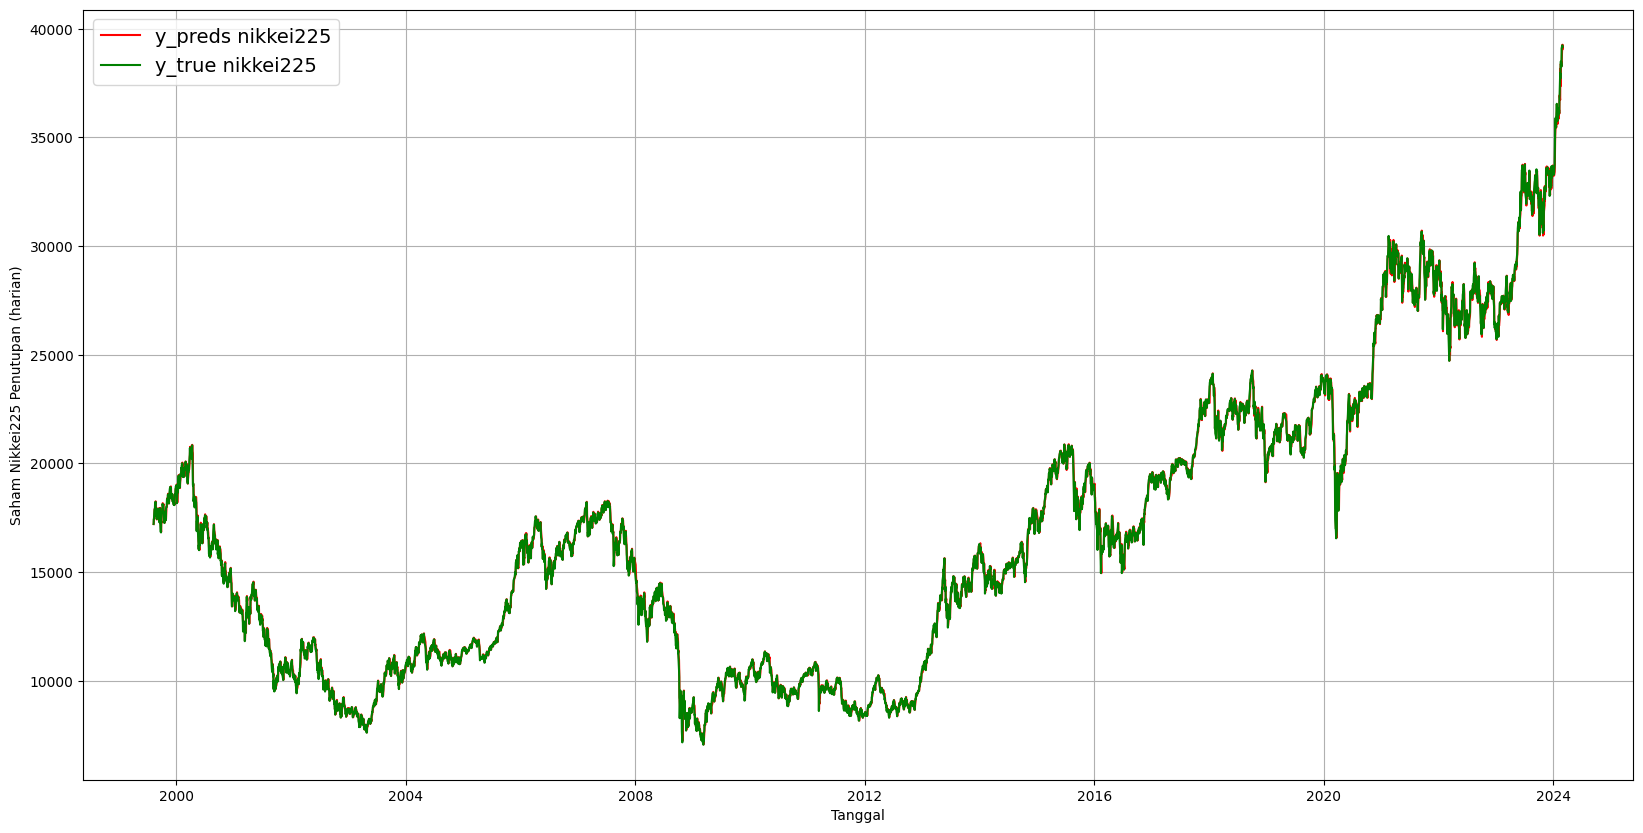

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_9_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_9_plot_prediksi_biLSTM_uni.png')


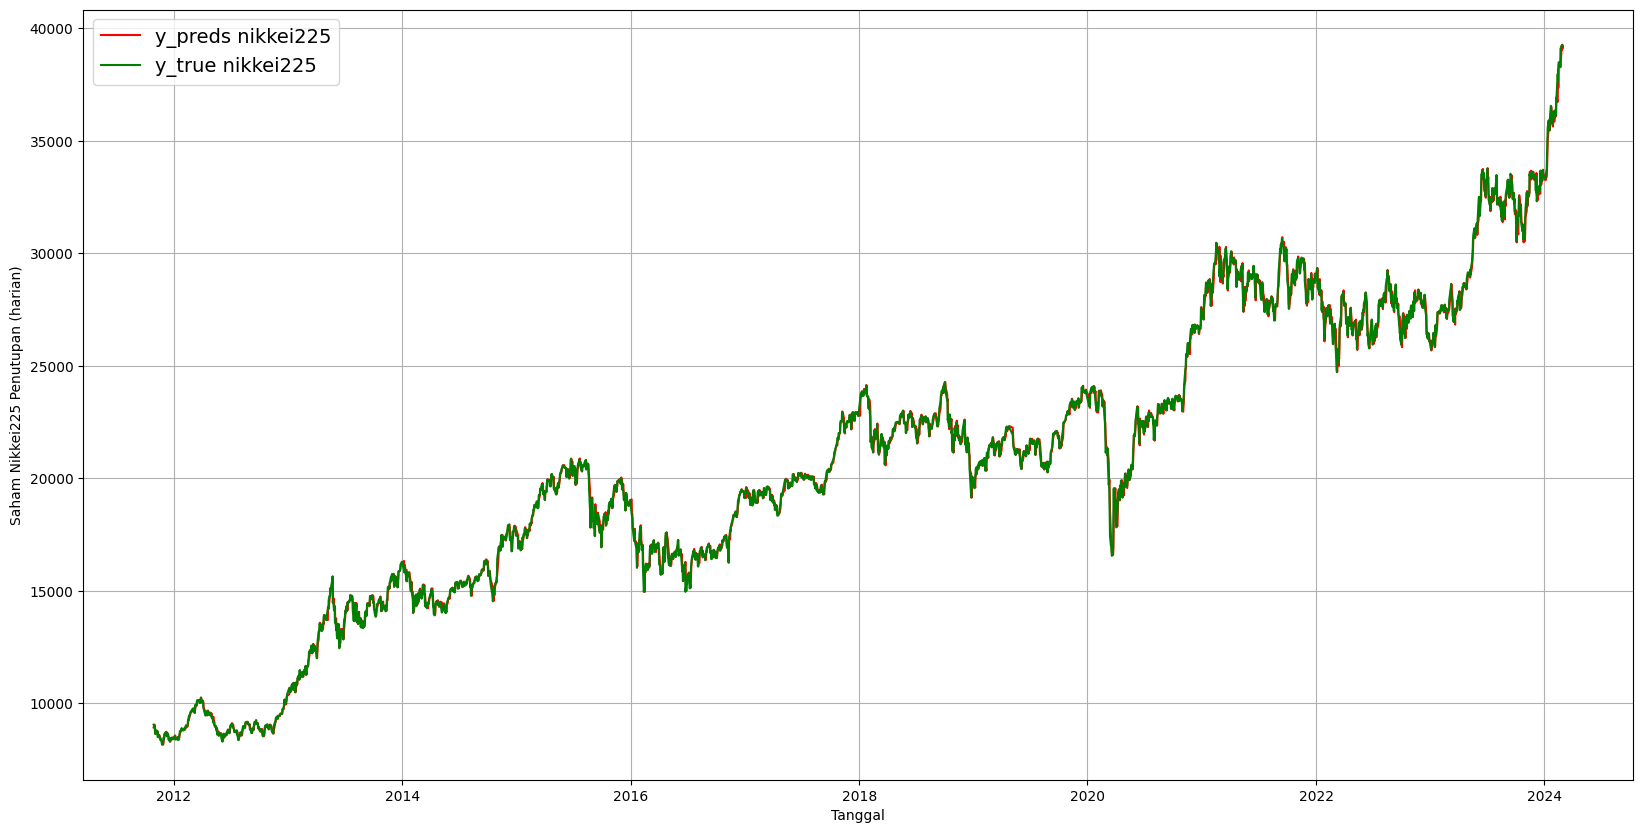

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_9_preds, format = "-", start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-",start = 3000,  label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_9_plot_prediksi_biLSTM_uni_zoomin.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_9, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_9_bidirectionalLSTM_univariate.h5")



<ipython-input-302-f490b11add1f>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_9, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_9_bidirectionalLSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_9 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_9_bidirectionalLSTM_univariate.h5")


# Model 10: CNN-LSTM Univariate

## Tuner Builder

In [ ]:
#create Conv1D model
def model_CNN_LSTM_uni_builder(hp):
  tf.random.set_seed(42)
  model_10 = tf.keras.models.Sequential([
      #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      tf.keras.layers.Conv1D(filters=hp.Int('Conv1D_n_filters', min_value=32, max_value=256, step=32),
                             kernel_size=hp.Int('Conv1_kernel_size', min_value=5, max_value=10, step=1),
                             strides=1,
                             padding="causal",
                             activation="relu",
                             input_shape=[WINDOW_SIZE, 1]),

      tf.keras.layers.LSTM(units = hp.Int('LSTM_n_units', min_value=32, max_value=256, step=32),
                           return_sequences=False,
                           activation = "relu"),

      tf.keras.layers.Dense(1),
      #filters adalah jumlah hidden unit dalam layers tersebut
      # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
      # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
  ], name = "model_10_CNN-LSTM_univariate")

  #compile model 10
  model_10.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_10

In [ ]:
import keras_tuner as kt

tuner_CNN_LSTM_uni = kt.Hyperband(model_CNN_LSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs',
                     project_name='CNN_LSTM_univariate')


## Proses tuning


In [ ]:
tuner_CNN_LSTM_uni.search(train_nikkeiWindows,
                          train_nikkeiLabels,
                          epochs=10,
                          validation_data=(test_nikkeiWindows, test_nikkeiLabels),
                          batch_size = 128)

Trial 30 Complete [00h 01m 09s]
val_loss: 0.006384706124663353

Best val_loss So Far: 0.005288186948746443
Total elapsed time: 00h 32m 14s


## Hasil parameter tuning terbaik

In [ ]:
# mengeluarkan hyperparameter optimal
best_hps=tuner_CNN_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['Conv1D_n_filters', 'Conv1_kernel_size', "LSTM_n_units", 'learning_rate']
print('Best tune model bidirectional LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model bidirectional LSTM univariate:
Conv1D_n_filters: 64
Conv1_kernel_size: 5
LSTM_n_units: 224
learning_rate: 0.001


## Hasil semua parameter tuning

In [ ]:
tuning = ['Conv1D_n_filters', 'Conv1_kernel_size', "LSTM_n_units", 'learning_rate']
hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

hps_all=tuner_CNN_LSTM_uni.get_best_hyperparameters(num_trials=30)
for hps in hps_all:
  for t in tuning:
    hps_dict[t].append(hps.get(t))

df_hyparam= pd.DataFrame(hps_dict)
df_hyparam.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_best_hyperparameter_models/hp_CNN_LSTM_uni.csv')
df_hyparam



Conv1D_n_filters  Conv1_kernel_size  LSTM_n_units  learning_rate
0                 64                  5           224         0.0010
1                256                  9           192         0.0100
2                192                  9            32         0.0100
3                256                  6           128         0.0010
4                224                  5           224         0.0100
5                224                  5           224         0.0100
6                224                  5           224         0.0100
7                 32                  7            96         0.0100
8                256                  7            64         0.0100
9                256                  9           192         0.0100
10                32                  5           192         0.0100
11               192                  9            32         0.0100
12               160                  9           192         0.0010
13               256                  7            64         0.0100
14                96                  5           160         0.0010
15               160                  9           192         0.0010
16               256                  9           192         0.0100
17                96                  5           160         0.0010
18                32                 10           128         0.0100
19               256                  9           160         0.0001
20               256                  5            96         0.0001
21                64                  9           160         0.0100
22                96                  8            32         0.0001
23               128                  6           224         0.0001
24                32                  5           160         0.0100
25               256                  8           256         0.0001
26               256                 10            64         0.0001
27                96                  8           160         0.0001
28               224                  9           256         0.0001
29                32                  9           192         0.0100

In [ ]:
tuner_CNN_LSTM_uni.results_summary(num_trials=30)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_tuning_logs/CNN_LSTM_univariate
Showing 30 best trials
Objective(name="val_loss", direction="min")

Trial 0026 summary
Hyperparameters:
Conv1D_n_filters: 64
Conv1_kernel_size: 5
LSTM_n_units: 224
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005288186948746443

Trial 0017 summary
Hyperparameters:
Conv1D_n_filters: 256
Conv1_kernel_size: 9
LSTM_n_units: 192
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.005785767920315266

Trial 0025 summary
Hyperparameters:
Conv1D_n_filters: 192
Conv1_kernel_size: 9
LSTM_n_units: 32
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0022
Score: 0.006060292478650808

Trial 0028 summary
Hyperparameters:
Conv1D_n_filters: 256
Conv1_kernel_size: 6
LSTM_n_units: 128
learnin

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_10 = tuner_CNN_LSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_10 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_10_CNN-LSTM_univariate.h5")



In [ ]:

# fit
history = model_10.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_10.name)])

Epoch 1/50
110/110 [==============================] - ETA: 0s - loss: 0.0134
Epoch 1: val_loss improved from inf to 0.01029, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_10_CNN-LSTM_univariate
110/110 [==============================] - 23s 187ms/step - loss: 0.0134 - val_loss: 0.0103
Epoch 2/50
110/110 [==============================] - ETA: 0s - loss: 0.0045
Epoch 2: val_loss did not improve from 0.01029
110/110 [==============================] - 16s 146ms/step - loss: 0.0045 - val_loss: 0.0107
Epoch 3/50
110/110 [==============================] - ETA: 0s - loss: 0.0041
Epoch 3: val_loss improved from 0.01029 to 0.00721, saving model to /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_10_CNN-LSTM_univariate
110/110 [==============================] - 20s 187ms/step - loss: 0.0041 - val_loss: 0.0072
Epoch 4/50
110/110 [==============================] - ETA: 0s - loss: 0.00

visualisasi model shape

In [ ]:
model_10.summary()

Model: "model_10_CNN-LSTM_univariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 21, 64)            384       
                                                                 
 lstm_1 (LSTM)               (None, 224)               258944    
                                                                 
 dense_1 (Dense)             (None, 1)                 225       
                                                                 
Total params: 259553 (1013.88 KB)
Trainable params: 259553 (1013.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


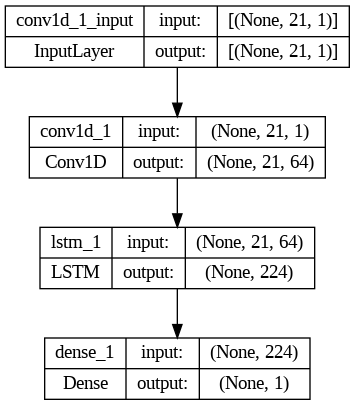

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_10, to_file='/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_plot/model_CNN-LSTM_uni_shape.png', show_shapes=True, show_layer_names=True)


visualisasi loss setiap epoch

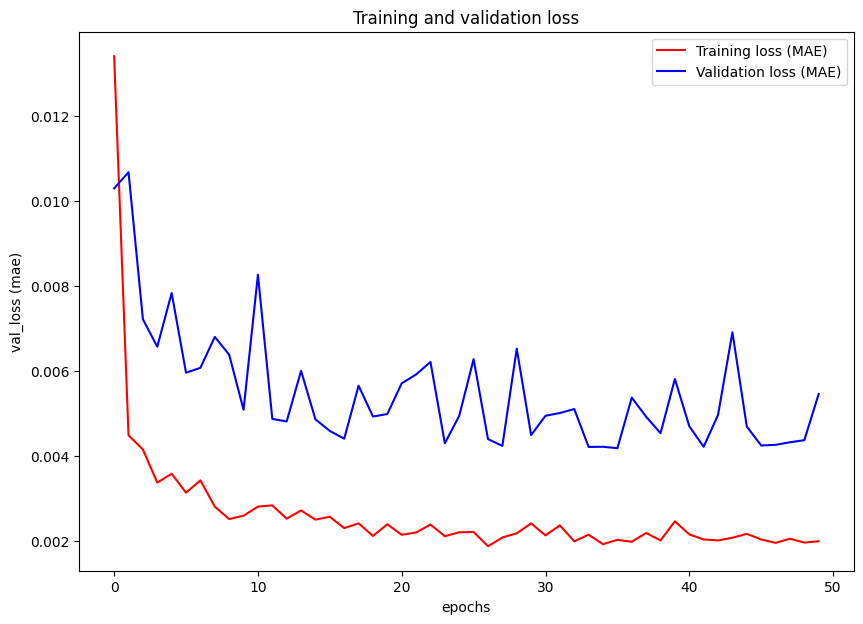

In [ ]:
#-----------------------------------------------------------
# berdasarkan hasil training model, variabel history memiliki informasi tentang loss dan val_loss setiap epoch training
#
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) #  keterangan jumlah epochs
#------------------------------------------------
# Visualisasikan training dan validation accuracy setiap epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.ylabel("val_loss (mae)")
plt.xlabel("epochs")
plt.legend(loc=0)



# simpan visualisasi loss per epoch menjadi image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_visualization/loss_CNN-LSTM_uni.png')


# Membuat DataFrame loss dan val_loss
df_loss = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# simpan value loss dan validation loss per epoch menjadi CSV file
df_loss.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_loss_value_per_epoch/loss_CNN-LSTM_uni.csv', index=False)


In [ ]:
# mengevaluasi model 9 dari epochs terakhir
model_10.evaluate(test_nikkeiWindows, test_nikkeiLabels)

189/189 [==============================] - 3s 17ms/step - loss: 0.0055


0.005453009158372879

In [ ]:
# mengevaluasi dan load model 9 pada best epoch yang loss mae paling kecil sepanjang training

model_10= tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_model_best_epoch/model_10_CNN-LSTM_univariate")
model_10.evaluate(test_nikkeiWindows, test_nikkeiLabels)


189/189 [==============================] - 4s 16ms/step - loss: 0.0042


0.004176171496510506

In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_10_preds = tf.squeeze(model_10.predict(test_nikkeiWindows))
model_10_preds



189/189 [==============================] - 5s 21ms/step


<tf.Tensor: shape=(6018,), dtype=float32, numpy=
array([0.4382423 , 0.4384069 , 0.44322857, ..., 0.99728894, 1.0031385 ,
       0.9990934 ], dtype=float32)>

In [ ]:
model_10_preds[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.4382423, 0.4384069], dtype=float32)>

## Denormalisasi nilai output prediksi dan test_labels

In [ ]:
denormalized_model_10_preds = scaler_univariate.inverse_transform([model_10_preds])
denormalized_test_nikkeiLabels = scaler_univariate.inverse_transform([test_nikkeiLabels])

In [ ]:
denormalized_model_10_preds = tf.squeeze(denormalized_model_10_preds)
denormalized_test_nikkeiLabels = tf.squeeze(denormalized_test_nikkeiLabels)

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_10_results = evaluate_preds(y_true = denormalized_test_nikkeiLabels,
                                 y_pred = denormalized_model_10_preds)

model_10_results

{'mae': 163.51494,
 'mse': 53158.9,
 'rmse': 230.56213,
 'mape': 1.045966,
 'R-square': 0.9987882755130041}

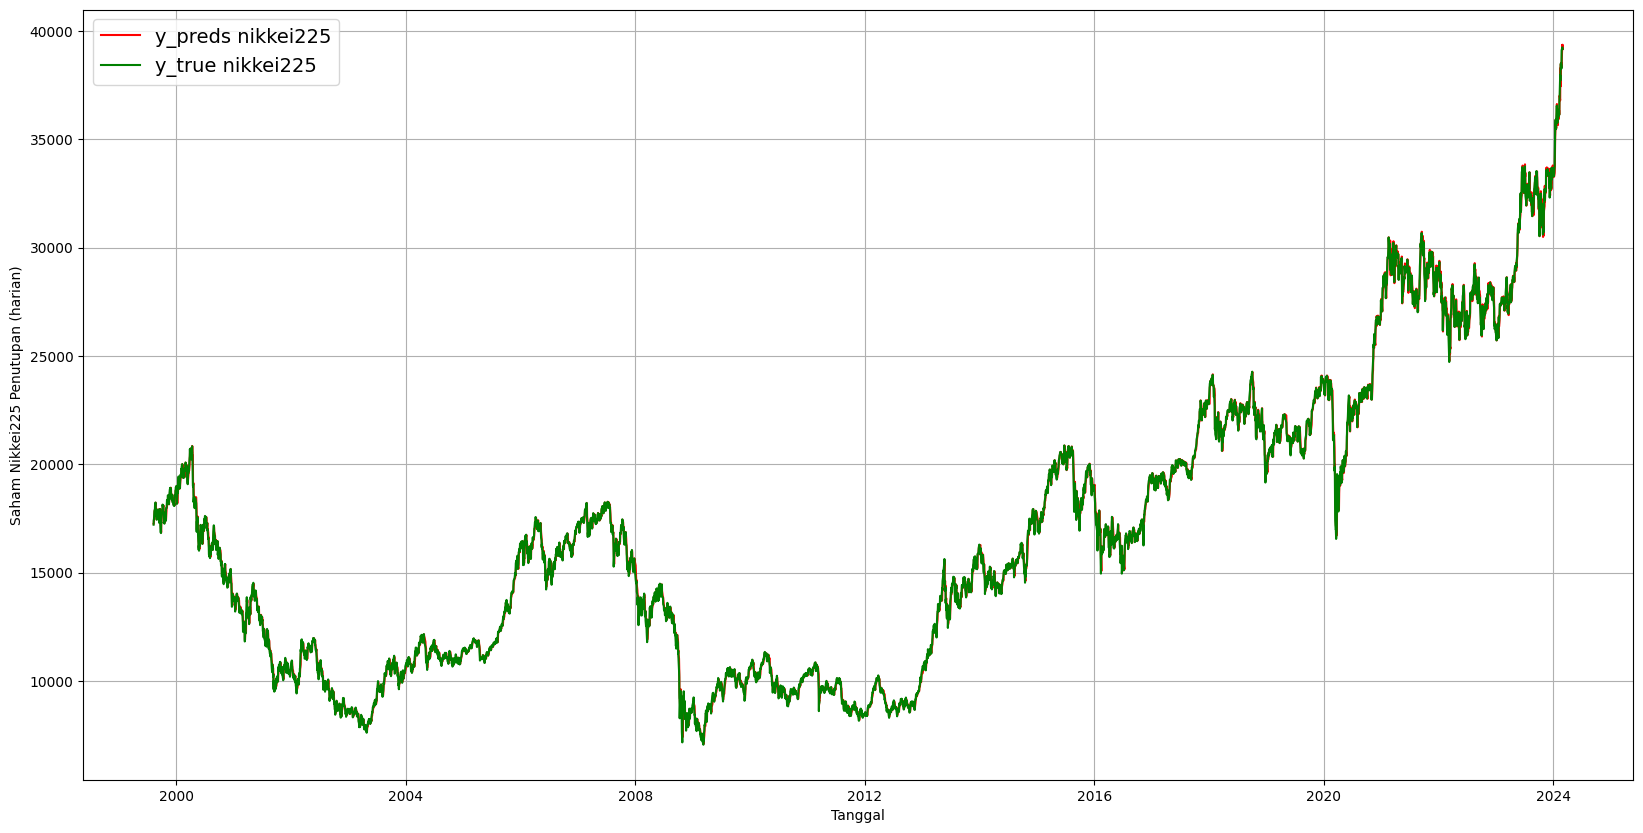

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_10_preds, format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_10_plot_prediksi_CNN-LSTM_uni.png')


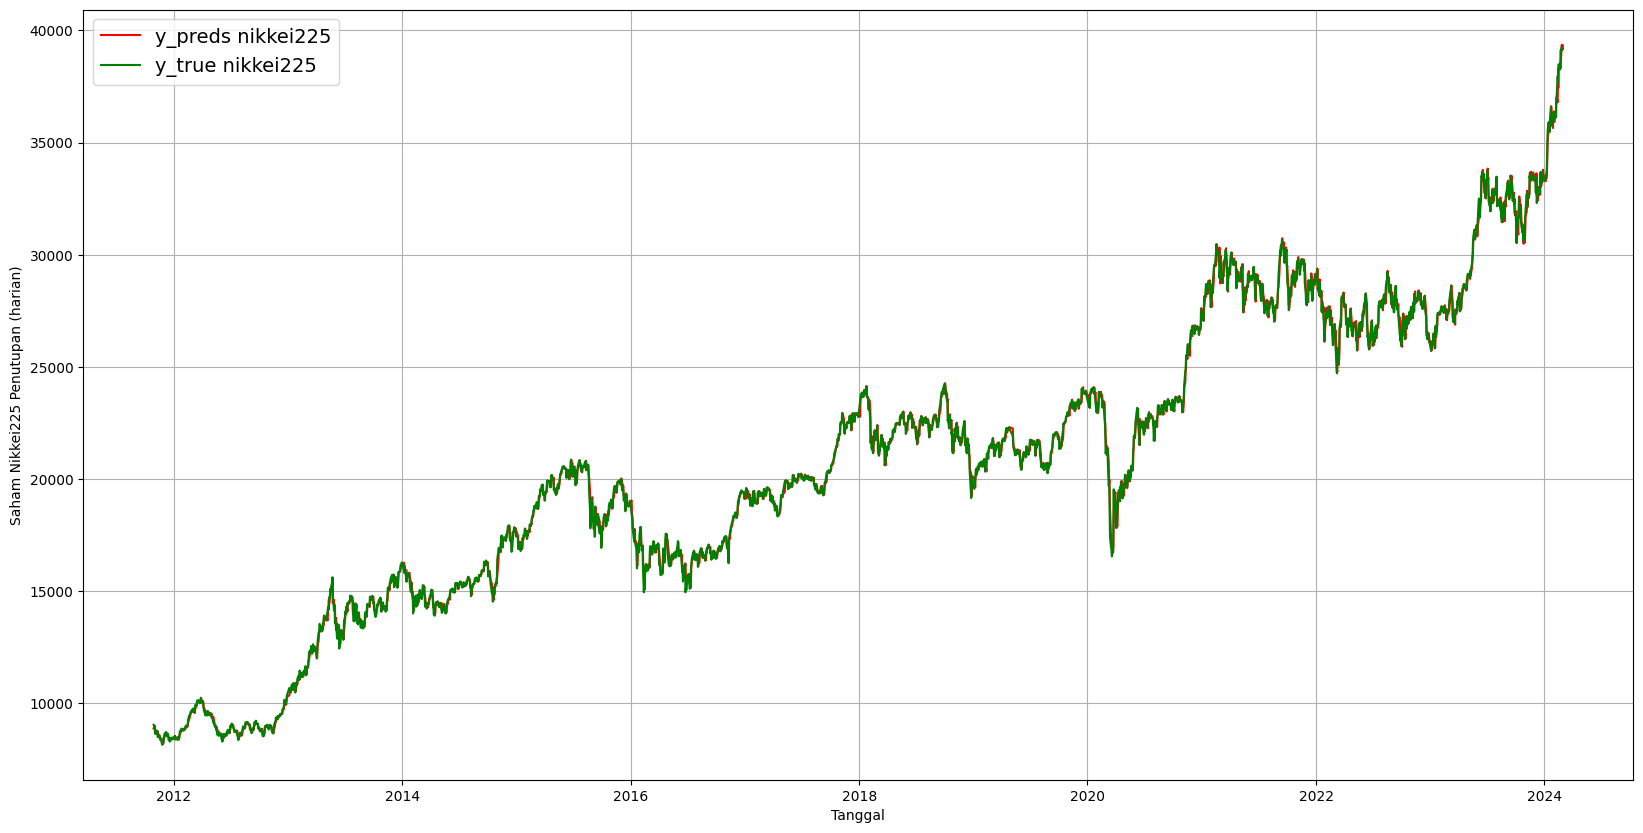

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_model_10_preds, format = "-", start = 3000, label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = denormalized_test_nikkeiLabels, format = "-", start = 3000, label = "y_true nikkei225", color = 'g')

# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_visualisasi_prediksi_time_series/model_10_plot_prediksi_CNN-LSTM_uni_zoomin.png')


simpan model trained ke bentuk .h5

In [ ]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_10, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_10_CNN-LSTM_univariate.h5")



<ipython-input-323-a96ff14092be>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_10, "/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_10_CNN-LSTM_univariate.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_10 = load_model("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_saved_models/model_10_CNN-LSTM_univariate.h5")



# visualisasi hasil evaluasi metrik nilai ternormalisasi

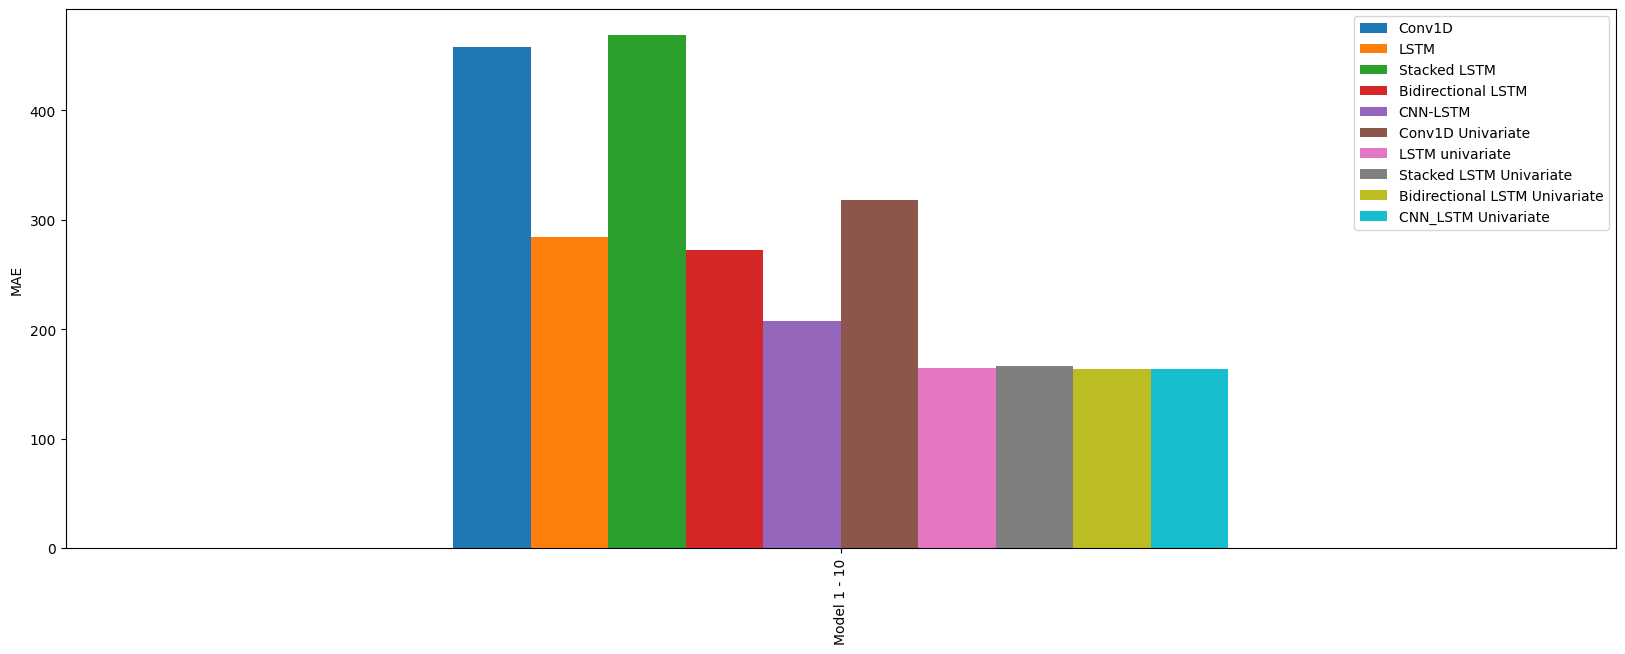

In [ ]:

# membuat dataframe

df = pd.DataFrame({
              "Conv1D": model_1_results["mae"],
              "LSTM": model_2_results["mae"],
              "Stacked LSTM" : model_3_results["mae"],
              "Bidirectional LSTM" : model_4_results["mae"],
              "CNN-LSTM": model_5_results["mae"],
              "Conv1D Univariate" : model_6_results["mae"],
              "LSTM univariate" : model_7_results["mae"],
              "Stacked LSTM Univariate" : model_8_results["mae"],
              "Bidirectional LSTM Univariate" : model_9_results["mae"],
              "CNN_LSTM Univariate" : model_10_results["mae"]},
             index = ["Model 1 - 10"])

# representasi dengan bar chart
ax = df.plot(figsize=(20, 7), kind="bar")
ax.set_ylabel("MAE")

plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_evaluation_metrics/hasil_denormalisasi/MAE_visualization.png")

plt.show()

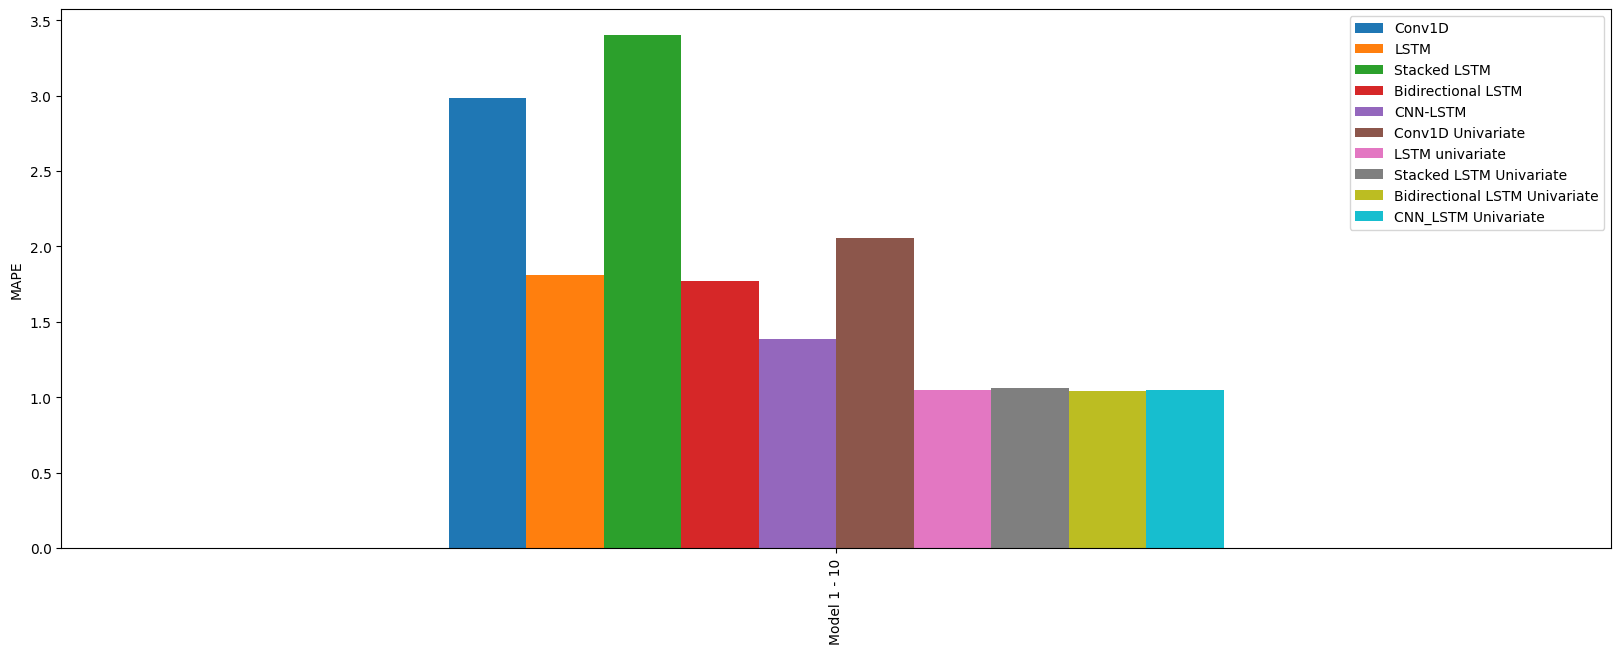

In [ ]:

# membuat dataframe

df = pd.DataFrame({
              "Conv1D": model_1_results["mape"],
              "LSTM": model_2_results["mape"],
              "Stacked LSTM" : model_3_results["mape"],
              "Bidirectional LSTM" : model_4_results["mape"],
              "CNN-LSTM": model_5_results["mape"],
              "Conv1D Univariate" : model_6_results["mape"],
              "LSTM univariate" : model_7_results["mape"],
              "Stacked LSTM Univariate" : model_8_results["mape"],
              "Bidirectional LSTM Univariate" : model_9_results["mape"],
              "CNN_LSTM Univariate" : model_10_results["mape"]},
             index = ["Model 1 - 10"])

# representasi dengan bar chart
ax = df.plot(figsize=(20, 7), kind="bar")
ax.set_ylabel("MAPE")

plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_evaluation_metrics/hasil_denormalisasi/MAPE_visualization.png")

plt.show()

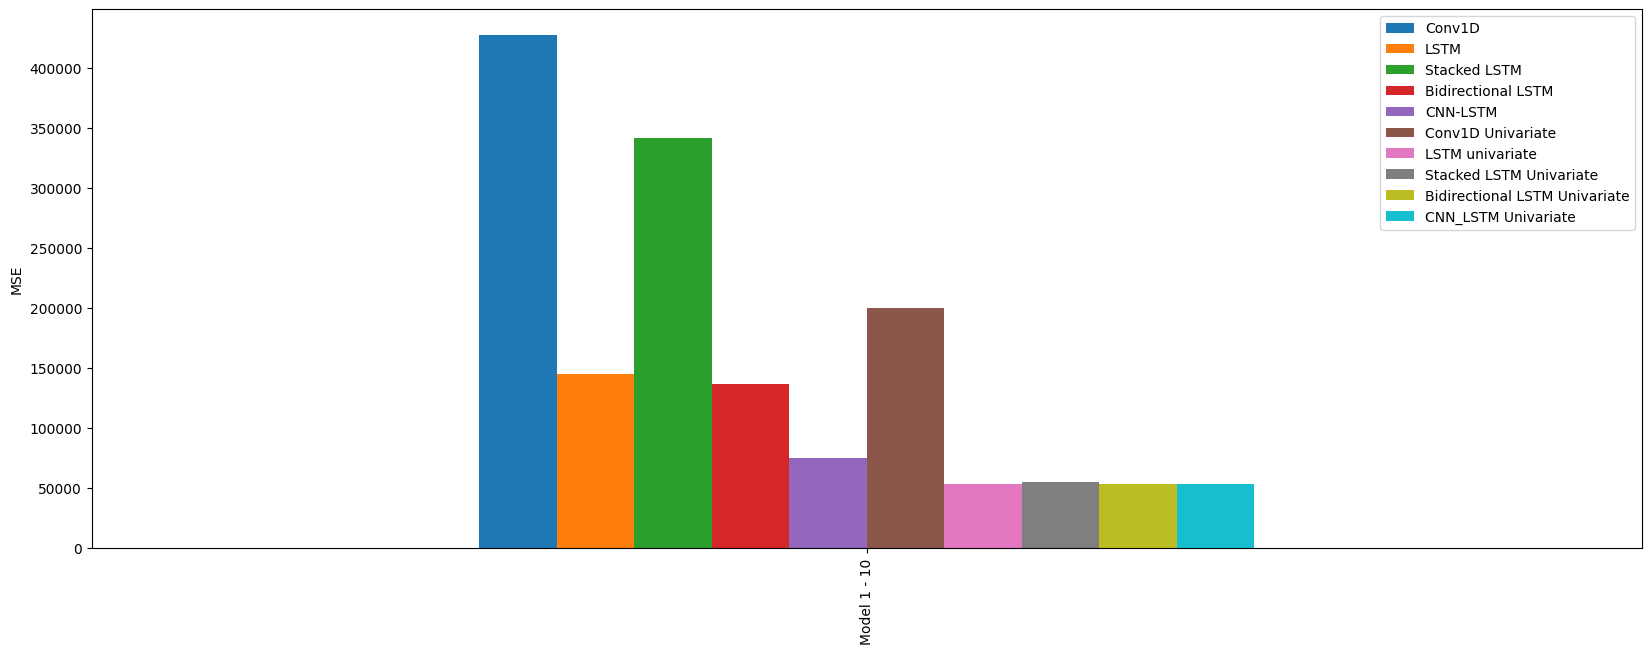

In [ ]:

# membuat dataframe

df = pd.DataFrame({
              "Conv1D": model_1_results["mse"],
              "LSTM": model_2_results["mse"],
              "Stacked LSTM" : model_3_results["mse"],
              "Bidirectional LSTM" : model_4_results["mse"],
              "CNN-LSTM": model_5_results["mse"],
              "Conv1D Univariate" : model_6_results["mse"],
              "LSTM univariate" : model_7_results["mse"],
              "Stacked LSTM Univariate" : model_8_results["mse"],
              "Bidirectional LSTM Univariate" : model_9_results["mse"],
              "CNN_LSTM Univariate" : model_10_results["mse"]},
             index = ["Model 1 - 10"])

# representasi dengan bar chart
ax = df.plot(figsize=(20, 7), kind="bar")
ax.set_ylabel("MSE")

plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_evaluation_metrics/hasil_denormalisasi/MSE_visualization.png")

plt.show()

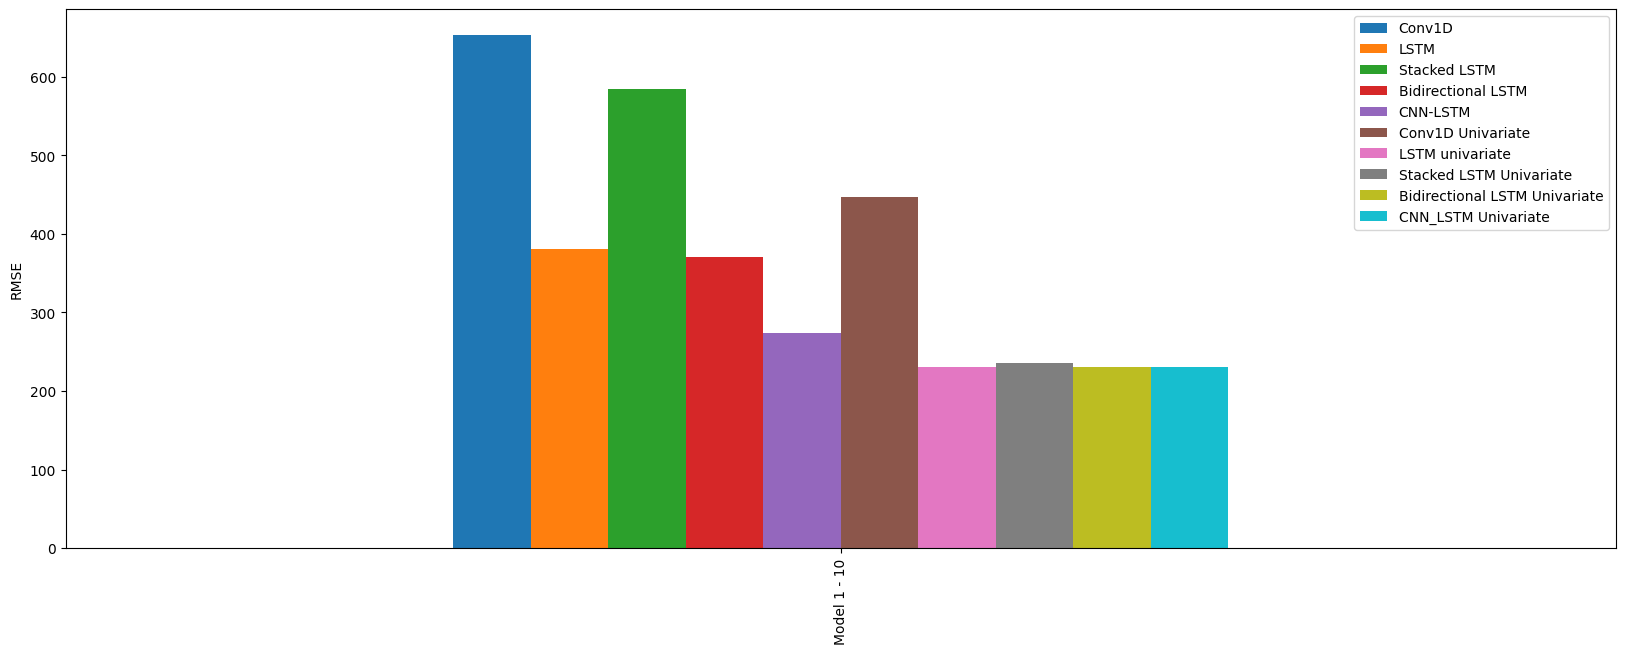

In [ ]:

# membuat dataframe

df = pd.DataFrame({
              "Conv1D": model_1_results["rmse"],
              "LSTM": model_2_results["rmse"],
              "Stacked LSTM" : model_3_results["rmse"],
              "Bidirectional LSTM" : model_4_results["rmse"],
              "CNN-LSTM": model_5_results["rmse"],
              "Conv1D Univariate" : model_6_results["rmse"],
              "LSTM univariate" : model_7_results["rmse"],
              "Stacked LSTM Univariate" : model_8_results["rmse"],
              "Bidirectional LSTM Univariate" : model_9_results["rmse"],
              "CNN_LSTM Univariate" : model_10_results["rmse"]},
             index = ["Model 1 - 10"])

# representasi dengan bar chart
ax = df.plot(figsize=(20, 7), kind="bar")
ax.set_ylabel("RMSE")

plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_evaluation_metrics/hasil_denormalisasi/RMSE_visualization.png")

plt.show()

In [ ]:

# # membuat dataframe

# df = pd.DataFrame({
#               "Conv1D": model_1_results["mape"],
#               "LSTM": model_2_results["mape"],
#               "Stacked LSTM" : model_3_results["mape"],
#               "Bidirectional LSTM" : model_4_results["mape"],
#               "CNN-LSTM": model_5_results["mape"],
#               "Conv1D Univariate" : model_6_results["mape"],
#               "LSTM univariate" : model_7_results["mape"],
#               "Stacked LSTM Univariate" : model_8_results["mape"],
#               "Bidirectional LSTM Univariate" : model_9_results["mape"],
#               "CNN_LSTM Univariate" : model_10_results["mape"]},
#              index = ["Model 1 - 10"])

# # representasi dengan bar chart
# ax = df.plot(figsize=(20, 7), kind="bar")
# ax.set_ylabel("MAPE")

# plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_evaluation_metrics/hasil_denormalisasi/MAPE_visualization.png")

# plt.show()

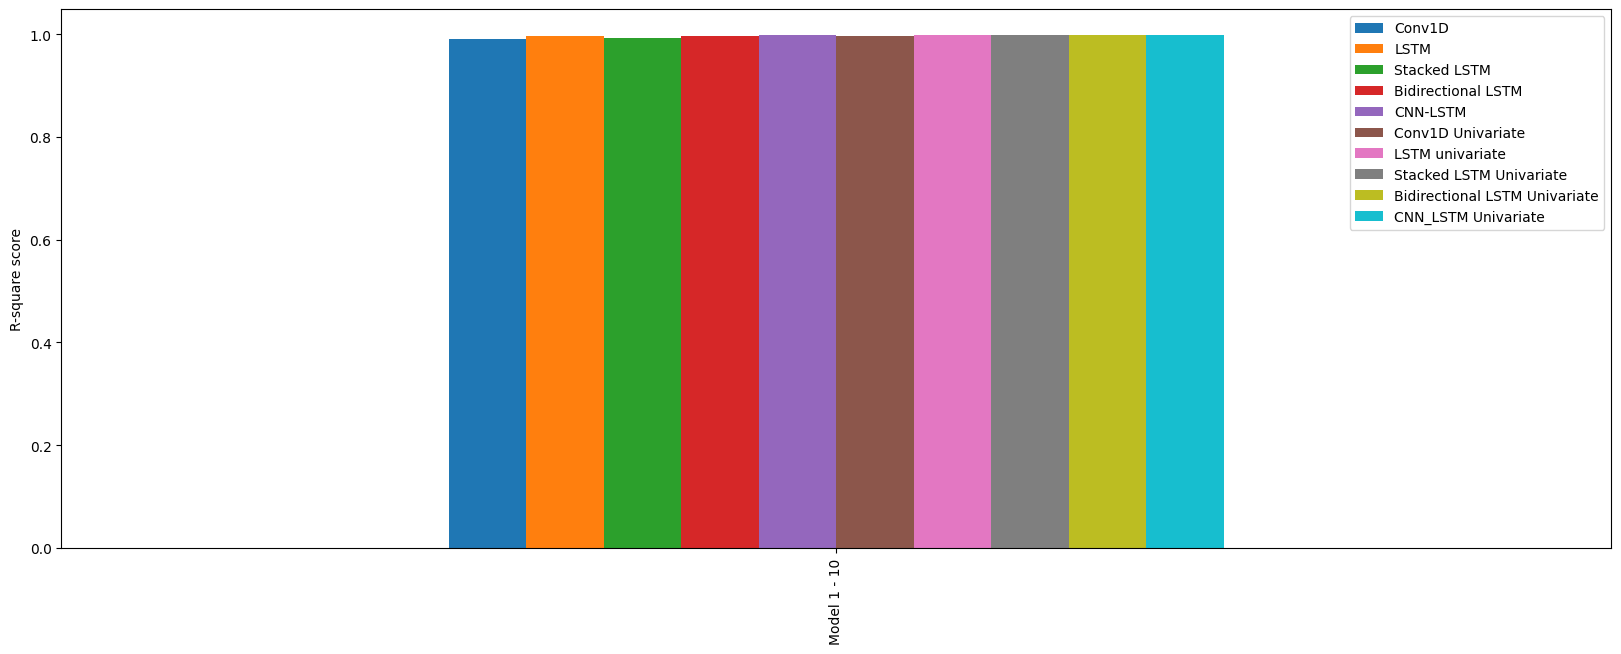

In [ ]:

# membuat dataframe

df = pd.DataFrame({
              "Conv1D": model_1_results["R-square"],
              "LSTM": model_2_results["R-square"],
              "Stacked LSTM" : model_3_results["R-square"],
              "Bidirectional LSTM" : model_4_results["R-square"],
              "CNN-LSTM": model_5_results["R-square"],
              "Conv1D Univariate" : model_6_results["R-square"],
              "LSTM univariate" : model_7_results["R-square"],
              "Stacked LSTM Univariate" : model_8_results["R-square"],
              "Bidirectional LSTM Univariate" : model_9_results["R-square"],
              "CNN_LSTM Univariate" : model_10_results["R-square"]},
             index = ["Model 1 - 10"])

# representasi dengan bar chart
ax = df.plot(figsize=(20, 7), kind="bar")
ax.set_ylabel("R-square score")

plt.savefig("/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_evaluation_metrics/hasil_denormalisasi/R-square_visualization.png")

plt.show()

# rangkum evaluasi metrics dari semua model menjadi satu csv

In [ ]:

results_list = [model_1_results,
                model_2_results,
                model_3_results,
                model_4_results,
                model_5_results,
                model_6_results,
                model_7_results,
                model_8_results,
                model_9_results,
                model_10_results]


# menggabungkan hasil evaluasi menjadi dictionary
results_dict = {
    'Model_1 : Conv1D Multivariate': model_1_results,
    'Model_2 : LSTM Multivariate': model_2_results,
    'Model_3 : Stacked LSTM Multivariate': model_3_results,
    'Model_4 : Bidirectional LSTM Multivariate': model_4_results,
    'Model_5 : CNN-LSTM Multivariate': model_5_results,
    'Model_6 : Conv1D Univariate': model_6_results,
    'Model_7 : LSTM Univariate': model_7_results,
    'Model_8 : Stacked LSTM Univariate': model_8_results,
    'Model_9 : Bidirectional LSTM Univariate': model_9_results,
    'Model_10 : CNN-LSTM Univariate': model_10_results

}

# Nama dataframe
df_kumpulan_evaluation_metrics = pd.DataFrame(results_dict).T

# memberi nama untuk index
df_kumpulan_evaluation_metrics.index.name = 'Daftar Model'

# konversi dataframe ke CSV
df_kumpulan_evaluation_metrics.to_csv('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dist_7030_window21/7030_evaluation_metrics/hasil_denormalisasi/kumpulan_evaluasi_metrics.csv')

# print output
(df_kumpulan_evaluation_metrics)

mae            mse  \
Daftar Model                                                           
Model_1 : Conv1D Multivariate              457.756805  427468.500000   
Model_2 : LSTM Multivariate                283.676788  145235.421875   
Model_3 : Stacked LSTM Multivariate        468.892487  341755.250000   
Model_4 : Bidirectional LSTM Multivariate  272.324890  136948.984375   
Model_5 : CNN-LSTM Multivariate            207.764389   74714.523438   
Model_6 : Conv1D Univariate                318.288208  199983.031250   
Model_7 : LSTM Univariate                  164.308975   53434.386719   
Model_8 : Stacked LSTM Univariate          166.468460   55269.164062   
Model_9 : Bidirectional LSTM Univariate    163.513474   53207.796875   
Model_10 : CNN-LSTM Univariate             163.514938   53158.898438   

                                                 rmse      mape  R-square  
Daftar Model                                                               
Model_1 : Conv1D Multivariate              653.810730  2.983391  0.990256  
Model_2 : LSTM Multivariate                381.097656  1.810760  0.996689  
Model_3 : Stacked LSTM Multivariate        584.598389  3.403248  0.992210  
Model_4 : Bidirectional LSTM Multivariate  370.066193  1.773532  0.996878  
Model_5 : CNN-LSTM Multivariate            273.339569  1.382648  0.998297  
Model_6 : Conv1D Univariate                447.194611  2.052119  0.995442  
Model_7 : LSTM Univariate                  231.158798  1.050964  0.998782  
Model_8 : Stacked LSTM Univariate          235.093948  1.063786  0.998740  
Model_9 : Bidirectional LSTM Univariate    230.668152  1.042758  0.998787  
Model_10 : CNN-LSTM Univariate             230.562134  1.045966  0.998788